# 1. Import

In [26]:
# Required Imports
import re
import numpy as np
import pandas as pd
from pprint import pprint
import multiprocessing
import nltk
import matplotlib.pyplot as plt

In [2]:
!pip install gensim

In [3]:
# Gensim for text preprocessing and LDA
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel

In [4]:
!pip install spacy

In [5]:
# spacy for lemmatization ans Stemming
import spacy

In [6]:
!pip install pyLDAvis

In [7]:

# Plotting tools
import pyLDAvis
import pyLDAvis.gensim  # don't skip this
import matplotlib.pyplot as plt
%matplotlib inline


In [8]:
# Suppress all the warnings
import warnings
warnings.filterwarnings("ignore")

In [9]:
# Latent Dirichlet Allocation (LDA), using all CPU cores to parallelize and speed up model training
cores = multiprocessing.cpu_count()

In [29]:
!pip install konlpy

     |████████████████████████████████| 19.4 MB 2.5 MB/s eta 0:00:01
     |████████████████████████████████| 86 kB 1.8 MB/s eta 0:00:01
     |████████████████████████████████| 372 kB 2.7 MB/s eta 0:00:01
  Attempting uninstall: beautifulsoup4
    Found existing installation: beautifulsoup4 4.9.1
    Uninstalling beautifulsoup4-4.9.1:
      Successfully uninstalled beautifulsoup4-4.9.1


In [30]:
import konlpy
from konlpy.tag import Kkma
Kkma = Kkma()

In [31]:
import time
import datetime
start = time.time()

# 2. Load Data

## 공통 전처리 과정을 끝낸 파일 로드

In [10]:
# Read the data set from training file => pre_1992_2020.tsv
df = pd.read_csv('pre_1992_2020.tsv', sep ='\t', encoding = 'utf-8')

In [11]:
# Check the loaded data 
df.head(2)

,Unnamed: 0,년도,가수,제목,성별,장르,가사
0,0,19920000,잼,난 멈추지 않는다,mixed,댄스,"['이제', '모든걸', '다시', '시작해', '내겐', '아직도', '시간이',..."
1,1,19920000,잼,우리 모두 사랑하자,mixed,댄스,"['워', '우리', '모두', '사랑하자', '우리의', '젊은날을', '위하여'..."


In [12]:
# For LDA, we are only concerned with the lyrics
# therefore we will be selecting 'lyrics.text' column as training data
# Converting data to a list for further text preprocessing
data = df['가사'].tolist()

In [13]:
# Print the number of rows/ elements in list
len(data)

5776

# 3. Preprocess Data

In [14]:
# print the first element of the list
data[:1]

["['이제', '모든걸', '다시', '시작해', '내겐', '아직도', '시간이', '있어', '때론', '상처가', '좌절로', '남아', '돌이킬수', '없는', '후회도', '하고', '그러나', '우리', '잊어선', '안돼', '지금의', '나는', '내가', '아닌걸', '신문에', '실려온', '얘기들', '헝클어진', '우리들을', '탓할순', '없어', '이제', '모든걸', '다시', '시작해', '이렇게', '여기서', '끝낼순', '없어', '내겐', '아직도', '시간이', '있어', '지금', '이렇게', '지금', '멈출수는', '없어', '신문에', '실려온', '얘기들', '헝클어진', '우리들을', '탓할순', '없어', '이제', '모든걸', '다시', '시작해', '이렇게', '여기서', '끝낼순', '없어', '내겐', '아직도', '시간이', '있어', '지금', '이렇게', '지금', '나는', '여기서', '멈출순', '없어', '이제', '모든걸', '다시', '시작해', '나는', '여기서', '멈출순', '없어', '이제', '모든걸', '다시', '시작해']"]

## 정규표현식 및 Konlpy 이용한 명사 추출

In [48]:
len(data)

5776

In [42]:
data[0]

"['이제', '모든걸', '다시', '시작해', '내겐', '아직도', '시간이', '있어', '때론', '상처가', '좌절로', '남아', '돌이킬수', '없는', '후회도', '하고', '그러나', '우리', '잊어선', '안돼', '지금의', '나는', '내가', '아닌걸', '신문에', '실려온', '얘기들', '헝클어진', '우리들을', '탓할순', '없어', '이제', '모든걸', '다시', '시작해', '이렇게', '여기서', '끝낼순', '없어', '내겐', '아직도', '시간이', '있어', '지금', '이렇게', '지금', '멈출수는', '없어', '신문에', '실려온', '얘기들', '헝클어진', '우리들을', '탓할순', '없어', '이제', '모든걸', '다시', '시작해', '이렇게', '여기서', '끝낼순', '없어', '내겐', '아직도', '시간이', '있어', '지금', '이렇게', '지금', '나는', '여기서', '멈출순', '없어', '이제', '모든걸', '다시', '시작해', '나는', '여기서', '멈출순', '없어', '이제', '모든걸', '다시', '시작해']"

In [58]:
test = []
test.append(kkma.nouns(data[0]))
test

[['모든',
  '내',
  '내겐',
  '겐',
  '시간',
  '때',
  '상처',
  '좌절',
  '수',
  '후회',
  '우리',
  '지금',
  '나',
  '내가',
  '신문',
  '얘기',
  '우리',
  '탓',
  '순',
  '여기']]

In [55]:
from konlpy.tag import Kkma
kkma = Kkma()

In [56]:
import time
import datetime
start = time.time()

In [59]:
dataset = []
# 가사에서 명사만 추출
for i in range(len(data)):
    print(i)
    dataset.append(kkma.nouns(data[i]))
    print(dataset[i])

# 로직이 실행되는 시간 파악을 위해 time 사용
sec = time.time() - start
times = str(datetime.timedate(seconds=sec)).spilit(".")
times = times[0]
times

0
['모든', '내', '내겐', '겐', '시간', '때', '상처', '좌절', '수', '후회', '우리', '지금', '나', '내가', '신문', '얘기', '우리', '탓', '순', '여기']
1
['워', '우리', '모두', '사랑', '우리', '날', '위', '춤', '추자', '가벼운', '스텝', '속', '그대', '옷', '거리', '은', '사람', '시선', '나름', '연출', '연출속', '자신감', '그것', '맘', '오늘', '얘기', '댄스', '댄스뮤직', '뮤직', '자동차', '이번', '청바지', '지금', '당', '당장', '장', '내', '내겐', '겐', '걸', '재', '재밌', '밌', '나의', '진실', '친구', '말', '뭐', '아무것', '전']
2
['어둠', '이제', '우리', '만', '시간', '듯이', '내', '가슴', '가슴속', '속', '나', '너', '머리', '향기', '채', '끝', '눈', '애처', '보여', '이유', '사랑', '그대', '이해', '수', '동안', '말']
3
['어둠', '속', '어디', '본', '느낌', '거리', '비', '젖', '바람', '내', '어깨', '예', '그림', '그림자의', '자의', '모습', '표정', '앞', '여자', '비명', '비명소리', '소리', '어떡', '하나', '나', '상', '상관', '관', '일', '무작정', '가야', '적막', '느낌속', '뒤', '그림자', '자', '지금', '위험', '대답', '수']
4
['요즘', '친구', '정말', '무엇', '말로', '자기', '다인', '다인줄', '줄', '겉', '생각', '말', '얘기', '자유', '디', '사라지', '모두', '자기', '위주', '해석', '자신', '특별', '특별하다', '하다', '하', '우리', '이유', '변해', '지금', '우리', '모습', '거', '전화', '잠', '

['나', '모든', '수가', '너', '사랑', '수', '감동', '수도', '수', '생각', '안해', '너와', '때', '법', '우연', '장난', '장난속', '속', '처음', '얘', '얘길', '길', '말', '나의', '마음', '수첩', '칸', '채운', '여자', '내', '눈물', '거', '세상', '누구', '진실', '내가', '날', '땜', '실수', '적', '많았어도', '널', '이유', '우리', '사이', '착각', '착각속', '삶', '방식', '곁', '오고', '복잡', '건', '구속', '생활', '결혼']
37
['사랑이', '진실', '필요', '시작', '거', '연극', '미래', '현실', '표현', '부족', '사람', '말', '사랑', '생각', '표출', '반', '너', '안', '말로', '사소', '때', '눈물', '조심', '그거', '오', '나의', '대신', '줄', '줄순', '순', '세상', '저편', '곳', '마음', '속', '저', '저끝', '끝', '모두', '방식', '친구', '모인', '모인자리', '자리', '널', '친군', '로', '질투', '중함', '마음속']
38
['별', '장면', '항', '비가', '열', '열대', '대', '우림', '기후', '속', '밤', '외로움', '가을', '추억', '공식', '사람', '눈물', '행복', '천사', '천사표가', '표가', '요즘', '어디', '옛날', '말', '나', '이해', '방법', '불만', '생각', '사랑', '느낌', '틀', '거', '모두', '공감', '수', '얘기', '필요', '거라', '라', '감정', '각자', '나름', '햇빛', '눈', '부', '부신', '신', '날', '심해', '표정', '노래', '론', '표현', '너', '내']
39
['사랑', '나의', '마음속', '꿈', '하나', '하나만', '만', '두고', '나',

['너', '거절', '이번', '뿐', '맹세', '약속', '날', '신경', '옷', '머리', '오랜만', '소개팅', '말', '고민', '널', '때', '느낌', '집', '날씨', '기분', '거', '나', '정말', '미안', '마음', '번만', '용', '용서해', '서해', '분', '정도', '도착', '여자', '상상', '키', '혹시나', '주위', '노래', '내', '친구', '모습', '고개', '숙였여', '국민학교', '동창', '친구얘기', '얘기', '인사', '앞', '건', '황', '당황', '너와', '나', '맘', '이래', '우리', '수가', '서로', '눈', '피해', '결국', '우리', '둘', '잖', '곁', '내가', '수', '영원', '사랑', '마', '추억', '야']
69
['우리', '사랑', '지금', '시작인', '말', '마', '어둠', '만이', '너와', '나', '수', '내', '가슴', '기대', '니', '너', '향', '나의', '마음', '누구', '하나', '축복', '사람', '시간', '속', '이상은', '가슴조일', '조일', '필요', '삶', '방', '방황', '황', '모두', '전', '가슴앓이', '뿐', '우리', '누', '누구도', '구도', '간섭', '얘', '얘기지', '기지', '위', '무엇', '모든', '처음', '처음이자', '이자', '마지막', '눈', '느낌', '확인', '품', '순간', '하늘', '날', '이젠', '정말', '주고']
70
['처음', '느낌', '이상', '나도', '기분', '마음속', '너', '나', '줄', '갈색', '갈색머리', '머리', '단정', '모습', '발끝', '거부', '거부감이', '감이', '중한', '시간', '이상은', '기쁨', '서로', '날', '의미', '나날', '사진', '만큼', '걸', '하루', '나', '핏', '거리', '눈길', '마음'

['아름', '그녀', '노을빛', '사이', '나의', '눈', '모습', '콜라', '여자', '수', '우리', '씽', '거', '언제', '라도', '추억', '남', '꿈', '약속', '아쉬움', '아쉬움속', '속', '기대', '리에', '뿐', '기억', '밤', '부', '부디', '디', '곁', '여기', '그때', '혼자', '널', '날', '수', '가을', '가을날', '사랑', '친구', '코웃음', '고', '옆', '둘', '둘수', '일회용', '너희', '느낌', '운명', '나', '지금', '지금쯤', '쯤', '일', '듯', '시간', '시간속', '너', '순간']
96
['너', '지금', '나', '중요', '누구', '나', '사람', '우리', '모습', '훗날', '빛', '흔적', '흔적속', '속', '추억', '거', '널', '방법', '얼굴', '수가', '발', '오랫동안', '슬픔', '슬픔속', '길목', '마음속', '모두', '하나', '하나만', '만', '위', '나의', '반', '반쪽', '쪽', '가고파', '어디', '생각', '수', '맘', '산책', '니', '건', '무엇', '마음']
97
['전부', '정말', '말', '안', '줄', '누', '누구도', '구도', '패인', '날', '혼자', '행복', '아무것', '나', '수가', '내', '인생', '널', '너', '사랑', '시간', '줄', '실증', '내가', '잘못', '망친', '후', '하나', '때문', '수', '처음', '큰사랑', '속', '데이트', '생각', '지']
98
['니', '데', '나', '힘', '자', '목', '너', '그', '날', '하나', '남', '꿈', '아침', '고개', '흔적', '어제', '학교', '일', '구름', '앞', '낱낱', '안', '되리', '아무것', '내', '내겐', '겐', '도움', '시계추', '곳', '시간', '거기

['너', '기억', '지', '지나가버려', '나가버려', '나의', '말', '버리', '내가', '안', '이유', '뭐', '데', '니', '날', '혼란', '널', '포기', '순', '야', '정말', '이해', '나', '끝', '수', '번', '수', '생각', '맘', '자신', '나아', '나아안', '사랑', '모습', '뺨', '눈물', '살수', '가슴', '이름', '가슴속', '속', '내', '내겐', '겐', '하나', '내', '곁', '심적', '부담', '그것', '크기', '만약', '터', '아무것', '두고', '모두', '렇', '렇체', '체', '못', '체', '미련', '채', '뿐', '필요', '필요하다', '하다', '입이', '대체', '무엇', '내', '마음']
120
['소', '그때', '거', '지난날', '너', '사랑이', '상처', '줄', '랐', '사랑', '감정', '후', '나', '전화', '건', '목', '릴', '날', '이기적', '생각', '나의', '잘못', '미안', '나', '용', '용서해', '서해', '줄', '줄순', '순', '번', '내', '수', '정말', '수', '이해', '한번', '만', '부탁']
121
['내', '시절', '나의', '머릿속', '복잡', '생활', '이젠', '부', '오랫동안', '나', '자신', '바라', '앞', '가로막', '벽', '마음', '나', '이제', '마한', '날개', '꿈', '정말', '구속', '천만', '다', '다행', '행', '겐', '하늘', '날', '수', '항', '새', '자유', '수', '행복', '망이', '여기', '지금', '곳', '모든', '고통', '한계', '도전', '세상', '모두', '내', '힘', '들', '들지도', '지도', '미소', '거', '중요', '희망', '내', '내겐', '후회', '그때', '가줘', '때', '너', '영원', 

['밤', '나', '별', '별빛', '빛', '듯', '말', '모습', '아름', '건', '기억', '눈', '내가', '꿈', '지난날', '힘', '왕자', '왕자여', '여', '나', '소설', '소설속', '속', '이야기', '일상', '생활', '순', '꽃', '포기', '순간', '아픔', '눈물', '거', '내', '적', '숨결', '이젠', '세상', '세상속', '가야', '결국', '날', '하늘', '곳', '사랑', '향기', '피', '피할려', '할려', '두려움', '두려움위', '위', '왕', '길', '내', '시간', '요', '해', '고']
146
['나', '너', '지', '지우려', '우려', '언제', '수가', '내', '모습', '앞', '지나침', '지나침속', '속', '뿐', '이제', '내', '널', '그리지', '추억', '추억만이', '만이', '맘', '맘속', '간', '기억', '하나', '하나둘', '둘', '감', '때', '기억속', '항', '거', '수', '우리', '행복', '수', '니', '곁', '말', '기회', '이젠', '새', '시간', '중한', '이야기', '하나', '내가', '라면', '바램', '바램속', '번째', '만남', '서로', '추억속', '처음', '시선', '고개']
147
['날', '기억', '내', '마음', '너', '모습', '미소', '때', '사랑', '나의', '늑한', '집이', '다정', '누구', '화가', '나', '모든', '후', '이해', '미안', '맘', '니', '가슴', '무엇', '나', '재촉']
148
['수', '나', '너', '어떡', '사람', '상', '상관하지도', '관하', '지도', '추억', '모두', '사랑', '수', '모습', '거', '내안', '그대', '이별', '널', '나의', '곁', '날', '세상', '변', '영원', '약속', '남', '내', '가슴',

['중한', '걸', '나', '사람', '내가', '지', '혼자', '혼자라', '라', '때', '힘', '이제', '당신', '내일', '생각', '일어', '사업', '실패', '사랑', '순', '세상', '우리', '모두', '손', '해', '하늘', '우리', '눈', '가요', '어둠', '속', '모습', '마음속', '믿음', '사랑이', '시작', '수', '용기', '눈물', '오', '빛', '높이', '선', '행복', '미소', '주위', '가슴', '득', '차', '미움', '아픔', '서로', '마음', '조금', '대', '일도', '기분', '필요', '꿈', '눈부신', '부신', '저기', '아름', '보여', '서서', '앞', '날', '고개', '눈앞', '두려움', '이젠', '여기', '모아', '기쁨', '축제']
170
['예전', '지금', '니', '거', '나의', '곳', '이젠', '아름', '세상', '워', '내', '반쪽', '건', '모두', '옛날', '얘', '걸', '생애', '시간', '꿈', '나', '혼자', '너와', '나', '너', '사랑', '모든', '앞', '손', '과거', '윈', '추억']
171
['우리', '지금', '시간', '모든', '이곳', '너희', '둘', '1', '반복', '손짓', '손짓속', '속', '이제', '소리', '댓', '바보', '너', '거짓', '눈', '무엇', '어제', '오늘', '미래', '자신', '조금', '우리', '말', '소', '소린지', '린지', '못', '말로', '모두', '다가', '진실', '전부', '자유', '누', '누구도', '구도', '수', '자', '때', '눈앞', '영원', '거', '날', '날아가리', '아가리', '곳', '하나', '되리']
172
['나의', '모든', '사랑', '너', '주고', '내', '바람', '나', '마', '너와', '라면', '세상', '끝'

['나', '혼자', '너', '생각', '애타', '내', '마음', '진실', '가슴', '곁', '바램', '나의', '모두', '맘', '전부', '널', '향', '사랑', '정말', '나', '끝', '사랑하리', '하리', '꿈', '포만감', '반쪽', '하나', '그것', '소원', '감정', '아픔', '포기', '눈치', '구름', '바보', '잡지', '못', '눈물']
197
['아침', '눈', '밖', '햇볕', '내', '몸', '감', '오늘', '하', '하룰', '룰', '나', '두려움', '발길', '주머니', '걱정', '끼', '이것', '벅', '벅차', '차', '모든', '물', '물거품', '거품', '화려', '자신', '필요', '곳', '송장', '뿐', '쓰레기', '과한', '나', '굶주림', '득', '영원', '시간', '못', '참해', '꿈', '모두', '끝', '끝장내', '장내', '디', '터', '나이', '18', '18년', '년', '짓', '안', '별', '다', '자', '생활', '배', '지가', '10', '10년', '짝', '나의', '운명', '값', '집', '알맹이', '소문', '알부자', '개', '개조심', '조심', '도난', '도난장치', '장치', '몸조심', '한탕', '쉿', '담', '겁', '금고문', '모양', '꼴', '날', '감방', '석방', '어둠', '속', '손', '파', '배춧잎', '돈', '고지', '위', '선', '이번', '마지막', '길', '보석', '머리', '머리통', '통', '스타', '스타킹', '킹', '생활속', '벌레', '평생', '빛', '정승', '어디', '바닥', '바닥내', '주체', '10대', '대', '삶', '배불', '명예', '사고', '친구', '인심', '사지', '이젠', '내', '맘', '뭐', '옷', '날개', '집안', '운', '금괴', '뒤', '기사', '밑'

['누', '너', '내', '곁', '뺏어', '나', '한순간', '자신', '내', '가슴', '가슴속', '속', '나의', '사랑', '함', '함깨', '깨', '기억', '수', '때문', '이상', '비참', '두지', '마', '적', '오', '오직', '직', '겐', '하늘', '맘', '생각', '눈물', '널', '지', '잠', '내가', '니']
224
['건', '번', '야', '내', '맘', '나', '생각', '두고', '레몬', '향기', '샴푸', '자상', '콜라', '친구', '충고', '한마디', '여자', '수가', '내실', '내실수', '수', '나의', '사랑', '항', '곁', '너', '의미', '만난', '내', '내겐', '겐', '행운', '널', '하나', '마음', '마음모두', '모두', '지금', '관심', '사람', '소용', '안', '필요', '니', '터', '이젠', '마']
225
['이제', '일', '일년', '년', '널', '보라빛', '이곳', '나', '눈물', '마른', '아', '너', '요즈음', '웃기', '영원', '사랑', '눈', '뿐', '내', '삶이', '날', '마', '마중', '중', '천국', '문', '문앞', '앞', '때', '부탁', '약속', '용서', '힘', '누', '누군', '군', '일', '잠', '생각', '전화']
226
['지금', '내', '내겐', '겐', '너', '언제', '자신', '내', '모습', '초라', '요즘', '화만', '거짓', '말', '로', '나', '니', '맘', '확인', '거', '날', '생각', '하면', '이제', '삶', '의미', '걸', '수', '한']
227
['널', '수', '나의', '입술', '너', '어깨', '감', '밤', '끝', '잡고', '사랑', '마지막', '입맞춤', '아쉬움', '빈손', '세상', '선물', '걸', '겠지', '내', '맘',

['너', '사랑', '나의', '나', '이상', '가슴', '가슴속', '속', '걸', '원해', '하룻밤', '너와', '정리', '생각', '건', '오늘', '헤어', '헤어지자며', '지자며', '니', '널', '처음', '때', '눈물', '혼자', '하늘', '하늘아래', '아래', '영원', '수', '이제', '수', '뒤', '내', '자리', '영혼', '마음', '마음속', '변화', '변화속']
253
['무래', '내가', '본', '그대', '치료', '필요', '해', '사랑', '존재', '가치', '쓸데', '취기', '남', '채로', '얘기', '나', '후', '아이', '이유', '널', '나기', '이상', '아름', '내', '모습', '너', '수', '추한', '여자', '변', '그', '결심', '추', '원해', '거울', '앞', '인지', '눈물', '나도', '날', '치마', '립스틱', '머리', '길', '길어진', '어진', '손', '손톱', '톱', '하이힐', '생활', '마음', '느낌', '니', '주고', '간', '간직', '하나']
254
['정말', '너', '모두', '우', '우러러', '러', '사랑', '내', '맘', '나로', '부족', '친구', '필요', '너와', '영원', '나', '거', '이젠', '만이', '가기', '가기전', '전', '건', '나지', '라', '복잡', '나', '니', '젤', '모습', '앞', '변', '제일', '생각', '사무', '하루', '하기', '이별', '이별징후', '징후', '뭐', '날', '슬픔', '반이', '세상', '수']
255
['채', '수', '너', '날', '사랑', '위', '젠', '젠간', '간', '염원', '이젠', '가슴', '안', '중한', '널', '영원', '안녕', '내', '곁', '누', '누구도', '구도', '나', '그대', '자리', '나', '선택', '누구

['너', '관심', '내가', '상상', '포', '포근', '근', '말과', '귀', '귀여운', '여운', '니', '느낌', '나', '창', '창밖', '밖', '눈', '내', '마음', '수가', '너와', '거', '별', '친구', '앞', '얘', '얘길', '길', '꿈', '꿈속', '속', '입', '추고', '영화', '얘기', '널', '향', '내', '사랑이', '변', '그대', '솜사탕', '사랑', '척', '건', '기억', '나의', '바램', '뿐', '감고', '하늘', '아름', '우리', '사랑얘기', '수평선', '혼자']
276
['밤', '사이', '얼굴', '마음', '이별', '순간', '너', '걱정', '겠지', '눈', '은', '사랑', '수', '모두', '나의', '몫', '터', '번', '그대', '나', '할거', '내가', '행복', '말', '우리', '못', '나', '영원', '혼자', '걸', '말로', '살수', '용', '용서해', '서해', '기억', '속', '내', '날', '그', '향', '그리움']
277
['사랑', '너', '기억', '나', '겐', '나', '뿐', '아침', '아침햇살', '햇살', '모습', '중한', '시간', '모두', '채운', '지금', '내', '마음', '이젠', '간', '간직해', '직해', '생각', '맘', '남', '길', '바랄', '언제', '널', '행복', '누구', '날', '마', '아무', '내가', '얼마', '곁', '나의', '이해', '수', '무엇', '보여', '땜', '내', '내겐', '사람', '끝', '간직', '간직하기', '하기', '거', '속', '이상', '필요', '영원', '수']
278
['내', '적', '꿈', '앨', '친구', '소개팅', '널', '때', '그대', '조심', '느낌', '전', '맘', '나', '정말', '너', '관심', '수', '불안', '기

['사랑이', '눈물', '때', '사나이', '세월', '세월가면', '가면', '말', '오', '가슴만', '바보']
302
['불안', '미래', '숨', '수', '만큼', '그대', '고통', '내', '몸', '속', '눈물', '세상', '사람', '건', '사랑', '남', '하루', '이상', '마', '아픔', '끝', '나', '혼자', '올', '나', '너', '그림자', '어둠', '상처', '이젠', '남지', '길가', '위', '못', '절망', '오', '행복', '갈망', '손', '틈', '허락', '사랑이', '우', '시간', '처음', '날', '기억', '모습', '이제', '모두', '모든', '때', '물음', '의미', '마라', '마지막', '바람', '부탁', '거']
303
['나', '그대', '등', '가요', '기도', '원해', '행복', '기억', '못', '길', '이름', '모두', '지우', '지우길', '마지막', '바램', '우리', '영혼', '나', '세상', '우리', '껜', '욕', '욕심', '심', '건', '건가요', '내', '곁', '영원', '내', '걸', '순간', '눈물', '기만']
304
['요즘', '니', '표정', '애', '때문', '얘기', '풀이', '풀이죽', '죽', '너', '오늘', '날', '나', '나', '변', '건', '의논', '모습', '내가', '미소', '지금', '말', '내심', '내심정', '정', '정말', '안', '하루', '사랑', '널', '터', '내', '모든', '시선', '오', '오직', '직', '눈', '하루종일', '종일', '내', '내겐', '겐', '그것', '모자', '모자라', '라', '내안', '향', '나의', '혼자', '꿈', '맘', '가운데', '내', '애앞', '앞', '인걸', '눈빛', '빛', '끝', '항', '꿈속', '속']
305
['12', '12월', '월'

['누구', '픈', '귀한', '보석', '날', '준비', '내', '사랑', '지가', '편', '한번쯤', '곳', '가본적', '때', '둘', '벤치', '내', '눈', '눈속', '속', '세상', '풍경', '풍경속', '사람', '너', '눈빛', '눈빛속', '사랑이', '별', '빛', '내', '내겐', '겐', '선물', '선물야', '야', '니', '맘', '하나', '나', '위', '품', '품속', '꿈', '수', '수', '건', '무엇', '인걸', '이제', '내가', '말', '마음', '모두', '오월', '햇살', '뜻', '뜻히', '히', '감', '느낌', '지금', '전', '전해지', '해지', '눈빛간직', '간직', '미안', '실망', '대도', '행복', '내사', '바램', '오', '오직', '직']
336
['나', '예전', '애', '때문', '못', '곳', '나', '순', '이젠', '너', '오', '오직', '직', '바라', '사랑', '외로움', '나의', '곁', '항', '이제', '용', '용길내서', '길', '내서', '말', '할거', '모두', '거', '생각', '생각마', '마', '내', '영원', '널', '향', '변', '나기', '시작', '처음', '은', '조금', '언제', '약속', '수']
337
['마', '꺼', '널', '불안', '이제', '나', '순', '너', '맘', '말로', '나', '포기', '나의', '감정', '고백', '내', '눈', '니', '모습', '사실', '지지', '말', '모든', '감고', '마음', '수', '우리', '사랑이', '아무', '가줘', '사랑', '걸']
338
['조금', '나', '그', '맘', '참고', '후', '너', '뒷모습', '때', '나도', '오', '오직', '직', '너와', '생각', '야', '목', '목소리', '소리', '하루', '내가', '입맞춤', '

['마', '맥주', '너', '사랑', '기억', '힘', '수', '속', '속물', '물', '건', '자유', '바람', '모습', '가식', '눈물', '번', '터', '나', '남', '불빛', '거짓', '볼', '볼수가', '수가', '기대', '바램', '모두', '거', '날', '날아가', '아가', '내가']
365
['시도', '시도때', '때', '바람', '하나', '가슴', '항', '버릇', '눈물', '눈물속', '속', '너', '모습', '나', '너와', '이별', '이별만큼', '만큼', '일', '수', '나의', '사랑', '향기', '누구', '누', '누군지', '군지', '예전', '내', '모든', '건', '야', '혼자', '뿐', '뿐야', '별', '말', '거', '이젠', '만난', '만난대도', '대도', '순', '빈자', '빈자릴', '릴', '기억', '추억', '그리움', '혼란', '혼란속', '널', '마지막', '나보려', '맘', '맘속', '정리', '만난순간', '순간', '변', '니', '품', '그녀', '차지', '애', '영원', '약속', '니야', '젠', '젠간', '간', '나라', '걸', '나']
366
['처음', '만난', '그때', '그대', '나', '언제', '곁', '너', '본', '순간', '나', '세상', '듯', '눈빛', '미소', '손', '손길', '길', '너와', '시간', '아무것', '영원', '미안', '실수', '수', '여자', '나의', '착각', '용', '용서해', '서해', '번', '처음만난', '거울', '모습', '숨결', '이제', '기억', '자리', '내가', '때', '못', '붐', '붐붐붐', '생각', '날', '만', '지금', '보여', '추억', '무엇', '걸', '만이', '연인', '환희', '상처', '모두', '치유', '순', '니', '힘', '내', '의지', '존재', '항']

['높이', '하늘', '위', '오늘', '오늘만큼', '만큼', '수', '순간', '영원', '이젠', '생활', '생활속', '속', '지친', '어깨', '거', '거라', '라', '생각', '생각하기', '하기', '나', '걱정', '모든', '아이', '오', '정말', '구름', '미안', '미안하리', '하리', '어디', '가슴', '열고', '하루', '내', '누', '누구도', '구도', '막지', '막지마', '마', '모두', '소리', '태양', '태양위', '세상', '가기', '사랑', '시간', '필요', '질투', '날', '바람', '바람속', '실', '실고서', '고서']
392
['그날', '말', '농담', '투정', '뿐', '내가', '말로', '널', '다가', '기가', '내', '자신', '원망', '남자', '다독', '다독거리', '거리', '친구', '수가', '너', '후회', '이젠', '채워진', '사람', '마지막', '사랑', '날', '장면', '모습', '한때', '기억', '저기', '서서', '시간', '앞', '나', '영원', '조바심', '순간', '인연', '노력', '일', '하늘', '잔한', '바다', '이대', '이내', '내', '맘', '통해', '얘기', '나', '이상', '우리', '선']
393
['지난날', '수', '너와', '추억', '기억', '이젠', '너', '마음속', '비', '마한', '하', '공간', '남지', '순간', '나', '눈물', '호소', '이제', '그대', '생각', '바라', '슬픔', '벽', '거', '내가', '널', '얘기', '사랑', '울기', '속', '마', '내', '곁', '오늘', '하루', '일', '니', '혼자', '나의', '선물', '맘', '때', '말', '상처', '미안', '나', '용', '용서해', '서해', '번', '기회', '부탁', '주', '주길', '길', '정말', '추

['내가', '거', '나', '널', '향', '내', '마음', '지갑', '속', '나의', '사진', '니', '항', '수', '너', '나', '이젠', '기도', '조심', '사랑', '위', '공간', '날', '곁', '맘', '그대', '인걸', '방황', '감', '안', '듯', '향기', '누', '누군', '군', '눈', '아침', '생각', '꿈', '꿈속', '이상', '누구']
418
['사랑', '이젠', '나인', '나인데', '데', '너', '날', '언제쯤', '내', '곁', '수', '이성', '때', '꿈', '나', '이중', '하나', '뿐', '현실', '다', '다행', '행', '항', '주기', '건', '니야', '바보', '관심도', '겐', '느낌', '나', '순', '빈자리', '진심']
419
['나', '원래', '널', '사랑', '내색', '수', '애', '애생각', '생각', '슬픔', '하루', '우수', '눈', '눈빛', '빛', '바라', '때', '못', '외면', '수록', '니', '상처', '이젠', '너', '포기', '외로움', '내', '곁', '뿐', '눈빛바라', '마음', '지', '지우지', '우지', '누구', '바', '바래왔', '래왔', '날', '날위', '위']
420
['뿐', '그리움', '속', '내', '곁', '언제', '몸', '채워진', '너', '향기', '이젠', '나의', '품', '품안', '안', '모든', '생각', '지금', '모습', '기억', '위', '준비', '사랑', '지']
421
['너', '주고', '나', '오랫동안', '처음', '원한', '건', '날', '목', '목소리', '소리', '향기', '내', '몸', '감', '모습', '오', '오직', '직', '곁', '오늘', '오늘밤', '밤', '영원', '이젠', '니', '내가', '모든', '널', '위', '나', '마', '조금', '수

['이젠', '일', '모두', '터', '수', '영화', '거', '내가', '생각', '어디', '내', '얘기', '한번쯤', '나', '만큼', '나', '그대', '시간', '시간속', '속', '사랑이', '기대', '나의', '추억', '추억속', '널', '두고', '곁', '집착', '내', '자신', '불행', '아픔', '곳', '홀', '끝', '정말', '너', '갈게', '편안', '편안히', '히', '하루', '사랑', '그', '욕해', '감사', '전화', '눈물', '눈물만이', '만이', '걸', '목', '목소리', '소리', '끊을려', '말', '가슴', '날', '사람', '웃음소리', '듣기', '전부', '처음', '처음이자', '이자', '마지막']
448
['나', '슬픔', '마지막', '번', '그대', '수', '기억', '기억속', '속', '모습', '간', '곳', '그', '마음속', '상처', '뿐', '후회', '내', '체념', '파고', '그리움', '하늘', '미', '미워하', '워하', '고', '내', '몸', '나의', '마음', '마음만이', '만이', '잠기', '조금', '행복', '추억', '이젠', '이상', '의미', '세상', '지금', '편안', '편안히', '히', '파', '영원', '만', '고통', '사랑이', '가시', '고인', '그림자', '원망', '야', '터', '볼', '빗물', '눈물', '거', '생각', '향기', '향기만이']
449
['문', '새', '세상', '이상', '포기', '나', '악', '악동만', '동만', '지금', '이상은', '시간', '기', '기작', '작', '모든', '일', '이제', '변', '내', '자신', '조절', '날', '좌절', '계획', '연기일', '뿐', '이젠', '지', '죽음', '선택', '순', '내가', '괴', '워', '때', '나', '일어', '패배', '말', '모두',

['5', '10', '상훈', '우리', '이래', '이래뵈도', '뵈도', '여자', '매너', '그녀', '닫른', '절대', '이번', '얘기', '형', '이의', '바른', '바른생활', '생활', '이야기', '나', '내', '여자친구', '친구', '만난', '만난지가', '지가', '1000', '1000일', '일', '지', '지났어도', '났어도', '손', '손한번', '한번', '바른생활사나이', '사나이', '진짜', '남자', '절', '고자', '고자여서가', '여', '서가', '건', '아자', '생각', '어디', '길', '길길가다가', '길가', '다가', '지나가도', '나가도', '눈길', '작지', '마음가짐', '3212', '얼렐', '얼렐렐렐렐레', '렐렐렐', '레', '예', '변', '이때', '때', '쳇', '뭐', '나', '야', '오', '행복', '마음', '순간', '자신', '시간', '간', '모두', '모두기억', '기억', '미래', '우리', '10년후', '년', '후', '세상', '이름', '이름안', '안', '변해', '내', '내가', '파', '파박', '박', '라', '라모두', '님', '너', '버스', '지하철', '노', '노약자', '약자', '자리', '음식', '소리', '입', '여자친구보고', '보고', '침', '모든', '모든것', '소수', '가지', '사항']
471
['일', '랄랄랄랄랄', '랄랄랄랄랄라', '라', '소리', '외로움', '슬픔', '모두', '내일', '높이', '깨', '부', '한도', '끝', '욕심', '덤', '친구', '너', '아무', '니', '곁', '무엇', '너와', '손', '마나', '뻔', '뒤', '주위', '거울', '모습', '지친', '지친모습', '서로', '예전', '조금', '양보', '욕', '심', '때문', '나', '반대', '생각', '상대', '혼자', '세상', '기분',

['나', '머릿속', '들판', '야생마', '내가', '길이', '곳', '되리', '저기', '파', '하늘', '태양빛', '시간', '속', '나의', '노래', '이젠', '날개', '뒤', '무엇', '한숨', '내', '자존심', '황', '황무지', '무지', '꽃', '몸', '안', '날', '번', '손', '열매', '담', '승리', '원해', '뜻', '기대', '누', '뭐', '길', '선택', '이제', '눈물', '기쁨', '너', '눈물속', '니', '릿']
493
['널', '순간', '내', '심장', '너', '정말', '나', '사고', '눈빛', '어', '나', '짝', '애', '사랑', '내가', '그', '곁', '너와', '면', '행복', '걸', '우리', '시작', '이제', '수', '상황', '불안', '소리', '긴장', '마음', '포기', '간', '주', '중']
494
['1969']
495
['내', '곁', '그대', '볕', '을', '피해', '나', '마한', '옆', '고양이', '나', '날', '듯', '너', '수', '맘', '모두', '주위', '발걸음', '사랑', '시', '조금', '나의', '가슴', '파고', '마음', '사라지', '느낌', '이제', '별', '이젠', '이상', '혼자', '시간', '상처', '입', '위', '지금', '전', '널', '자', '열린', '문', '안', '뒷모습', '오늘', '밤', '지', '오', '내기', '내기다림', '다림', '언제', '오기만', '기만', '목', '목소리', '소리', '체온', '속', '모든', '걸', '두려움', '변', '두지', '등', '뒤', '마', '어둠']
496
['나', '애', '해', '뿐', '나', '그', '미안', '마음', '상처', '순', '꿈', '내가', '절대', '이래', '이래선', '선', '못', '조금', '안해', '말로', '

['너와', '나의', '사랑', '지금', '시간', '추억', '기억', '미련', '너', '생각', '변치', '모든', '나', '인사', '전', '수', '마음', '간', '그때', '거리', '날', '듯', '변', '우리', '키', '나무', '널', '모두', '변해', '항', '건', '내', '그리움', '속', '선', '하', '하룰', '룰', '말', '영원', '처음', '고백', '세월', '바람', '햇살', '눈', '부', '계절', '지', '머릿속', '정말', '진실', '기분', '대', '볼', '니', '향기', '전해지', '해지', '눈물', '혼자', '위', '세상', '우리', '살수']
522
['내', '삶', '삶속', '속', '멍', '현실', '빛', '하나', '너', '사랑', '희망', '우리', '사이', '부모님', '반대', '허락', '초라', '주머니', '데', '널', '위', '수', '날', '나', '행복', '꿈', '뿐', '사람', '니', '원망', '내가', '외면', '번', '세상', '노력', '하늘', '친구', '편지', '뒤', '아무것', '이젠', '숨결', '영혼', '원한', '모습', '지옥', '눈', '건', '잖', '어디', '두고', '바람결', '거', '곁', '영원', '나', '변치']
523
['라', '라라릴', '릴', '나', '향기', '내', '귓가', '멜로디', '곁', '사람', '와인', '그대', '눈빛', '날', '미소', '느낌', '그', '와요', '이유', '필요', '영원', '뿐', '얘기', '이상', '맘', '이사진', '속', '시선', '내가', '수도', '세상', '어디', '이젠', '나', '지', '모습', '눈', '빛', '여름']
524
['나', '참고', '내고', '여기', '시간', '지', '나의', '지친', '모습', '말', '감', '소리', '날

['일', '조심', '하', '때', '내가', '생각', '그만큼', '눈물', '지친', '날', '지금', '훗날', '내', '당', '모습', '위', '길', '수', '걱정', '나', '눈빛', '말', '올', '모든', '걸', '여기', '꿈', '라', '기억', '뒤', '내일', '승리', '뿐', '너', '노래', '무대', '바라', '사람', '속', '비밀', '얘기', '모두', '일어', '웃음', '한데', '몫', '나', '기대', '행복', '거', '곳', '항', '자신']
550
['하루', '모습', '이젠', '나의', '앞', '이제', '믿음', '누', '누구도', '구도', '그림', '너', '나', '오늘', '지금', '내', '어디', '너와', '마지막', '그날', '맘', '안보', '게', '날', '우리', '하나', '변', '기도', '모두', '니', '내가', '나날', '주위', '변해', '결국', '생각', '걸', '날것', '사랑', '수', '기', '기다리잖', '다리', '잖']
551
['은', '은빛', '빛', '밤', '금', '금빛', '낮', '번', '그', '사랑', '말', '수', '내가', '혼자', '그대', '미소', '주인', '기억', '속', '가슴', '가슴속', '입', '입술', '술', '위', '나의', '흔적', '나', '행복', '만족', '내안', '걸', '감사', '수화기', '너머', '숨결', '한마디', '아침', '눈물', '사람', '때문', '보', '얼굴', '어깨', '어깨조차', '조', '차', '마음', '수', '밖', '생각', '세상', '눈', '다리', '터', '안', '건', '건가요', '가요', '향', '내사', '내', '욕심', '말해', '널', '마', '때', '어둠', '너', '꿈', '꿈속', '날', '손', '듯', '니', '앞', '그리움', '그리움만이'

['내안', '그대', '애타', '내', '맘', '눈물', '지친', '나', '잡고', '널', '두고', '내사', '그', '만나', '꿈', '꿈속', '속', '지금', '순간', '날', '내', '품', '이년', '년', '영원', '이', '앞', '운명', '남자', '어디', '장소', '데', '데자부', '자', '부', '현상', '현실', '현실속', '교차', '인연', '목욕', '목욕재개', '재개', '비단옷', '나', '밤', '사랑', '나의', '맘속', '생각', '전', '틱틱', '틱틱대면', '대면', '하면', '수', '지', '체념', '정말', '너', '잠깐']
573
['그대', '내', '맘', '심장', '내', '곁', '손', '나', '누', '누구도', '구도', '영원', '몸', '마음', '사랑', '나', '하나', '주', '주오', '오', '오직', '직', '하나', '하나뿐', '뿐', '걸', '터', '손끝', '끝', '한참', '고민', '널', '위', '선물', '조금', '발걸음', '나의', '전부', '주고', '너', '생각', '때', '촛불', '오늘', '보여', '고백', '분위기', '속', '내가', '조급', '젠', '젠간', '간', '뭐래', '눈', '눈속', '품', '품속', '거', '세상', '변', '밤', '별', '비']
574
['라', '내', '앞', '너', '여자', '품', '나의', '기억', '제', '나', '영원', '사랑', '꿈', '나', '최고', '그대', '사람', '너와', '거', '내가', '건', '내', '실', '실수다', '수다', '마', '모두', '이제', '나도']
575
['지지', '사랑', '말', '나', '정말', '니', '이해', '수', '만큼', '두고', '혼자', '널', '이유', '마', '때', '뿐', '뿐야', '야', '이상은', '숨', '시간

['우리', '처음', '그날', '길', '너', '곁', '눈', '오늘', '내', '눈물', '간', '후', '수', '건', '빈자리', '그리움', '걸', '가슴', '가슴속', '속', '파고', '아픔', '밤', '하나', '기억', '모습', '나도', '내가', '이래', '항', '날', '후회', '후회만이', '만이', '술', '몸부림', '이젠', '소용', '수', '너와', '때', '정말', '어려움', '행복', '추억']
600
['나', '너희', '눈', '생각', '힘', '만큼', '사랑', '당신', '속', '너', '용', '하려', '눈물', '날', '사람', '고', '거짓', '번', '위', '나의', '맹세', '영원', '말', '매일', '널', '어디', '편일', '수', '바람', '하나', '야', '마음', '만', '우리', '꺼', '믿음', '하자', '모두', '걸', '눈물보고', '보고', '사랑이', '언지', '끝', '건', '내가', '일', '저녁', '집', '앞', '추위', '눈초리', '초리', '마', '아무것', '나', '인걸', '용서해', '서해', '바보', '상처']
601
['동안', '말', '어색', '인사', '뒤', '그', '행복', '그대', '곁', '사람', '나', '거', '겨울', '오랫동안', '걸', '처음', '날', '미소', '내', '맘', '눈물', '나지', '이제', '수', '사랑', '내가', '전화', '허', '예전', '모습', '거예', '예', '나', '터', '번', '언제', '자리', '때', '운명', '만큼', '너', '수', '나의', '자존심', '후회', '시간', '혼자', '자신', '일인', '추억', '시간속', '속']
602
['이별', '거', '거라', '라', '예', '수', '나', '기쁨', '슬픔', '우리', '돌', '시간', '너와', '동안', '순

['거짓말', '비가', '거리', '피아노', '위', '질', '그', '나도', '사이', '잠', '오후', '바람', '가운데', '때', '미지', '미지근해', '근해', '커피', '향', '눈물', '벽', '시계', '나', '대신', '고장', '기억', '지우', '하', '하룰', '룰', '그대', '그리움', '사랑', '이별', '선명', '습', '습관하', '관하', '선물', '그때', '소파', '기대', '밤', '밤하늘', '하늘', '바라', '별', '빛', '날', '혹시나', '생각', '방안', '문', '창', '창밖', '밖', '터', '가슴', '득', '우리', '모든', '습관']
626
['수', '날', '누구', '내', '얘기', '달', '나', '하루', '안', '보채', '그대', '내가', '무엇', '채', '사랑', '사랑인걸', '인걸', '나의', '모든', '건', '나', '말', '언제', '기억', '한마디', '우울', '필요', '앞', '꿈', '미래', '의미', '때', '우리', '눈물', '보여', '바', '바래요', '래요', '어디', '얘', '얘길', '길', '그', '미안', '지금', '거', '거예', '예']
627
['하늘', '구름', '비', '날', '수', '말', '목', '목소리', '소리', '이별', '앞', '항', '후', '후횔', '횔', '사람', '척', '이유', '순', '기억', '꿈', '걸', '모습', '나도', '끝', '눈', '문', '영원', '내', '하루', '내면', '반복', '다람쥐', '제자리', '부죠', '혼자', '먼지', '사랑이', '가요', '너', '지', '지우려', '우려', '하', '마', '시간', '때', '그대', '곁', '사랑']
628
['말', '얼굴', '나', '걱정', '주', '내', '눈물', '주고', '내가', '거', '내', '길', '기대

['보여', '창', '창밖', '밖', '모든', '모습', '탈', '행복', '비가', '오늘', '그날', '그날밤', '밤', '거울', '거울속', '속', '나', '날', '그', '그대', '눈', '눈빛', '빛', '수가', '이해', '표정', '눈물', '너', '미소', '겐', '아름', '널', '사랑', '보', '보내야', '내야', '계속', '자신', '내', '맘', '꺼', '담배', '담배연길', '연길', '탓', '웃음', '예전', '지금', '곁', '지난날', '이젠', '영원']
654
['그대', '모습', '오늘', '저기', '나', '우리', '순간', '있음', '이제', '숨', '숨기지', '기지', '말', '얘기', '수', '손', '내', '맘', '처음', '느낌', '와요', '사랑', '내가', '모두', '상처', '상처입', '입', '아픔', '요', '세상', '모든', '변해', '변해가도', '가도', '마음속', '고백', '해', '그', '감사', '감사해', '우리', '날']
655
['이유', '널', '원해', '소', '전화벨', '소리', '마', '나', '특별', '사랑', '말', '필요', '만큼', '정말', '내', '내겐', '겐', '사람', '그', '인연', '속', '지금', '내가', '보인', '보인사랑', '내', '전부', '걸', '언제', '조금', '오늘', '라면', '행복', '터', '내', '모습', '혼자', '모두', '만큼', '필요하다', '하다', '곁', '시간', '뒤', '우리', '이름', '별', '제자', '제자릴', '릴', '때', '지금내가', '그대', '눈', '누', '누구도', '구도', '대죠', '이젠', '내손', '밤', '밤하늘', '하늘', '빛', '햇살', '그만큼', '날', '원한', '원한만큼']
656
['사람', '나', '마음', '기울', '상처', '시간', 

['느낌', '어색', '너', '말', '조심', '조심조심', '맘', '부담', '널', '만난', '후론', '답지', '나의', '모습', '마음', '나', '마', '이젠', '이상', '날', '사랑', '지금', '때', '생각', '생각지도', '지도', '윈', '시간', '모두', '전', '뒤늦게', '바보', '후회', '나', '번', '안', '이후', '세상', '내', '내가', '조급', '행동', '이해', '니', '필요', '처음', '본', '순간', '결심', '절대', '거', '오', '오직', '직', '하나', '내', '모든', '아무것', '수', '발전', '만남', '하나', '하나뿐', '뿐', '차지', '주고', '무', '무얼', '얼']
681
['습관', '오늘', '일어', '모니터', '밤', '밤새', '새', '신문', '신문기사', '기사', '지금', '그녀', '온라인', '기대', '너', '사랑', '나', '말', '내', '안', '나', '하루', '하루하루', '생각', '혹시나', '기대감', '친구', '술자리', '모습', '내', '맘', '일', '다음주', '수', '널', '한번', '세상', '무엇', '거', '한걸음', '뒤', '내가', '못', '채', '주위', '가슴만', '언제쯤', '런지', '이틀', '지', '지나도', '나도', '날', '순', '바보', '니', '이젠', '전', '영원']
682
['이젠', '끝', '말', '인정', '수', '너', '이별', '예', '예감', '감', '마지막', '뒷모습', '나', '걸', '널', '포기', '하루', '견디기', '니', '기대', '건', '내', '내겐', '겐', '그대', '후', '숨쉬기', '기억', '내', '곁', '눈', '꿈결', '모습', '순', '냉정', '뒤', '마음', '변', '거', '사람', '처음', '존재', '간', '중한', 

['사랑', '세상', '중한', '행복', '너', '나의', '태양', '가도', '나', '포기', '안', '가슴', '가슴속', '속', '내', '맘', '말', '길', '자체', '거', '걱정', '마', '항', '옆', '널', '조금', '나', '너와', '대답', '언제', '전화기', '야', '이것', '뭐', '숨바꼭질', '내가', '걸', '영원', '얘기', '못']
708
['표정', '눈빛', '널', '친구', '니', '목', '목소리', '소리', '수', '나', '너', '혼자', '초라', '채로', '내', '앞', '보고', '보고파', '파', '아픔', '눈물', '눈물속', '속', '상처', '태', '태연한', '연한', '정말', '이기적', '생각', '날', '사랑', '한', '모습', '이', '채', '거짓말', '할거', '지금', '순', '가슴', '순간', '모두', '거', '너와', '추억', '그때', '후회', '사랑이', '내', '수가', '세상', '건', '감사', '가슴속', '사실', '기억']
709
['친구', '친구라니', '라니', '부담', '사이', '의리', '평생', '수', '편', '너', '겐', '관계', '사절', '필요', '때', '전화', '정말', '미안', '바라지', '내', '맘', '진심', '관심', '눈물', '나', '표현', '그대', '마', '눈', '나', '이해', '상처', '수', '항', '기억', '어깨', '너머', '진한', '향기', '햇살', '무엇', '생각', '추억', '한편', '남기', '번', '사랑이', '야죠', '어린아이', '말', '사랑', '출발', '벽', '위', '머리', '복잡', '연애', '예전', '터']
710
['하', '남자', '남자친구', '친구', '순', '야', '그대', '손', '사랑', '맥', '차이', '게', '확신', '이후', '수', 

['하늘', '회색', '회색빛', '빛', '구름', '우리', '중한', '추억', '기억', '저편', '전설', '속', '아름', '세상', '욕', '욕심이', '심이', '댓가', '나', '숨', '그림', '섬', '행복', '웃음', '투명', '태양빛', '곳', '소녀', '전', '영원', '간직', '거', '욕심', '그곳', '걱정', '눈', '절', '나', '이제']
741
['그대', '예전', '눈', '눈부신', '부신', '모습', '변', '날', '골목', '귀퉁이', '나', '사랑', '혼잣말', '부족', '지난날', '미안', '수', '주세', '말', '내', '욕심', '가슴만', '원망', '해', '그', '사람', '망인', '추억', '끈', '모두', '하늘']
742
['앞', '나', '욕', '욕심', '심', '수', '사람', '눈빛', '마', '그동안', '부', '부디', '디', '내가', '너', '사랑', '이상', '필요', '때', '걸음', '불안', '내', '미래', '책임', '책임감', '감', '나', '하나쯤', '나의', '인생', '하나', '상', '상관이', '관이', '냉정', '잖', '선택', '날', '이유', '존재', '사실', '기억', '뭐', '생각', '거', '거라', '라', '다짐', '나도', '편', '부족', '강요', '널', '전부', '고', '삶', '혼자']
743
['간', '주', '중', '내가', '꿈', '왔웠', '바램', '사랑', '수록', '두려움', '너', '애', '수', '모습', '나의', '맘', '뿐', '언제', '니', '하나', '나', '날', '불안', '그리움', '잠', '시간', '견디기', '영원', '거', '오', '오직', '직', '하나', '하나뿐', '뿐', '끝', '줄', '그것', '모든', '모두', '눈', '내', '마음', '건', '너와', '순간

['니', '데', '나', '힘', '자', '목', '너', '그', '날', '하나', '남', '꿈', '아침', '고개', '지', '흔적', '어제', '학교', '일', '구름', '구름앞', '앞', '낱낱', '리', '아무것', '내', '내겐', '겐', '도움', '시계추', '곳', '시간', '거기', '나', '건', '내', '원한', '원한바', '바', '절대적', '절대', '절대지배', '지배', '의견', '물', '물거품', '거품', '모두', '내', '인생', '4', '3', '2', '1', '변해', '친구', '죄', '의식', '구타', '밥', '말', '널', '수', '때문', '두고', '머저리', '바보', '방황', '소리', '쇠', '쇠소리', '숨', '숨소리', '님', '곁', '맘', '나의', '미래', '모든', '뒤', '수', '양심', '선착순', '인해', '포기']
765
['사실', '오늘', '너와', '만남', '정리', '널', '거', '날', '이해', '맘', '정', '거라', '라', '거지', '아침', '나', '생각', '햇살', '일어', '모든', '변', '향', '마음', '사랑', '이제', '나', '변화', '때', '니', '여자', '비교', '환상', '속', '혼자', '초라', '내', '맘속', '너', '머리', '위', '하늘', '일', '아래', '준비', '말', '뒤', '채', '옆', '약속', '번', '곁', '내가']
766
['애', '이상', '너', '사랑', '수', '하늘', '꿈', '안', '떼', '이제', '내가', '마음', '세상', '미안', '널', '잡지', '위', '하나', '가난', '고개', '니', '내', '언제쯤', '용기', '내', '모습', '눈', '걸음', '워', '맘', '나', '번', '큰소리', '눈물']
767
[]
768
[]
769
[]
770
[]


['그리움', '끝', '그대', '방울', '눈물', '어깨', '어깨위', '위', '자', '머리', '날', '걱정', '모두', '주인', '내', '추억', '던', '풍경', '풍경속', '속', '나', '사람', '나', '오늘', '때문', '하루', '거', '내', '소식', '영원', '피아노', '피아노위', '먼지', '세월', '세월만이', '만이', '내일', '향기', '눈', '사랑이', '번', '사진', '사진속', '미소', '다음', '영혼', '태', '일도', '순', '나의', '이름', '이름속', '이젠', '아무것', '이상', '기억', '수', '무엇', '머리속', '순간', '순간순간', '사랑']
817
['첨', '내가', '사랑', '전', '세상', '눈', '인연', '이름', '너', '수', '나도', '나의', '내', '모습', '그날', '그때', '위', '채', '이젠', '하루', '날', '푸른', '하늘', '기쁨', '콧', '노래', '그', '주말', '휴일', '무엇', '수', '초라', '이제', '새', '나', '오', '기분', '살', '미소', '행복', '태', '뭐', '손가락', '자신', '누', '누구도', '구도', '용기', '가거', '가거라', '라', '슬픔', '과거', '과거속', '속', '모두', '고독', '눈물', '하나', '속임수', '지', '진대', '손', '언제', '곁', '계절', '대도', '변해', '세월', '지금', '대', '자리']
818
['사랑', '사람', '모습', '한마디', '행복', '하란', '말', '남', '상처', '자존심', '이상', '수가', '미안', '하다', '수', '내', '내겐', '겐', '눈물', '너', '모두', '추억', '지우', '거', '기억', '오', '오직', '직', '하루', '어둠', '어둠속', '속', '내가', '애', '뒷', '대답',

['신기', '시골', '어귀', '시냇가', '반딧불', '줄', '앤', '날', '나의', '모습', '모습인걸', '인걸', '꼬마', '내', '말', '지금', '웃음', '꽃잎', '어른', '달이', '비', '빛', '소', '나도', '맘', '눈', '심장', '근', '수줍음', '장난', '자', '사랑', '이곳', '순수', '마음', '동', '동전', '전', '행복', '옷', '혼', '친구', '옆', '집', '개', '사랑이', '널', '올', '중한']
845
['뿐', '널', '향', '그리움', '아픔', '너', '길', '수', '나', '인거', '건', '혼자', '내', '잘못', '탓', '후', '시간', '모습', '거', '이상', '거짓', '위', '처음', '사랑', '내가', '걸', '물', '세상', '모험', '정말', '나도', '지지', '이유', '공간', '속', '곳']
846
['하루', '니', '방', '침대', '히', '내', '품', '감', '너', '속삭임', '나', '꿈', '꿈속', '속', '괴물', '내', '터', '내가', '하', '하룬', '룬', '사랑', '데', '서랍', '일기장', '수', '비밀', '맘', '맘속', '고양이', '주', '우유', '품안', '장난', '귀', '귀여운', '여운', '입맞춤', '나도', '질투', '마음', '누구', '어디', '애인', '자랑', '때', '투정', '널', '위', '어색', '세상', '모든', '걸', '감사', '행복', '나', '조금', '부족', '언제', '곁', '연인', '득', '안', '영원']
847
['사랑', '내', '마음', '금새', '입가', '미소', '하루', '맘', '병', '모습', '이젠', '거', '보여', '보여주고', '주고', '걸', '저기', '하늘', '날', '날아가', '아가', '세상', '밤', '밤하늘', '만

['작곡', '꼬마', '작사', '안', '안영민', '영', '민', '편곡', '홍', '홍준호', '준호', '보여', '어제', '잠', '설', '그대', '눈', '내가', '단장', '거울', '앞', '정말', '나', '연습', '사람', '거짓말', '수', '나', '행복', '눈물', '걸음', '이별', '순간', '화가', '화장', '젠', '옷', '사', '예전', '그', '변', '하나', '평소', '바램', '커피', '담배', '내', '사랑', '널', '잡고', '척', '힘']
883
['너', '보내기', '눈물', '처음', '날', '나', '기억', '시간', '널', '수', '아이', '모두', '꿈', '얘기', '말', '추억', '추억만이', '만이', '위', '손길', '용', '용서해', '서해', '사랑', '거', '나의', '용서', '영원', '약속', '가지', '가지마', '마', '이젠', '가도', '건강', '지', '사람', '행복', '워', '나도', '누', '누군', '군']
884
['실패', '사랑', '사랑쯤', '쯤', '눈', '눈물', '나', '날', '세상', '가운데', '수', '내', '모든', '걸', '준비', '불안', '눈빛', '어깨', '모습', '시험', '그것', '이젠', '마', '내가', '면', '일어', '지금', '너', '꿈', '사냥', '현실', '꿈속', '속', '방황', '만큼', '키', '주인공', '중심', '선', '순간', '그때', '오늘', '건', '세상앞', '앞', '오', '예']
885
['눈', '소리', '그', '소', '소릴', '릴', '몸짓', '눈빛', '지', '지겹지도', '겹', '지도', '니', '이상은', '신경', '마', '수', '때', '춤', '날', '그대', '맘', '기억', '오늘', '아무것', '행복', '수', '자신', '후회', '꿈', '미련'

['사랑', '때', '어', '어때', '그', '이제', '눈', '오', '오직', '직', '그대', '하나', '세상', '둘', '우리', '너', '목', '목소리', '소리', '내', '이름', '눈빛', '얼굴', '얘기', '귓가', '가슴', '나', '준비', '영원', '워', '나의', '너와', '나', '부', '빛', '속', '때예', '예', '우리', '해']
916
['그때', '조금', '참고', '방울', '눈물', '내', '영원', '별', '거', '너', '사랑', '말', '안', '때', '그날', '우리', '지금', '모두', '손', '잡고', '말잔', '잔', '약속', '수', '나', '안녕', '마', '하나', '하나뿐', '뿐', '내', '그날우리', '기억', '워']
917
['비', '시작', '나', '사랑', '못', '옛일', '생각', '둘', '길', '나', '혼자', '기억', '첫사랑', '내', '옆', '수', '지금', '너와', '나의', '워', '철', '그때', '시절', '항', '앞', '시간', '타고', '어디']
918
['열린', '문', '문틈', '틈', '바람', '번', '뒤', '문밖', '건', '어둠', '날', '지', '지났어도', '났어도', '눈물', '너', '노래', '헤어', '밤', '잠', '내안', '세월', '내', '맘', '변해', '이름', '모두', '한대', '라도', '지금', '습관', '하루', '널', '수', '의미', '숨', '시간', '속', '여', '여위어', '위어', '워', '채로', '길', '눈', '시작', '그리움', '고통', '나', '오늘', '기억', '축복', '수', '삶', '하루만큼', '만큼', '내가', '향', '마음', '가슴', '영원', '맘속', '자리']
919
[]
920
['21', '21세기', '세기', '오늘', '토끼', '거북이', '

['하늘', '때', '수', '태양', '나의', '모습', '초라', '약속', '시간', '곳', '생각', '사랑', '맘', '하나', '그대', '순', '건', '건가요', '가요', '내', '머릿속', '모두', '주체', '기억', '눈물', '선', '선명해', '명해', '가슴', '가슴속', '속', '추억', '눈']
947
['눈물', '때', '사랑', '필요', '거', '그대', '가슴', '속', '하나', '하나잖아', '잖', '아', '바람', '불어', '비', '몰아', '내세', '윈', '아픔', '하나', '위', '그', '슬픔', '하늘', '날', '날아가', '아가', '줄', '우산', '손', '둘', '사', '바라', '주세', '워', '워우워', '우']
948
['미안', '고작', '나', '사람', '당신', '듯', '사랑', '하나', '염치', '세상', '매', '눈', '걸', '내가', '날', '마', '숨', '말', '자신', '못', '겁쟁이', '때문', '내', '손', '무엇', '수', '가슴', '이젠', '조금', '번', '나도', '새', '길', '아이', '보채', '맘', '감지', '귓가', '다가', '앞', '설', '때', '뒷걸음', '그대']
949
['오늘', '마지막', '나의', '사랑이', '불안', '마음', '니', '너와', '눈', '너', '사람', '때', '고민', '길', '마', '사랑', '내가', '가지', '가지마', '눈물', '기억', '이유', '내', '삶이', '터', '수', '나날', '준비', '시간', '모두', '거', '얘기', '못', '생각', '끝', '니야', '잠시', '확인', '필요', '뿐', '뿐야', '야', '우리', '널', '위', '워', '이별']
950
['날', '유혹', '니', '시선', '널', '맘', '나', '너', '수', '조금', '새', '사랑이'

['아무', '니', '곁', '밤', '수', '용기', '다가', '다가갈래', '갈래', '난', '난곁', '맘', '하루', '번', '나', '변', '내', '모두', '너', '듯', '무관심', '표정', '색칠', '때문', '심장', '미소', '날', '먼데', '마음', '사랑', '뒤', '가슴만', '주', '주길', '길', '종', '비가', '오', '나', '혼자', '때', '생각', '널', '기억', '와도', '부담', '시작', '욕', '욕심도', '심도', '향', '바램', '조급', '사람', '후', '결국', '선택', '지금', '두면']
977
['나', '바보', '이별', '사랑', '때', '행복', '건', '그대', '탓', '가요', '마음', '터', '사랑이', '사람', '마', '후회', '사', '행복하다', '하다', '누구', '모습', '감사', '모자', '피해', '지혜', '맘', '듯', '줄', '누', '날', '만큼', '수도', '애원', '걸', '내가', '던', '자리', '모두', '약속', '남자', '꺼', '꺼라', '라', '자신', '마지막', '수', '맹세', '이젠', '나', '조', '조차', '차', '널']
978
['사랑이', '이젠', '변', '거', '기억', '수', '곳', '너', '수', '애원', '우리', '사랑', '항', '나', '눈물', '득', '내', '앞', '아무것', '정말', '무엇', '내가', '선물', '시계', '반지', '전부', '내', '맘', '누구', '추억', '하나', '친구', '남', '수도', '남자', '고', '지우', '널', '번', '사람', '행복', '애', '나', '선명', '못', '바보', '영원', '꺼', '꺼라', '라', '우리', '이별', '수가', '만큼', '줄', '니야']
979
['천', '천번', '번', '말', '이젠', '그대', 

['나', '바보', '이별', '사랑', '때', '행복', '걸', '그대', '탓', '가요', '마음', '터', '사랑이', '사람', '후회', '사', '행복하다', '하다', '누구', '모습', '감사', '모자', '피해', '지혜', '맘', '듯', '줄', '누', '날', '그만큼', '그', '수도', '애원']
1003
['촉하', '말', '준비', '그대', '사랑', '처음', '표현', '나도', '지', '조급', '걸', '마', '기', '수', '모두', '수', '대신', '맘', '영원', '픈', '날', '애기', '이토', '중한', '느낌', '터', '눈', '부', '부픈', '내', '가슴', '위', '지금', '사랑과', '나', '다', '다르', '르', '내안', '이름', '곁', '행복', '세상', '아이', '하나', '신비', '눈빛', '나', '진', '진정', '정', '진실', '혀', '혀끝', '끝', '전', '전해지', '해지', '가치', '향', '빛', '나의', '우리', '속']
1004
['사랑이', '이젠', '변', '거', '기억', '수', '곳', '너', '수', '애원', '우리', '사랑', '항', '나', '눈물', '득', '내', '앞', '아무것', '정말', '무엇', '내가', '선물', '시계', '반지', '전부', '내', '맘', '누구', '추억', '하나', '친구', '남', '수도', '남자', '고', '지우', '널', '번', '사람', '행복', '애', '나', '선명', '못', '바보', '영원', '꺼', '꺼라', '라', '우리', '이별', '모든', '만큼', '줄', '니야', '수가', '가슴', '안']
1005
['거리', '사람', '물결', '오고', '연인', '다정', '숨결', '보', '마음', '너', '가슴', '지금', '나도', '내', '맘', '나', '생각', '옆',

['너', '첨', '널', '수가', '마', '너와', '시작', '안', '나', '타로', '타로점', '점', '이상형', '터', '남자', '내가', '내', '꺼', '거', '내', '우리', '두고', '우유빛', '피부', '머리', '끝', '향기', '목', '목소리', '소리', '날', '공격', '길', '길순', '순', '장', '장미속', '미', '속', '반', '주인', '니', '우리', '추억', '그대', '눈빛', '심장', '지', '지우려', '우려', '소용', '뭐', '전부', '게임', '안달']
1034
['그대', '때', '내', '마음', '거울', '모습', '보여', '안', '얘기', '턱', '턱밑', '밑', '생각', '나', '사랑', '절', '거지', '맘', '길', '원해', '세상', '어디', '내가', '수', '위', '눈빛', '행복', '꿈', '그녀', '나', '잠', '잠자리', '자리', '너', '이제', '전', '전해지길', '해지', '볼', '바람결', '곁', '나무', '하늘', '아래']
1035
['2006', '아름', '그대', '나', '세상', '밖', '나', '아가', '맘', '맘속', '속', '두고', '마', '내가', '옆', '너', '뭐', '걱정', '거', '들판', '산', '산꼭대기', '꼭대기', '소리', '아침', '일어', '밤', '때', '땅', '나도', '새', '가슴', '비행', '팔', '손뼉', '머리', '머리위', '위', '힘', '슈퍼', '슈퍼주니어', '주니어', '시간', '사람', '우리', '둘', '누', '누구도', '구도', '손', '수', '사랑', '리듬', '몸']
1036
['꿈', '거짓', '하나', '계', '계절', '절', '속', '지금', '무엇', '라디오', '사랑', '노래', '길', '나', '그대', '그', '집', '주', '나의', '

['하루', '방의', '침대', '히', '내', '품', '감', '너', '속삭임', '나', '꿈', '꿈속', '속', '괴물', '내', '터', '내가', '사랑', '데', '서랍', '서랍속', '일기장', '수', '비밀', '맘', '맘속', '고양이', '니', '주', '우유', '품안', '안', '장난', '귀', '귀여운', '여운', '입맞춤', '나도', '질투', '마음', '거', '밖', '거지', '누구', '어디', '애인', '자랑', '때', '투정', '널', '위', '어색', '세상', '모든', '주고', '수', '감사', '행복', '나', '조금', '부족', '언제', '곁', '연인', '득', '영원']
1057
['구름', '너머', '파', '하늘', '끝', '바다', '너희', '손', '날', '올', '터', '강물', '별', '바람', '코', '코끝', '축복', '전부', '수', '정말', '미안', '전', '내일', '꿈', '아름', '세상', '결국', '우리', '안', '선물', '어른', '투지', '자', '진자', '위', '눈', '속', '내', '곁', '자연', '배려', '처음', '느낌']
1058
['그', '나의', '행운', '사람', '중', '날', '그녀', '우리', '이것', '현실', '운명', '윈', '질투', '뿐', '내가', '모든', '진실', '그대', '바랄', '널', '사랑', '걸', '수', '말', '위', '맘', '변', '세상', '타협', '길이', '나', '모습', '이해', '번', '사랑과', '믿음', '용기']
1059
['눈', '반', '말', '그대', '겐', '나', '경솔', '뿐', '처음', '순간', '온종일', '생각', '아침', '때', '그', '시선', '내가', '향', '마음', '모두', '내', '두려움', '사랑', '가슴', '메', '메일', '일', '그리움

['2', '6', '조', '첨', '여자', '남자', '리드', '삼팔선', '건', '선택', '넘', '선', '룰', '위', '그것', '줄다리기', '걱정', '걱정마', '마', '아무', '분', '주면', '바람', '피우', '여', '여잔', '잔', '거리', '나', '진', '진정', '정', '날', '맘', '사랑', '모두', '그녀', '나비', '고양이', '진도', '나의', '바', '바비', '비', '나', '고추', '잠', '잠자리', '자리', '너와', '둘', '장담', '못', '오', '실패', '장난', '도', '도박', '박', '시작', '끝', '불분명', '칼', '라도', '뭐', '별', '벽', '존재', '늑대', '말', '입', '발린']
1089
['너와', '나', '사랑이', '걸', '미안', '마', '널', '테', '내가', '말', '은', '주저', '날', '품', '너', '그대', '내', '눈물', '의미', '눈', '눈빛', '빛', '모두', '이해', '하', '주위', '시선', '나', '서로', '사랑', '연임', '나약', '탓', '원망', '욕해', '건', '똑같애', '마음', '니', '가슴', '수', '수백', '상처', '술잔', '아픔', '위', '못', '대답', '약해', '나라', '듯', '가줘', '하루', '오늘', '미소', '몸', '몸짓', '짓', '향기', '소', '사', '이유', '삶', '아침', '햇살', '어디', '무엇', '영혼', '인형', '영원', '평생', '품고', '터']
1090
['이젠', '안', '날', '내', '내겐', '겐', '하나', '하나뿐', '뿐', '나', '사랑', '수', '걸', '내', '곁', '처음', '친구', '동갑', '동갑내기', '내기', '니', '하늘', '태양', '때', '주위', '환해', '마음', '속', '그대', '자리', 

['환상', '나라', '오신', '환영', '기분', '수', '누', '이것을', '현실', '1', '내', '나', '이것', '슈퍼맨', '천하', '천하무적', '무적', '음악', '사람', '내가', '두각', '두각시래', '시래', '니', '무엇', '알', '혼자', '뒤', '지하', '친구', '빅뱅', '구름', '날', '막', '순', '지', '지디', '디', '말', '자', '피', '누구', '위', '나', '노력', '6', '6년', '년', '동안', '준비', '음반', '모든', '걸', '번', '후회', '윈', '귀', '줄', '대로', '소리', '헤이', '너', '이젠', '브이', '브이아이피', '아이피', '유명', '빅', '우리', '우리', '최고', '랩', '와이지', '티', '티오피', '오피', '2', '뒤죽박죽', '모양새', '안녕', '게임', '반', '반전', '전', '루즈', '번째', '무대', '활화산', '눈', '그', '지친', '듯', '듯이', '볼륨', '스피커', '우주', '폭발', '시', '시시작', '시작', '스타일', '보이', '얼음', '여자', '반하', '스타일보이', '마음', '열고', '이야기', '힘', '승리', '깃발', '레이', '레이디', '뭐', '손', '모두', '대', '대성', '성', '태양', '마이크', '그것']
1111
['그대', '내가', '하나', '시간', '옷차림', '틀', '꼭두각시', '비교', '거', '새', '시도', '나이', '적', '간', '나', '상', '상관', '관', '안해', '모두', '일', '라도', '우리', '음악', '널', '너', '허리', '꺼', '마이크', '립싱크', '아우성', '눈', '눈빛', '빛', '자리', '이젠', '꿈', '꿈깨', '깨', '시작', '거짓', '불', '불씨', '씨', '건', '문제', '몸', '조금

['형', '옷', '안경', '너', '위', '넥타', '그대', '나', '살', '영생', '번째', '시선', '신경', '한마', '안', '매', '가게', '정', '정민', '민', '번', '번만이', '만이', '눈', '척', '조금', '규', '규종', '종', '시간', '나', '지금', '게', '오라', '하', '마음', '니', '현', '현중', '중', '마지막', '때', '다가', '원해', '정말', '이제']
1142
['현', '현중', '중', '너', '세상', '니', '무엇', '영생', '생각', '어른', '규', '규종', '종', '내', '모든', '걸', '허락', '만족', '모두', '형', '이젠', '잠', '문', '겠어', '자율', '내가', '원한', '길', '위', '날', '삶', '사랑', '누', '뭐래', '여자', '정', '정민', '민', '앞', '막', '구속', '누군가', '여질', '때', '나', '이제', '지금', '게']
1143
['휴대', '휴대폰', '폰', '득', '너', '지금', '널', '때', '초조', '숨', '정말', '사랑', '그대', '길', '못', '바보', '말', '고백', '기회', '안', '나', '미니', '미니스커트', '스커트', '차림', '차림새', '새', '화장', '얼굴', '날', '위', '누구', '약속', '질투', '내', '맘', '지친', '수']
1144
['인생', '번', '뿐', '주목', '불이', '열정', '속', '정상', '끝', '포기', '따위', '수', '일어', '설', '거', '내', '세상', '룰', '안', '가슴', '가슴밖', '밖', '나지', '내가', '니야', '머리', '몸', '상처', '모든', '남자', '태', '몫', '나', '무릎', '윈', '누', '누구도', '구도', '날', '마', '맘', '절', '강', '서도'

['눈', '널', '머리', '미소', '내', '곁', '너', '마음', '첨', '나의', '운명', '거', '영원', '사랑', '고백', '숨', '그대', '뒤', '채', '후회', '바보', '때', '내가', '정말', '가지', '모습', '날', '그녀', '자리', '서서', '이름', '아무', '곳', '듯이', '간', '향기', '맘', '빛', '사진', '사진안', '안', '너와', '햇살', '기대어', '생일도', '하루', '상상', '라면', '상상속', '속', '말', '마음속', '법도', '데', '니', '오길바래', '나', '기억', '기억속', '시간', '하늘', '아래', '이젠', '나', '그리움', '만']
1170
['그대', '때', '나의', '어깨', '어깨위', '위', '눈', '모습', '선명', '선명해지', '해지', '눈동자', '추억', '소용', '수', '사랑', '원', '어제', '날', '시작', '나', '오늘', '밤', '곁', '바보', '번', '행복', '내가', '준비', '터', '예전', '오', '여기', '남', '모두', '드리고', '마음', '곳', '어디']
1171
['너', '문', '문틈', '틈', '빛', '새', '추억', '혹시나', '오진', '때', '어디', '가수', '입이', '그대', '감옥', '감옥안', '안', '내사', '따위', '행복', '터', '그', '사랑', '나', '죄', '날', '이상', '세상', '자신', '나의', '상처', '가줘', '이상은', '저지', '워', '나', '아무것', '거']
1172
['걸음', '혼자', '눈', '내', '뒤', '그대', '감', '때', '바람', '메', '눈물', '앞', '나', '주저', '나', '추억', '시간', '내진', '날', '야죠', '몫', '사랑', '해', '순', '내가', '내', '줄', '심장', '그', 

['12', '12월', '월', '9', '9일', '일', '목요', '사랑', '사람', '마지막', '하루', '4', '4월', '인사', '세상', '이별', '눈', '못', '일기', '전해', '전해주라', '주라', '혼자', '남', '나', '걱정', '눈물', '모두', '하면', '터', '그', '3', '3월', '햇살', '힘', '그대', '바램', '일', '일동안', '동안', '비가', '밤', '날', '고', '장난', '거', '나의', '시간', '지', '지나도', '나도', '변치', '건', '안', '영원', '곁']
1205
['눈', '머리맡', '전화기', '확인', '한숨', '한참', '기억', '내', '어젯밤', '일', '나', '말', '너', '곤란', '건', '이름', '가슴', '수', '하나', '사람', '지독', '중독', '머리', '나', '곳', '니', '간', '세상', '밤', '사과', '번호', '용기', '목', '목소리', '소리', '분', '일', '일년', '년', '미안', '미안하단', '하단', '한마디', '안', '너머', '날', '잔인', '몸', '독', '사랑', '그날', '혼자', '걸음', '널', '어떡']
1206
['오늘', '니', '터', '사람', '널', '혼자', '사랑', '내', '내겐', '겐', '수', '만큼', '건', '죽기', '너', '나', '행복', '가슴', '웃음', '주', '뒤', '소리', '표정', '하나', '뭐', '모자', '모자라', '라', '눈물', '차', '내가', '내', '자신', '눈', '마음', '앞', '번']
1207
['자', '새', '시대', '가자', '의', '아침', '우리', '만', '야']
1208
['오', '날', '마', '너', '사랑', '친구', '위', '품', '나', '잔인', '게임', '하루', '널', '조심', '나도', '불안

['자', '번', '오늘', '날', '지네', '니', '이제', '말', '수', '옆', '수조', '수조차', '차', '정말', '끝', '바보', '기대', '착각', '그대', '남자', '남자친구', '친구', '나', '그것', '수록', '병신', '병신이래', '이래', '걔', '뭐', '정신', '정신차리래', '차', '리래', '거래', '무렴', '어', '어때', '때', '라도', '널', '수', '족', '사랑', '윈', '하', '하진', '진', '내', '모습', '잡기', '사람', '날아가', '아가', '구름', '구름뒤', '뒤', '마음', '얘기', '이것', '하나', '하나빼기일', '빼기', '일', '너', '생일', '홀', '기억', '집', '집앞', '앞', '밤', '다가', '다가도록', '도록', '맘', '장', '장미', '미', '발', '안', '비가', '나', '정리', '누군가', '위', '미안', '당황', '혼자', '죄', '지금', '이젠', '시간', '시간속', '속', '기억속', '흔적', '가슴', '하기', '추억']
1229
['쉿', '그대', '내가', '하나', '시간', '옷차림', '틀', '꼭두각시', '파티', '비교', '거', '새', '시도', '나이', '적', '간', '나', '상관', '상관안해', '안해', '모두', '일', '라도', '우리', '음악', '널', '너', '허리', '꺼', '마이크', '립싱크', '아우성', '눈', '눈빛', '빛', '자리', '시작', '거짓', '불', '불씨', '씨', '건', '문제', '몸', '조금', '엉덩이', '명', '좌', '우로', '모든', '걱정', '고민', '화려', '그', '몸짓', '그루브', '자연', '목청', '소리']
1230
['내가', '그녀', '나', '잔인', '어디', '비참', '지', '여기', '날', '내', '영혼', '

['친', '나', '품', '눈물', '친구', '생각', '너', '비밀', '여자', '안', '내가', '편', '어깨', '르', '하루', '단하', '구아닌', '남자', '우', '우정', '정', '건', '내', '내겐', '겐', '사랑', '우정이', '정이', '수', '내', '이름', '지', '옆', '때', '곁', '의심', '눈빛', '첨', '기쁨', '둘', '장난', '시', '시실', '실', '불안', '바램', '연인', '친구사이', '사이', '남', '맘', '말', '만', '보', '순', '평생', '속', '속일수', '일수']
1260
[]
1261
['생각', '표정', '나', '나의', '기쁨', '주', '나', '사랑', '때', '널', '걸', '모습', '열정', '너', '눈빛', '약속', '내', '가슴', '가슴안', '안', '전', '미래', '내가', '수', '보석', '마음', '진실', '세상', '길', '보여', '곁', '꿈', '사람', '열중', '할거', '시간', '우리', '모든', '짐', '친구', '불안', '미', '미랜', '랜', '노을']
1262
['내', '얘', '얘길', '길', '완벽', '남자', '남자친구', '친구', '눈', '눈빛', '빛', '가슴', '완전', '소', '정말', '니', '얘기', '너', '모습', '처음', '행복', '티', '마', '질투', '밤', '새', '모자', '우리', '시간', '시간속', '속', '끝', '공감', '내', '내겐', '겐', '상해', '내가', '매력', '눈길', '번', '곰', '곰탱', '탱', '녀석', '대체', '누', '간이', '척', '반복', '아무것', '건', '우리', '맘', '이해', '곁', '나의']
1263
['허', '야', '나', '내가', '통화', '사람', '전화', '그것', '땜', '화가', '거', '너', '

['돈', '누구', '수도', '미련', '기적', '꿈', '너', '일도', '모든', '걸', '평가', '안', '필요', '이젠', '사랑', '수', '생', '번', '가치', '마', '향', '집착', '뿐', '행복', '진실', '모습', '중한', '오', '오직', '직', '사', '인생', '누', '뭐래', '나', '최', '끝', '이기심', '혼자', '혼자선', '선', '수', '옆', '누군가', '후회', '두지', '두지마', '곁', '껍데기', '마지막', '선택', '완전', '때문', '실패', '강해', '초라', '부자', '자신', '곳', '내가', '진짜', '자존심', '건', '날', '날아가', '아가', '포기']
1292
['너', '생각', '관심', '귀', '귀걸이', '몸무게', '향기', '몸', '몸짓', '짓', '모든', '마', '대', '돌', '수']
1293
['자자', '인사', '하나', '둘', '셋', '안녕', '안녕하세', '하세', '동방', '기입', '기의', '시', '준수', '오늘', '인제', '정말', '콘서트', '마지막', '날', '여러분', '마지막날', '성원', '감사', '예', '팅', '믹', '믹키유천', '키', '유천', '득', '저희', '진짜', '마음', '교류', '주세', '영웅', '영웅재중', '재중', '제가', '지금', '3', '3일', '일', '동방신기', '신기', '단독', '3일동안', '동안', '물결', '제일', '내일', '모레', '물', '물결과', '결과', '준비', '그만큼', '터', '합', '합시다', '시다', '최강', '최강창민', '창민', '올림픽', '올림픽공원', '공원', '체조', '체조경기장', '경기장', '공연', '번째', '지가', '이후', '1', '1년', '년', '1년만', '만', '자리', '2', '2번째', '거', '가실', '조심

['여름', '막', '이래', '어떡', '올', '나', '어디', '못', '수평선', '하늘', '푸른', '바다', '너와', '날', '오', '정말', '빌딩', '아래', '너', '팥빙수', '수', '가로수', '그늘', '해변가', '나의', '파도', '품', '내', '안', '파도소리', '소리', '복잡', '세상', '세상일은', '일은', '숲', '나무', '곁', '바람', '모두', '도시', '나', '사랑', '젊음', '우리', '둘', '웃음', '널', '두고', '리', '세계일', '세계일주라', '주라', '그대', '의미', '오직', '직', '한복판', '가운데', '밤', '손', '득', '팝콘', '영화', '한편', '수', '행복', '척', '어깨', '얼굴', '천국', '아름', '내안', '수도', '가슴', '내']
1318
['루', '널', '화가', '신경', '정말', '내', '남자', '남자잖', '잖', '누', '너', '얼굴', '나', '니', '거', '불안', '순간', '맘', '완벽', '나', '사실', '야', '야사실', '저', '눈', '안경', '사람', '야나의', '나의', '누구', '최고', '곁', '오', '오직', '직', '속', '진짜', '매력', '눈속', '하나', '손', '애', '바', '그', '최고미남', '미남', '그대', '야친구', '친구', '모두', '야내가', '내가', '얘기', '가슴', '내', '사랑', '뭐래', '어떡', '절대', '땜', '행복', '누구도', '구도', '안']
1319
['가면', '뒤', '선', '날', '두고', '나의', '눈물', '너', '귀', '남자', '이유', '맘', '손짓', '가슴', '널', '고', '내', '사랑', '나', '곳', '행복', '모두', '곁', '잠', '흔적', '내', '내가', '마지막', '선물', '이별', '뿐', '하

['걱정', '나', '길', '가요', '동안', '미안', '이유', '변명', '이제', '안', '사랑', '눈물', '그대', '바보', '내가', '사람', '부탁', '번', '손', '놓치도', '나', '행복', '내', '그', '후회', '나도', '후', '때', '못', '다음', '오늘', '혼자', '워', '워우워', '우', '소리', '등', '질', '때', '생각', '날', '일도', '위', '주진', '마지막', '수']
1347
['술', '취한', '밤', '날', '너', '나', '눈', '전', '사람', '그녀', '나', '사랑', '널', '안', '전화기', '시계', '내가', '힘', '곁', '그', '마', '니', '몸', '향기', '항', '이젠', '조', '조차', '차', '걸', '가슴', '심장', '위', '쯤', '줄', '줄런지', '런지', '오', '오직', '직', '순', '워', '기대', '만큼', '수', '다짐']
1348
['허', '허우워', '우', '워', '르샤', '우우', '예', '어우', '미료', '나', '사랑', '걸', '만큼', '잖', '나', '뿐', '내', '귓가', '니', '생각', '남자', '모두', '말', '바보', '안', '얼음', '너', '눈', '길', '이제', '수', '거란', '가슴', '줄', '원해', '날', '행복', '행복하다', '하다', '지금', '하', '눈길', '내', '내겐', '겐', '이상', '미움', '추억', '짓', '내가', '후회', '사랑이', '죄']
1349
['날', '사랑', '수', '이해', '하나', '손', '손톱', '톱', '만큼', '너', '품', '니', '누', '누군', '군', '한참', '바보', '맘', '나의', '가슴', '하질', '나', '여', '누구도', '구도', '널', '자리', '오늘', '내', '예', '바', '바

['언제', '지친', '나', '무엇', '이상', '말', '하지', '너', '이제', '물', '수도', '내가', '투정', '미소', '눈', '건', '무심', '미련', '미련함인', '함인', '미안', '사랑이', '시간', '이별', '순간', '거', '생각', '걸', '릴', '수', '번', '혼자', '니', '맘', '안지', '못', '자존심', '자존심인걸', '인걸', '수', '사랑', '이름', '서서', '서서히', '히', '때', '미안하다', '하다', '말조차', '조', '차', '데', '숨', '만큼', '시간속', '속', '매']
1376
['힘', '항', '내', '옆', '그대', '행복', '행복하다', '하다', '눈물', '전', '날', '어둠', '속', '내', '손', '말', '나', '터', '걱정', '수', '움', '마음', '뿐', '나', '주고', '건', '현실', '면', '일', '영원', '그날', '이상', '거', '모든', '사람']
1377
['중한', '사람', '사랑', '항', '곁', '날', '나', '두고', '너', '나', '지금', '소리', '널', '니', '이름', '시간', '수', '혼자', '자리', '무엇', '걸', '누구', '애', '그리움', '메아리', '눈물', '내', '맘', '슬픔', '향', '어떡', '하루', '세상', '하나', '가슴', '하나', '하나뿐', '뿐', '손', '모아', '기도']
1378
['끝', '기회', '모두', '코', '코메디', '메디', '세상', '사람', '넌더리', '나', '돈', '모든', '원', '안', '주위', '절망', '눈', '빛', '걸', '꿈', '하나', '둘', '변', '내가', '세계', '법', '그', '행복', '때', '누구', '뿐', '약', '위', '배려', '윈', '절대', '나의', '불꽃', '라도', '포기', '수

['중한', '사람', '사랑', '항', '곁', '날', '나', '두고', '너', '나', '지금', '소리', '널', '니', '이름', '시간', '수', '혼자', '자리', '무엇', '걸', '누구', '애', '그리움', '메아리', '눈물', '내', '맘', '슬픔', '향', '어떡', '하루', '세상', '하나', '가슴', '하나', '뿐', '손', '모아', '기도']
1407
['잔', '술잔', '이별', '너', '말', '내가', '사랑', '번', '널', '고백', '그때', '약속', '시간', '날', '표정', '나', '사람', '고', '부탁', '안', '걸음', '뒷걸음', '모습', '기억', '눈물', '가슴', '주고', '마음', '뿐', '손', '모아', '기도', '나', '칼', '폭풍', '간', '내', '당신', '가뭄', '포기', '나지', '나의', '샘터', '물', '영혼', '말로', '수', '수', '뒤', '기회']
1408
['틈', '전화벨', '그대', '나', '가슴', '이젠', '행복', '손', '유리', '유리잔', '잔', '일', '혹시나', '수', '생각', '걱정', '걸', '평생', '미소', '길', '머리', '진', '날', '그', '결국', '듯', '사람', '지가', '비가', '빗속', '눈물', '사랑이', '계절', '색깔', '추억', '오늘', '나', '혼자', '초', '요']
1409
['이번', '잔', '너', '술', '취한', '채로', '수', '하루', '오늘', '사람', '사랑', '기억', '마지막', '말', '한마디', '바보', '남자', '거', '거라', '라', '니', '눈', '눈물', '마', '안', '가슴', '켠', '그리움', '밤', '널', '후회', '평생', '나', '터', '매일', '고통', '영원']
1410
['오늘', '오늘밤', '밤', '널', '무대', 

['언제', '지친', '나', '무엇', '한', '이상', '말', '하지', '너', '이제', '물', '수도', '내가', '투정', '미소', '눈', '건', '무심', '미련', '미련함인', '함인', '미안', '사랑이', '시간', '이별', '순간', '거', '생각', '걸', '릴', '수', '번', '혼자', '니', '맘', '안지', '못', '자존심', '자존심인걸', '인걸', '수', '사랑', '이름', '서서', '서서히', '히', '때', '미안하다', '하다', '조', '조차', '차', '나', '데', '숨', '만큼', '시간속', '속', '매']
1435
['내가', '꿈', '윈', '그녀', '포기', '미련', '미련속', '속', '이해', '전', '밤', '밤새', '새', '전화', '사', '우리', '인정', '못', '나', '뿐', '여기', '쯤', '쯤하면', '하면', '시간', '눈물', '자', '남자', '악수', '그', '내', '품', '터', '사랑', '미소', '나', '착각', '자유', '현실', '현실인걸', '인걸', '우리', '사이', '인사', '널', '길', '수', '나의', '마음', '사람', '거', '원해', '지금']
1436
['오늘', '가슴', '거울', '앞', '내', '모습', '세상', '표정', '생각', '너', '조금', '모든', '걸', '사람', '내가', '사랑', '만큼', '안', '미안', '나', '항', '그대', '이별', '메아리', '뒤', '수천', '번', '한마디', '그', '원망', '때', '젠', '젠간', '간', '너와', '하나', '눈', '마음', '비', '이젠', '정말', '끝', '불고', '기대', '이제', '수', '거', '눈물', '시간', '가도', '상처', '뿐', '아픔', '터', '영원', '말', '현실', '미련']
1437
['소리', '전화',

['여자', '사랑', '부담', '이유', '남자', '가슴', '박', '삶', '편안', '오늘', '나', '오', '오직', '직', '사람', '그대', '말', '내', '어디', '지금', '평생', '속', '고인', '눈물', '턱', '끝', '차', '일', '꺼', '이별', '내', '내겐', '겐', '안', '만', '맘', '뿐', '뿐이래', '이래', '여기', '그']
1463
['지금', '눈물', '니', '나', '모든', '거짓말', '나', '정말', '맘', '안', '수', '내', '가슴', '속', '오', '오직', '직', '하나', '하루', '지', '지나도', '나도', '추억', '만', '선명', '지지', '수백', '수천', '너', '어디', '사랑', '세월', '했어도', '시간', '수', '말', '모두', '변명', '때문', '널', '미련', '남', '이별', '상처', '꺼', '꺼라', '라', '수록', '발도', '조', '조차', '차', '자리', '누', '누구도', '구도', '사람', '생각', '미안', '날', '마', '사랑이']
1464
['필요', '고백', '너', '말로', '나', '의심', '백', '번째', '정말', '사랑', '증', '보인', '모든', '미소', '무감각', '약속', '약속시간', '시간', '때', '기면', '이유', '추가', '후', '우리', '각자', '무운', '안녕', '쯤', '혼자', '그때', '남자', '무덤', '기준', '마음', '누', '누군지도', '군', '지도', '나', '걸', '항', '때', '안', '사실', '하기', '주', '여자']
1465
['사랑', '사랑일', '일', '터', '사랑이', '눈물', '안', '절대', '나', '그녀', '영원', '대', '모두', '청', '청개구리', '개구리', '수록', '운명', '우리', '마', '원한', '날', 

['길', '혼자', '안개', '안개만이', '만이', '내', '앞', '뿐', '길이', '지', '때', '뒤', '니', '나', '약속', '여행', '운명', '대로', '나', '곁', '소나기', '온몸', '너', '슬픔', '잠', '새벽', '널', '생각', '내가', '거', '다짐', '이제', '얘기', '꿈', '안', '안아주', '아주', '둘', '하나', '꺼', '워', '영원']
1502
['오늘', '마지막', '나의', '사랑이', '불안', '마음', '니', '너와', '눈', '너', '사람', '때', '고민', '길', '마', '사랑', '내가', '가지', '가지마', '눈물', '기억', '이유', '내', '삶', '터', '수', '나날', '준비', '시간', '모두', '거', '얘기', '못', '생각', '번', '끝', '니야', '잠시', '확인', '필요', '뿐', '뿐야', '야', '우리', '널', '위', '이별']
1503
['거짓말', '내', '마음', '그대', '사람', '이젠', '남', '사랑', '지', '용기', '수', '안해', '나', '마', '가도', '나', '허락', '그', '여리', '말', '부족', '이거', '이상은', '불행', '쯤', '위', '나의', '걸', '투명', '때', '불안', '저', '감당', '때문', '행복', '생각', '일', '만', '우리', '해', '이쯤']
1504
['수도', '편지', '손', '니', '주고', '간', '마지막', '선물', '말로', '하기', '이것', '안', '미안', '행복', '잔인', '얘기', '내', '눈', '못', '채', '나', '나', '이제', '너', '내', '널', '추억', '마음', '터', '시간', '아쉬움', '날', '약속', '듯', '수', '여기', '필요', '여자', '걱정', '발걸음', '누구', '허', '허무한', '무한

['척', '하나', '나', '하루', '그', '오랜만', '활', '미안', '말', '전화', '헛소리', '해', '그대', '지가', '용건', '술', '잔', '한마디', '얘깃거리', '수화기', '너', '벙어리', '자존심', '뭐', '중요', '나', '이리', '이리리리', '리', '힘', '데', '미련', '수', '미움', '칠', '후', '일', '흔적', '맘', '무겁', '어디', '데이트', '절대', '못', '달력', '표시', '나의', '웃음', '사람', '사이', '밤', '때', '약속', '걱정', '문제', '바보', '후회', '어떡', '남자', '이제', '딴소리', '딴소리해', '미래', '대로', '무엇', '내가', '거짓말쟁이', '고민', '내', '아픔', '반']
1543
['나', '너', '눈', '입', '입술', '술', '안', '내가', '이젠', '널', '말', '수', '당황', '사랑', '기억', '전', '시간', '라도', '상처', '대도', '하나', '하루', '달이', '무의미', '수화', '수화길', '길', '마디', '못', '채로', '나도', '애타', '내', '맘', '나', '눈물', '눈물뿐', '뿐', '바보', '하나', '너와', '사진', '장', '수도', '내', '내겐', '겐', '사람', '속', '위', '이제', '마음', '주인', '걸', '숨', '날', '행복', '미안', '서로', '주', '일', '그때', '정말', '순간']
1544
['사랑', '술', '땜', '담배', '말', '마디', '그', '지금', '노래', '니', '아침', '그대', '후', '내', '맘', '속', '지도', '나침판', '길', '삶', '망친', '준비', '못', '나의', '비너스', '널', '나', '신', '자신', '말투', '투', '행동', '걸음', '걸음걸이', '걸이', '하나', '도배

['루', '장난', '너', '키스', '기분', '새침', '표정', '나', '숙녀', '내', '입', '입술', '술', '그대', '이름', '손', '잡고', '니', '어깨', '기대어', '사랑', '행복', '내일', '햇살', '속', '옆', '한마디', '눈', '감고', '볼', '핑크빛', '물이', '마음', '가슴', '심장', '심장소리', '소리', '하늘', '웃음', '중한', '여자', '굴', '약속', '나의', '품', '품안', '안', '항', '내가']
1571
['사랑', '널', '느낌', '임의', '끝', '세상', '속', '반복', '이젠', '안녕', '수', '길', '길속', '빛', '나', '언제', '라도', '거', '만난', '나의', '세계', '밤', '홀', '그대', '숨결', '순간', '모든', '림', '전', '생각', '강', '우리', '욕심', '오늘', '웬일', '키스', '말', '못', '화', '얘기', '뿐', '조금', '모습', '내', '맘', '바보', '나도', '날', '옛날', '옛적', '언니', '계모', '구', '구박', '박', '그녀', '이름', '몸', '신', '신데렐라', '데', '렐', '라', '무도', '무도회', '회', '이쪽저쪽', '왕자', '눈', '반해', '주위', '공주', '모두', '축하', '축하해', '해', '존재', '명의', '우리', '그날', '올', '때', '나', '여기', '젤', '포', '포장', '장', '상상', '때문', '미', '니', '안', '고백', '시', '다가', '목', '목소리', '소리', '너', '내가', '중한', '걸', '이제', '누', '누구도', '구도', '여자', '여자친구', '친구', '얼굴', '행복', '욕', '심', '자존심', '변해', '루', '감고', '입', '입술', '술', '볼', '핑크빛', '물이', '마음'

['포기', '절망', '마', '그대', '곁', '내가', '손', '우리', '모두', '롤', '힘', '기적', '맘', '생각', '하나', '순간', '하나', '혼자', '혼자라', '라', '항', '거기', '이젠', '마음', '아픔', '다', '눈', '상처', '미움', '득', '누', '누구도', '구도', '행복', '거', '삶이', '지', '때', '옆', '사람', '끝', '나', '일어', '수', '나', '걸', '세상', '소리', '안', '희망']
1603
['포기', '절망', '마', '그대', '곁', '내가', '손', '우리', '모두', '롤', '힘', '기적', '맘', '생각', '하나', '순간', '하나', '혼자', '혼자라', '라', '항', '거기', '이젠', '마음', '아픔', '다', '눈', '상처', '미움', '득', '누', '누구도', '구도', '행복', '거', '삶이', '지', '때', '옆', '사람', '끝', '나', '일어', '수', '나', '걸', '세상', '소리', '안', '희망']
1604
['포기', '절망', '마', '그대', '곁', '내가', '손', '우리', '모두', '롤', '힘', '기적', '맘', '생각', '하나', '순간', '하나', '혼자', '혼자라', '라', '항', '거기', '이젠', '마음', '아픔', '다', '눈', '상처', '미움', '득', '누', '누구도', '구도', '행복', '거', '삶이', '지', '때', '옆', '사람', '끝', '나', '일어', '수', '나', '걸', '세상', '소리', '안', '희망']
1605
['아침', '햇살', '나', '너', '흔적', '그리움', '시작', '나의', '하루', '힘', '내', '방', '득', '추억', '한참', '내가', '수', '너와', '약속', '끝', '추락', '천', '번', '꿈', '이별', '

['안녕', '안녕하세', '하세', '자', '인사', '멤버', '자리', '앞', '하나', '둘', '셋', '슈퍼', '슈퍼주니어', '주니어', '우리', '프', '우리', '한명', '오', '오늘', '쪽', '강인', '강인씨', '씨', '그쪽', '저', '해', '나', '이쪽', '얘기', '반대', '반대쪽', '이거', '콘서트', '메인', '예', '날개', '천사', '반장', '특', '트기', '트기트기', '거', '번', '뭐', '자체', '자체발광', '발광', '보석', '보석미남', '미남', '혁', '예성', '시원', '넷', '성', '성민', '민', '다섯', '재', '재간', '간', '신', '여섯', '남자', '규', '규현', '현', '일곱', '려욱', '경', '아홉', '고양이', '김희', '김희철', '철', '강', '열', '열하나', '하나', '동해', '기범', '열셋', '셋', '번호', '끝', '시간', '여러분', '눈', '귀와', '머리', '가슴', '가슴속', '속', '정말', '중한', '추억', '사랑', '엘프', '위', '공간', '국내', '국내팬분', '팬', '분', '해외', '계신', '팬분', '외국어', '태국', '경씨', '마지막', '중국말', '어우', '사', '디', '공', '공쿤캅', '쿤캅', '이번', '일본', '시원씨', '성민씨', '요즘', '일본어', '공부', '꺼', '미', '미나상', '나상', '곰', '곰방', '방', '이시', '찌', '오겡끼데스', '겡', '끼', '데스', '아이시', '아이시떼', '떼', '고사이', '중국', '이제', '오신', '하오', '워', '쉬', '마', '저희', '합죽이', '합', '저두', '우주', '언어', '상', '분', '오프닝', '공연', '거잖', '잖', '요', '5', '5곡', '곡', '외', '준비', '질서', '노래'

['하늘', '맹세', '손', '날', '너', '나도', '널', '사랑', '원해', '내', '모든', '걸', '줄', '볼', '내가', '항', '곁', '수', '진심', '초라', '마음', '전', '전부지', '부지', '내', '내겐', '겐', '이것', '전부', '주려', '하루', '종', '나', '생각', '고민', '고백', '대답', '맘', '오늘', '누', '누구도', '구도', '대신', '순', '우리', '시간', '추억', '둘', '둘만', '만', '여행', '의미', '오', '오직', '직', '어디', '작지', '널담', '담', '나의', '행복', '득', '미래', '위', '웃음', '모아', '기도', '지도', '영원', '라', '라라랄', '랄', '라랄라라']
1661
['지면', '생각', '나', '어떡', '기억', '만', '추억', '꺼', '꺼내야', '내야', '모든', '시간', '내가', '사랑', '사람', '절대', '행복', '나', '니', '멜로디', '귓가', '눈물', '이별', '마', '날', '뭐', '이젠', '내', '마음', '너', '줄', '나도', '힘', '주', '잖', '위']
1662
['태', '태연한', '연한', '척', '시선', '피해', '콧대', '나', '무', '무시해', '시해', '가시', '말', '내', '그', '다가', '내', '전부', '걸', '걸고선', '고선', '전', '느낌', '서로', '듯', '무심', '대답', '마음', '가슴', '그대', '자신', '수', '생각', '모든', '줄', '멋', '한마디', '내안', '데', '한데', '하늘', '안', '어디']
1663
['처음', '때', '나의', '손가락', '그대', '손', '반지', '반지자국', '자국', '선명', '사랑', '눈', '감고', '나', '모습', '미소', '사람', '내가', '동안', '이제'

['내', '번째', '키스', '힘', '널', '맘', '너와', '나', '나의', '마음', '너', '원해', '세상', '어려움', '나', '갈래', '손', '꿈', '날', '하나', '퍼즐', '품', '그대', '둘', '이름', '셋', '넷', '세고', '눈', '감고', '팔', '게', '거리']
1693
['내가', '나', '그대', '해', '그', '사랑', '날', '이젠', '내', '모습', '숨', '차', '기분', '심장', '이상', '어린애', '어른', '어른스레', '스레', '누', '뭐', '맘', '맘속', '속', '소원', '가게', '그때', '시작', '내손', '힘', '줄기', '빛', '나의', '애', '애교', '교', '모든', '투정', '나이', '나이차쯤', '쯤', '문제']
1694
['너', '햇살', '눈', '부', '날', '수', '손', '손틈새', '틈새', '바보', '대', '라', '가슴', '널', '목', '새라', '이름', '한걸음', '못', '암', '마음', '길', '사랑', '한마디', '가슴속', '속', '한숨', '내', '옷', '옷깃', '깃', '만큼', '곁', '너와', '나', '우리', '사이', '바다', '번', '고백', '향', '원해', '수십', '말해', '말해보고', '보고', '수백', '수천', '안', '안아보', '아보', '애원', '대답', '파도', '눈물', '기억', '모든', '걸', '주고', '주고파', '파', '니', '앞', '영원']
1695
['지면', '생각', '나', '어떡', '기억', '만', '추억', '꺼', '꺼내야', '내야', '모든', '시간', '내가', '사랑', '사람', '절대', '행복', '나', '니', '멜로디', '귓가', '눈물', '이별', '마', '날', '뭐', '이젠', '내', '마음', '너', '줄', '나도', '힘', '주',

['종', '이젠', '내가', '말', '거짓말', '걸', '민호', '너', '눈', '나', '수', '이상은', '시간', '지', '지나도', '나도', '널', '못', '온유', '니', '곳', '어디', '겐', '민호태민', '태', '민', '곁', '만큼', '남', '남잔', '잔', '거', '언제', '내', '옆', '사랑', '사람', '나의', '맘', '너와', '영원', '우리', '나', '둘', '추억', '모두', '행복', '태민', '이제', '얘기', '냉정', '일도', '보내기', '삶', '무의미', '그대', '자리', '2']
1721
['종', '봄', '햇살', '햇살만큼', '만큼', '너', '생각', '온유', '날씨', '포', '포근하다', '근', '하다', '밖', '나', '날', '하루', '여름', '내', '곁', '이마', '땀', '땀방울', '방울', '니', '나', '태', '태민', '민', '널', '기억', '계절', '모습', '눈', '민호', '가을', '손', '잡고', '길', '노', '낙엽', '하', '사', '사계절', '걸', '안', '추운', '겨울바람', '불', '때', '해', '거', '희망', '줌', '득', '겨울', '선물', '스웨터', '속', '향기', '오고', '첫눈', '여름비', '비', '4', '달력', '공기', '감', '마음', '푸른', '나무', '자리', '둘', '어제', '만난', '처음', '약속', '젠', '젠간', '간', '수', '꿈']
1722
['온유', '밤', '눈', '그녀', '아무것', '내가', '불', '키', '방', '종', '곳', '생일', '생일선물', '선물', '모든', '내', '전부', '널', '위', '우리', '추억', '득', '삶', '바다', '꿈', '구석', '구석구석', '책상', '책상서랍', '서랍', '속', '상자', '사진', '맘',

['노을', '노을바라', '바라', '저녁', '하나', '둘', '불빛', '너', '바람', '어깨', '전', '내가', '감', '줄', '날', '바보', '그대', '모든', '나', '겐', '위', '태양', '눈', '부', '부신', '신', '가슴', '시간', '널', '기도', '꿈', '내', '향기', '아침', '수', '나의', '바램', '손', '눈물', '뿐', '끝', '길일', '길일지라', '지라', '약속', '사랑', '이젠', '하늘', '소리', '시련', '아픔', '목', '투명', '웃음꽃', '별', '세상', '눈부신', '꿈결', '맘']
1747
['눈', '소리', '그대', '마음', '생각', '내', '맘', '잡음', '때문', '미안', '눈물', '시간', '이젠', '걱정', '마', '너', '연주', '나의', '노래', '삶', '사운드', '사운드트랙', '트랙', '인생', '무', '사랑', '말', '하기', '자존심', '가난', '영혼', '말라가', '때', '슬픔', '끝', '그', '리듬', '선물', '항', '곁', '아름', '꿈', '수', '순간', '무엇', '걸']
1748
['운명', '거부감', '사랑', '후', '공기', '물맛', '정말', '수', '기적', '눈', '비', '비비', '꿈', '확인', '달이', '나', '오늘', '눈부신', '부신', '그', '둘', '단둘', '어디', '행복', '낙원', '내', '맘', '하루', '그대', '남편', '소원', '눈물', '모두', '마른', '듯', '기억', '기쁨', '감정', '여름', '폭풍', '견', '견디', '디', '한겨울', '추위', '이유', '모든', '감사', '삶', '존재', '위', '무엇', '거', '내', '아내', '잠', '밤', '사진', '천국', '세계', '기도', '기도해', '해', '발끝', '곳', '업고', '기분'

['거', '나', '생각', '이별', '영원', '사랑', '기대', '날', '듯', '소설', '준비', '소나기', '때', '비가', '눈물', '빗물', '아무', '나', '언제', '만큼', '널', '끝', '건', '너', '우리', '약속', '나의', '하나', '일', '일년', '년', '십', '십년']
1781
['여자', '사랑', '부담', '이유', '남자', '가슴', '박', '삶', '편안', '오늘', '나', '오', '오직', '직', '사람', '그대', '말', '내', '어디', '지금', '평생', '속', '고인', '눈물', '턱', '끝', '차', '일', '꺼', '이별', '내', '내겐', '겐', '안', '만', '맘', '뿐', '뿐이래', '이래', '여기', '그']
1782
['내', '관심', '밖', '일', '여자', '굴', '이유', '인생', '주인공', '남자', '얘기', '세상', '사람', '고민', '고', '생각', '생각마', '마', '맘', '나', '그녀', '프리', '프리마돈나', '마돈나', '청춘', '무대', '위', '나의', '걸음', '걸음걸이', '걸이', '발레리', '꼬리', '목', '릴', '막', '심장', '해피엔딩', '해', '눈', '별', '친군', '변', '사랑', '마음', '갈대', '선배', '의리', '의리만이', '만이', '영원', '가가', '친구', '코러스', '하루', '아침', '나', '바보', '뒤', '빛', '종', '키스', '꽃', '향기', '날', '그대', '입', '시가', '오', '라', '라라라라', '살만', '행복', '몫', '야만', '안보']
1783
['때', '사람', '지', '지우려', '우려', '생각', '나', '거', '내', '가슴', '해', '거짓말', '말', '안', '수', '사랑', '죄', '널', '너', '내가', '눈물', '짐', '

['파도', '내', '맘', '바람', '연기', '사랑', '문', '문신', '신', '지지', '한숨', '땅', '꺼', '꺼지라', '지라', '가슴', '속', '하루', '나', '생각', '혼자', '너', '대답', '기대', '이젠', '소용', '옆', '사람', '무엇', '널', '리', '그대', '내가', '싹', '걱정', '다가', '다가가기', '가기', '말', '걸', '수', '애', '홀', '밤', '수백', '수백번', '번', '나', '후회', '기억', '행복', '길', '너와', '우리', '본', '척', '나도', '그', '마음', '안', '미련', '지', '보란', '듯', '하늘', '구름', '일', '편', '편해지길', '해지', '가줘', '눈물', '터', '덜', '영원', '약속', '추억', '위', '기도']
1807
['세상', '속', '널', '때', '처음', '눈치', '니', '날', '만', '번', '느낌', '말로', '표현', '수', '어린애', '엄마', '잔', '릴', '사랑', '내', '부족', '너와', '모든', '약속', '행복', '너', '아무것', '손', '잡고', '하늘', '두려움', '우리', '올', '결국', '나', '마', '감사', '눈앞', '것만도', '만도', '지', '잠', '그', '항', '발치', '말', '눈물', '많어', '시간', '조금', '참어', '내가', '숨', '이유', '그대', '주먹', '끈', '중한', '보물', '1', '1호', '호', '희롱', '버팀목', '감']
1808
['어디', '내', '기억', '주머니', '내가', '너', '죄', '뭐', '날', '히', '안', '사랑', '줌', '재', '자명종', '자명종소리', '소리', '목', '목소리', '오늘', '아침', '생각', '고통', '니', '놈', '때문', '아', '피치', '못', '사정',

['하루', '열', '번', '활', '확인', '통화', '통화중일', '중', '일', '때', '의심', '너', '메', '메세', '세', '시간', '대체', '누구', '여', '상상', '내', '숨', '막', '막힐', '힐', '사랑', '말', '날', '두고', '잔소리', '집착', '널', '내', '전화', '엄마', '하', '하룰', '룰', '어디', '무엇', '불안', '위', '거', '거라', '라', '관심', '말로', '변명', '구속', '걸', '오', '건', '뻔', '너와', '기억', '숫자', '비밀', '비밀번호', '번호', '언제', '이름', '뜰', '벨', '소리', '모두', '그물', '속', '바보', '사랑이', '해', '오늘', '나', '머리', '환청', '척', '곳', '나', '그대', '꼭두각시', '모든', '필요', '니', '품', '수', '시작', '만큼']
1832
['하루', '열', '번', '활', '확인', '통화', '통화중일', '중', '일', '때', '의심', '너', '메', '메세', '세', '시간', '대체', '누구', '여', '상상', '내', '숨', '막', '막힐', '힐', '사랑', '말', '날', '두고', '잔소리', '집착', '널', '내', '전화', '엄마', '하', '하룰', '룰', '어디', '무엇', '불안', '위', '거', '거라', '라', '관심', '말로', '변명', '구속', '걸', '오', '건', '뻔', '너와', '기억', '숫자', '비밀', '비밀번호', '번호', '언제', '이름', '뜰', '벨', '소리', '모두', '그물', '속', '바보', '사랑이', '해', '오늘', '나', '머리', '환청', '척', '곳', '나', '그대', '꼭두각시', '모든', '필요', '니', '품', '품안', '안', '수', '시작', '만큼']
1833
['이별'

['전화', '전화길', '길', '꽃다발', '가슴', '밤', '편지', '비', '창문', '그대', '이름', '대답', '벨', '벨소리', '소리', '귓가', '나', '모든', '괴', '워', '여자', '그', '오늘', '나', '생각', '거리', '라도', '꿈', '눈', '선', '목', '목소리', '와도', '향기', '이것', '사랑', '니', '지운', '이젠', '남', '남잔', '잔', '거', '거잖', '잖', '비참', '안', '내가', '사람']
1864
['나', '드라마', '친구', '친구이상', '이상', '생각', '본', '적', '너', '사랑', '이것', '날벼락', '나도', '내', '맘', '가슴', '사실', '번', '수', '위', '준비', '나의', '말', '말대신', '대신', '니', '누', '뭐래', '오', '오직', '직', '하나', '상상', '옆', '행복', '이젠', '눈', '겨울', '손', '곁', '오늘', '나', '용기', '노래', '처음', '걸', '거']
1865
['지금', '시간', '시작', '뒤', '저', '법', '5', '5인조', '인조', '피부색', '코', '기억', '새', '로고', '무대', '무대위', '위', '마', '한걸음', '오늘', '오늘밤', '밤', '여자', '만', '반란', '긴장', '남자', '매', '순간', '때', '변신', '생각', '속', '눈', '걸', '원해', '내', '내겐', '겐', '조심', '모두', '나', '너', '일어', '널']
1866
['둘', '너와', '길', '파', '오늘', '오늘밤', '밤', '사랑', '우리', '다리', '외모', '너', '반', '그대', '향', '윙크', '번', '니', '콧대', '내', '몸', '몸맨', '맨', '어', '어때', '때', '앞', '말', '보여', '나도', '맘', '춤', '나', '

['너', '처음', '본', '순간', '생각', '가슴', '잔인', '아름', '사람', '속삭임', '혼자', '꿈', '길', '기도', '나', '항', '뒤', '행복', '데', '눈물', '나', '농담', '얼굴', '곁', '외', '때', '수', '남자', '지금', '사랑', '영원', '정말', '미소', '밤', '밤새', '새', '의미', '한마디', '잠', '기억', '손', '손끝', '끝', '장난', '편', '친구', '안', '내가', '곳', '머릿속', '득', '널', '이젠']
1900
['너', '정말', '면', '별', '듯', '내가', '나', '가슴', '금', '금새라', '새라', '눈물', '바보', '걸', '이젠', '너와', '예전', '친구', '친구일', '일', '수', '널', '내', '앞', '그', '말', '해', '그리움', '가슴속', '속', '미어', '그대', '심장', '숨', '혀', '상처', '물', '물지가', '지가', '오늘', '자리', '구석', '구석구석', '라도', '거기', '생각', '맘', '사랑', '약속', '손', '미안', '그날', '우리', '처음', '순', '오', '만약', '위', '거', '일일', '용', '용서해', '서해']
1901
['고민', '원망', '뻔', '결말', '끝', '보여', '널', '수', '너', '그림자', '거울', '척', '꼴', '포기', '번째', '마', '나', '위험', '야수', '목', '마른', '애타', '눈', '바보', '뿐', '턴', '턴지도', '지도', '사', '오해', '오해마', '야', '마음', '눈빛', '나', '때문', '것쯤', '쯤', '입', '입술', '술', '오', '오늘', '밤', '이젠', '아무것', '얼굴', '도', '이것', '무엇', '뒤', '감정']
1902
['너', '내', '맘', '눈', '못', '손', 

['파도', '내', '맘', '바람', '연기', '사랑', '문', '문신', '신', '지지', '한숨', '땅', '꺼', '꺼지라', '지라', '가슴', '가슴속', '속', '하루', '나', '생각', '혼자', '너', '대답', '기대', '이젠', '소용', '옆', '사람', '무엇', '널', '리', '그대', '내가', '싹', '걱정', '다가', '다가가기', '가기', '말', '걸', '수', '애', '홀', '밤', '수백', '수백번', '번', '나', '후회', '기억', '행복', '길', '너와', '우리', '본', '척', '나도', '그', '마음', '안', '미련', '지', '보란', '듯', '하늘', '구름', '일', '편', '편해지길', '해지', '가줘', '눈물', '터', '덜', '영원', '약속', '추억']
1935
['사랑', '나', '널', '기억', '라', '라라', '라라라', '24', '7', '그', '영원', '마지막', '마지막인줄', '인줄', '안', '올', '사랑이', '여름', '날', '나의', '반', '반쪽', '쪽', '항', '너', '내', '맘', '안식', '안식처', '처', '주고', '망가', '속', '눈', '앞', '천국', '그대', '말', '한마디', '전불', '기쁨', '눈물', '하늘', '별', '천', '천국', '국', '모든', '생활', '숨', '전화기', '이름', '하루', '번', '손', '입', '추면', '세상', '기', '기분야', '분야', '미니', '미니홈피', '홈', '피', '향기', '전', '문자', '문자메세지', '메세지', '사람', '대', '종일', '행복', '하루하루', '감사', '천국문의', '문의']
1936
[]
1937
['모두', '높이', '꿈', '세계', '우리', '1', '숨', '날', '폼', '감각', '센스', '나', '빛', '서울', '이

['꺼', '나', '생각', '이별', '영원', '사랑', '기대', '날', '듯', '소설', '준비', '소나기', '올', '때', '비가', '눈물', '빗물', '아무', '나', '언제', '만큼', '널', '끝', '거', '건', '너', '우리', '약속', '나의', '하나', '일', '일년', '년', '십', '십년']
1963
['때', '사람', '지', '지우려', '우려', '거', '내', '가슴', '해', '거짓말', '말', '안', '수', '사랑', '죄', '널', '나', '너', '인해', '내가', '눈물', '짐', '나', '혼자', '그대', '목숨', '이젠', '날', '무정', '전부', '주고', '간']
1964
['내', '관심', '밖', '일', '여자', '굴', '이유', '인생', '주인공', '남자', '얘기', '세상', '사람', '고민', '고', '생각', '생각마', '마', '맘', '나', '그녀', '프리', '프리마돈나', '마돈나', '청춘', '무대', '위', '나의', '걸음', '걸음걸이', '걸이', '발레리', '꼬리', '목', '릴', '막', '심장', '해피엔딩', '해', '눈', '별', '친군', '변', '사랑', '마음', '갈대', '선배', '의리', '의리만이', '만이', '영원', '가가', '친구', '코웃음', '하루', '아침', '나', '바보', '뒤', '빛', '종', '키스', '꽃', '향기', '날', '그대', '입', '시가', '오', '라', '라라라라', '살만', '행복', '몫', '안보']
1965
['너', '나', '사랑', '필요', '번', '수', '돌', '순', '눈빛', '순간', '가슴', '못', '박', '선택', '누', '뭐래', '고', '욕해', '나', '대도', '오', '오직', '직', '시간', '널', '천', '천번', '만', '만번', '내', '속',

['난', '나', '못', '사람', '걱정', '매일', '날', '번', '금', '금마차', '마차', '보석', '구두', '아무것', '이것', '절', '내', '진', '겁', '겁겁겁겁', '일', '실패', '한대', '숨', '차도', '땀', '나도', '오', '오직', '직', '너', '비겁', '지지', '당', '비열', '포기', '남자', '강', '정직', '말투', '미소', '누', '누구도', '구도', '변', '거', '누구', '내가', '현실', '내편', '포', '포기하', '기하', '모두', '대도']
1996
['홋', '나', '쯔', '쯔노타이', '노타이', '메', '민', '데', '소비', '유', '유코', '코', '오', '오레', '레', '찌', '찌토', '토', '저', '소시', '소시떼오도레', '떼', '오도', '카시', '약해', '라가', '라가라가라', '라', '폼', '몸', '무', '하지', '소오', '오토', '놋', '놋떼유코', '이', '루', '루토', '코마', '코마데이코', '데이', '소', '소바', '바', '니', '키', '키떼키이루', '이루', '소모', '스베', '스베떼오', '스레챠', '스레챠오', '소시떼코코', '데', '데후타', '후', '타', '즛']
1997
['2', '1', '세상', '고민', '등', '가식', '나의', '콧노래', '널', '못', '춤', '요', '꿈', '내', '맘', '수', '자유', '위', '내', '눈빛', '별', '로', '심장', '심장속', '속', '불빛', '영원', '건', '나', '미', '미미미미', '미미미', '빌딩', '빌딩위', '푸른', '하늘', '하늘위', '소리', '소리리리리', '리', '리리릴', '릴', '가슴', '지금', '마', '머릿속', '번', '날', '배', '배신해', '신해', '절대', '바보', '머', '내숭'

['캔디', '숨', '미소', '번', '거', '대체', '매', '매너와', '너와', '센스', '날', '너', '타입', '남자', '나', '모든', '걸', '허', '독이', '주무기', '꿀', '말', '달', '달디', '디', '겐', '절대', '통할', '통할리', '리', '앞', '무릎', '간', '여자', '무렴', '어', '어때', '때', '뭐', '혹시나', '말길', '주', '주길', '길', '만큼', '알리바이', '명', '관리', '콜렉션', '취미', '로맨틱', '비극적', '처음', '마지막', '모두', '물', '물거품', '거품', '오라', '오라가라마라하면', '가라마', '라', '하면', '하', '스킬', '눈물', '지란', '다음', '보기', '여기저기', '터', '터지네', '지네', '여기', '저기']
2024
['재미', '참고', '당신', '영화', '책', '상해', '기한', '일', '어제', '나', '건', '건가요', '가요', '무', '무얼', '얼', '하루', '하루종일', '종일', '그것', '생각', '너와', '라면', '어디', '하늘', '위', '르', '솜사탕', '사탕', '세상', '점', '너', '사랑', '빗물', '타고', '르르르르', '르르', '하품', '구석', '데', '신경', '요', '내', '가슴', '화살']
2025
['내가', '가요', '눈길', '주', '정말', '그대', '사랑', '절', '여기', '건', '수', '날', '수록', '내', '영원', '순', '무', '눈물', '가슴', '지', '지우지', '우지', '못', '상처', '나', '진심', '나의', '모든', '자존심', '너', '절대', '이대', '그', '두고', '가지', '마음', '바보', '요', '마']
2026
['니', '여자', '누', '너', '겐', '사람', '내가', '내', '심장', '심장속

['세상', '수가', '나', '겐', '내가', '수', '기적', '바랄', '수도', '간', '누', '누구도', '구도', '이제', '내', '방식', '누구', '널', '나의', '모든', '리듬', '내', '순간', '시련', '반복', '수록', '날', '경험', '내', '내겐', '순', '시간', '기회', '주고', '끝', '걸', '물리', '사진', '항', '영화', '삶', '사', '2', '2막', '막', '어제', '가치', '모습', '라', '생각', '그대', '내면', '내면속', '속', '너', '정', '모두', '지배', '마', '만', '그', '만이', '너와', '길', '색']
2059
['자', '시작', '모두', '눈', '이제', '나', '그', '숨', '너와', '내가', '하나', '시간', '나의', '심장', '속', '널', '라', '너', '쇼', '때', '내', '번', '경험', '가슴', '메아리', '고동', '감당', '수', '매력', '남', '남잔', '잔', '기분', '어떡', '니', '실증', '날', '지금', '그대', '위', '선', '순간', '소름', '정말', '부', '나', '만족', '몸', '오늘', '영혼']
2060
['준비', '말', '나', '모든', '상상', '속', '시선', '화려', '조명', '아래', '둘', '말로', '이제', '시작', '너와', '나의', '멜로', '내', '심장', '너', '몸', '오늘', '구두', '자세', '누', '뻔', '스토리', '젠', '젠틀', '틀', '말투', '웃음', '게임', '끝', '오늘밤', '밤', '둘', '둘만', '만', '순간', '지금', '사랑', '이야기', '진실', '사랑이', '필요']
2061
['너', '나', '원해', '수', '업']
2062
['시작', '나', '말', '모든', '가능성', '사랑', '뭐', '

['수술', '필요', '내', '맘', '평소', '널', '때', '처음', '조신', '조신히', '히', '남', '내가', '123', '너', '원해', '천사', '나', '전화', '마', '시', '시시한', '시한', '장난', '눈', '모든', '걸', '여기', '내일', '상', '상관', '관', '하나', '나', '생각', '어', '답', '거', '거라', '라', '니', '앞', '척', '이젠', '말', '2', '4']
2090
['2009', '입', '입술', '술', '누구', '미소', '너', '눈', '수가', '때', '새침', '가슴', '내안', '시', '향기', '내', '맘', '나', '니', '곁', '홀', '홀컵', '컵', '거리', '귀', '귀여운', '여운', '내', '핸', '핸섬', '섬', '손', '살', '나', '널', '유혹', '속지', '날', '사랑', '특별', '뻔', '말', '수', '수', '나의', '열수', '우리']
2091
['1', '2', '3', '오늘', '금요', '밤', '준비', '아침', '위', '어제', '산', '반지', '무리', '남자', '녹이', '나', '허락', '내', '맘', '어디', '내일', '걱정', '얼굴', '여자', '인', '애', '여기', '생각', '필요', '니', '안', '널', '어떡', '내', '내옷', '옷', '마', '내손', '내가', '문제', '술잔', '비우', '주저', '윈', '순간', '볼륨', '심장', '듯', '무대', '무대위', '기억', '오늘밤']
2092
['무엇', '마', '나', '목', '너', '불', '활', '가슴', '마음', '널', '하나', '손', '시간', '무대', '부탁', '수', '슈퍼', '슈퍼스타', '스타', '니']
2093
['4', '온몸', '파고', '볼륨', '우리', '너', '위', '거절', '수',

['시간', '속', '너', '나', '아무것', '수', '나지', '포기', '말', '화', '모습', '항', '나의', '몸', '맘', '널', '약속', '영원', '내가', '숨', '이유', '노래', '때', '곁', '사람', '하나', '뒤', '인간', '유리', '일', '가슴', '말자', '춤', '날', '날도', '때', '젠', '젠간', '간', '일은', '니', '마음', '변해', '못', '걸', '내', '모든']
2120
['반해', '이래', '어', '어때', '때', '너', '만난', '순간', '눈', '머린', '벨', '나', '야', '놈', '나름', '약해', '순', '널', '곁', '둬야', '걱정', '마', '니', '맘', '수', '걸', '내', '가슴', '필요', '나', '오', '오직', '직', '머리', '머리속', '속', '날', '못', '선택', '바보', '착하', '착하디', '디', '증후', '증후군', '군', '이해', '고정', '미지', '탈피', '일탈', '불안', '이토', '돌', '절대', '대답', '남자', '내가', '내', '내겐', '겐']
2121
['그', '나', '건', '고', '잠', '밤', '머리', '짓', '무릎', '가슴', '도', '안', '음악', '때', '널', '생각', '잔인', '너', '지지', '무엇', '눈', '맘', '취한', '속', '나', '지', '꿈', '니']
2122
['널', '상상', '주목', '둘', '중', '하나', '기절', '날', '대신', '조품', '녀석', '나', '나도', '눈', '감고', '절', '비교', '못', '지금', '대체', '눈빛', '데', '생각', '수', '너', '내', '앞', '무엇', '경험', '때', '당', '당장', '장', '여기', '정리', '아', '갈래', '무대', '덧칠', '내가', '물', '물감'

['숨', '사람', '뇌', '온종일', '이불', '속', '며칠', '눈', '너', '얼굴', '잠', '수', '걸', '눈물', '베', '눈물샘', '말', '앨', '워', '잠속', '널', '바보', '얼마', '밤', '꿈', '꿈속', '나', '예전', '사이', '보여', '행복', '듯', '오즈', '마법사', '양', '양철인간', '철', '인간', '심장', '잠결', '수']
2153
['숨', '파', '맘', '시간', '내', '라도', '나', '나', '변해', '말', '못', '바보', '눈물', '방안', '분', '일초', '순간', '순간순간', '나의', '가슴', '조', '조여와', '여와', '감기', '눈', '끝', '날', '척', '마', '모든', '그', '이제', '수천', '수천번', '번', '고백', '너', '향', '사랑', '싸인', '니', '일어', '시름', '외면', '입술', '하루', '심장', '내안', '참고', '널']
2154
['브라', '라', '너', '모든', '널', '내가', '여리', '여리여리', '때문', '독', '나로', '변해', '인형', '주문', '그녀', '고', '꿈', '속', '뭐', '나', '나의', '정신', '애가', '내', '마음', '니', '사진', '위', '매일', '날', '향', '마지막', '손', '잡고', '입', '추고', '상상', '하기', '염원', '실어', '랄랄랄랄랄', '랄랄랄랄랄라', '랄랄랄', '랄랄랄라', '통제', '수', '척']
2155
['숨', '파', '맘', '시간', '내', '라도', '나', '나', '변해', '말', '못', '바보', '눈물', '방안', '분', '일초', '순간', '순간순간', '나의', '가슴', '조', '조여와', '여와', '감기', '눈', '끝', '날', '척', '마', '모든', '그', '이제', '수천', '수천번'

['나', '그대', '못', '년', '생각', '하면', '눈물', '오늘', '보', '창', '밖', '빗소리', '내', '맘', '사랑', '말', '정주지', '혼자', '나', '항', '너', '장', '장미가', '미가', '표가', '입술', '젖', '어떡', '그', '수', '때문', '모두', '정말', '갑', '갑갑갑', '세상', '자존심', '그날', '비가', '한참', '눈빛', '어색', '미소', '이별', '얘기', '고', '때', '언제', '사람', '취급', '2', '꿈', '꿈속', '속', '시간', '견디기', '어디', '무엇', '살', '날', '마']
2186
['오늘', '밤', '니', '생각', '나', '그대', '순간', '나', '너', '향기', '척', '말', '한대', '수', '날', '바라', '약속', '맘', '나의', '둘', '환상', '사랑', '불', '속삭임', '내', '보라', '할거', '4', '우리', '사랑이', '중요', '감정', '만', '만점', '점', '2', '곁', '품', '어떡']
2187
['나', '그대', '못', '년', '생각', '하면', '눈물', '오늘', '보', '창', '밖', '빗소리', '내', '맘', '사랑', '말', '정주지', '혼자', '나', '항', '너', '장', '장미가', '미가', '표가', '입술', '젖', '어떡', '그', '수', '때문', '모두', '정말', '갑', '갑갑갑', '세상', '자존심', '그날', '비가', '한참', '눈빛', '어색', '미소', '이별', '얘기', '고', '때', '언제', '사람', '취급', '2', '꿈', '꿈속', '속', '시간', '견디기', '어디', '무엇', '살', '날', '마']
2188
['나', '그대', '못', '년', '생각', '하면', '눈물', '오늘', '보', '창', '밖', '빗소리', '내'

['널', '하루', '안', '나', '오', '오직', '직', '사람', '심장', '걸', '나', '숨', '모습', '넋', '눈빛', '사', '고개', '수도', '바보', '가슴', '너', '손', '입', '입술', '술', '맞춤', '때', '그녀', '주인', '수', '내가', '눈', '부', '혀', '라', '라라라라', '행복', '기분', '날', '시간', '하나', '나이', '나이길', '길', '원해', '상상', '삶', '순간', '기억', '맹세', '처음', '꽃', '구원', '사랑', '삶이', '허락', '그대', '미안', '정말', '바라', '소리', '공간', '증후', '증후군', '군', '절대', '변', '말자', '말', '주자', '백', '번']
2220
['내가', '너', '노래', '그녀', '매력', '나의', '사랑', '사랑노래', '소리', '내', '전부', '향', '수가', '고백', '아침', '때', '얼굴', '잠', '앞', '서면', '바보', '나', '인걸', '말', '수', '숨', '머릿결', '손가락', '미소', '입', '입술', '술', '끝', '누구', '수', '색깔', '스타일', '눈빛', '독특', '말투', '도', '인생', '만큼', '지금', '이젠', '아무것', '길', '막', '남자', '맘', '입안', '안', '맴', '심정', '아무', '시선', '입맛', '곁', '건', '관심', '초점', '마', '단점', '슬픔', '걸', '행복', '놈', '마음', '용기', '자유', '워', '날', '감', '땅', '덩어리', '곳', '서서', '서서히', '히', '지네', '우리', '표현', '이상', '로', '안개', '꿈', '선물', '자신', '선택', '거', '중한', '사람', '모두', '가슴', '몸', '나', '목', '물', '이상은', '가슴안', '인연']
2221
['너

['행복', '꿈', '속', '구름', '구름위', '위', '착륙', '기분', '본대', '수', '맘', '간', '그', '고백', '사랑', '모두', '소원', '혼자', '세상', '거', '그대', '느낌', '날', '날아가', '아가', '우리', '둘', '손', '약속', '오', '나', '보고', '수', '마음', '흐느낌', '모든', '태양', '하늘', '퇴장', '운명', '길', '선명', '만난', '우연', '니야', '다리', '내가']
2244
['너', '사람', '필요', '나', '번', '사랑', '수', '돌', '순', '눈빛', '순간', '가슴', '못', '박', '선택', '오', '누', '뭐래', '고', '욕해', '나', '대도', '오직', '직', '짹깍짹깍', '시간', '널', '천', '천번', '만', '만번', '내', '가슴속', '속', '마른', '입', '입술', '술', '4', '말', '사랑인걸', '인걸', '포기', '절대', '뜨거', '외치', '대답', '이지만']
2245
[]
2246
['내', '내겐', '겐', '꿈결', '미소', '날', '항', '할거', '할거라', '라', '내', '곁', '그대', '눈', '눈부신', '부신', '거기', '웃음', '뜻', '오해', '이유', '미움', '힘', '곳', '시작', '때', '기대', '부족', '그', '사랑', '처음', '순간', '변', '림', '태양', '햇살', '눈빛', '휴식', '맘', '편이', '누구', '어깨', '감']
2247
['우물', '우물안', '안', '개구리', '내', '주위', '시선', '주눅', '아이', '자세', '고개', '숨', '숨죽인', '죽인', '나', '콩', '간의', '주인', '세상', '겁쟁이', '페널티', '페널티슛', '슛', '헛발질', '앞', '걱정', '머리', '숱', '원형', '탈모', '축구공', '

['끝', '너', '걸', '내가', '날', '내', '주변', '듯', '사랑', '기쁨', '이별', '눈물', '때문', '술', '노랫말', '법', '정이', '지도', '추억', '상처', '수', '마음', '병', '몸', '얼굴', '낯빛', '어두', '워', '눈', '눈시울', '시울', '젖', '기운', '뼛속', '필요', '행복', '니', '내', '내겐', '겐', '이젠', '안', '무엇', '하루', '제정', '제정신이', '신이', '나', '술잔', '위']
2276
['건', '세상', '질', '거', '거짓말', '가슴', '나', '내가', '널', '내', '내', '나', '수', '라도', '안', '니', '날', '끝', '어디', '정말', '내일', '말', '농담', '시간', '이제', '혼자', '렇겐', '못']
2277
['지', '자', '오늘', '말', '장난', '너', '수', '사랑', '이젠', '나', '오', '때', '안', '감', '내가', '너와', '이상', '미안', '미안하다', '하다', '우리', '나도', '혼자', '널', '수도', '말자', '이것', '나']
2278
['보고', '내가', '무엇', '보', '장님', '코끼리', '우물', '우물안', '안', '개구리', '바다', '여우', '두루미', '접시', '절대', '바보', '생각', '당', '당기면', '기면', '사', '사랑', '바', '나', '가슴', '말', '너', '못', '이제', '상상', '니', '건', '욕심', '내', '잔머리', '헌신', '지원', '책', '모든', '행동', '지침', '마음', '젤', '중요', '계산']
2279
['2', '나', '때', '나도', '너', '눈물', '내', '가슴', '널', '마음', '처음', '곳', '숨결', '조금', '날', '사랑', '시간', '태', '태연한', '연한', '척', 

['하루', '16', '16시간', '시간', '눈', '내', '옆', '날씨', '날씨여', '여', '친구', '내서', '대화', '잔', '술', '술기운', '기운', '토요일', '새벽', '거리', '분위기', '나', '여인', '입', '사이', '선', '때', '얘기', '니', '생각', '날', '달', '30', '30일', '일', '맘', '손', '로션', '걱정', '걱정마', '마', '여자', '최고', '하나', '나', '절대', '너', '이것', '사랑', '오늘', '앞', '널', '혼자', '뒹', '덜', '행복', '마음', '먹지', '뭐', '방', '정리', '눈치', '핸드폰', '알람', '며칠', '본', '갈증', '바닥', '대지', '놈', '밖', '애처', '워', '남자', '불평', '못', '라도', '올', '불', '거', '차', '뜰', '지금', '길', '꼬마', '기분', '손길', '때문', '잠']
2312
['너', '정말', '사랑', '호기심', '동안', '나', '땜', '속', '거', '재미', '매너', '핸드폰', '남', '남잔', '잔', '글자', '여자', '내', '코', '역', '누구', '설명', '나', '버릇', '손바닥', '안인', '차', '날', '관심', '내가', '마', '약', '곁', '시', '여', '때', '고개', '대답', '얘', '애', '어디', '잔머리', '실망', '걔', '뭐', '말', '말랬지', '랬지', '널', '때', '하', '하랬지', '세상', '반', '남자', '하나', '혼자']
2313
['술김', '나', '사랑', '술', '술땜', '땜', '입', '너', '때문', '어젯밤', '일은', '내가', '미안', '아무것', '생각', '정말', '겠지', '필름', '우리', '둘', '술자리', '대체', '짓', '말', '어제', '예전', '편', '사이',

['바보', '그대', '가슴', '내', '사랑', '오', '오직', '직', '뿐', '걸', '눈', '그', '워', '굴지', '말자', '혼자', '눈물', '야무', '야무지지', '지지', '못', '맘', '사람', '나지', '수']
2342
['마', '너', '꿈', '깨', '오늘', '내일', '가늠', '수', '날', '우리', '영화', '사랑', '별', '후', '바보', '내가', '원망', '줄', '나', '너와', '나', '장난', '아무것', '일', '지', '바라', '아름', '그대', '때문', '심해', '말', '펜', '결국', '못', '허탈', '주먹', '모든', '변', '니', '전화기', '내', '생각', '연락', '어제', '목', '목소리', '소리', '이제', '표정', '나의', '가슴', '상처', '빗물', '눈물']
2343
['뭐', '나', '날', '대', '사이', '내', '맘', '너', '오늘', '밤', '드리고', '뒤', '단물', '껌', '뱉어', '사랑', '거지꼴', '속', '니', '누구', '누', '누구도', '구도', '널', '대신', '순', '마', '수', '동강', '나', '우리', '상처', '건', '나의', '말']
2344
['하루', '시작', '오늘', '반복되', '널', '행복', '어제', '내일', '눈', '너', '앞', '꿈', '거', '라', '우리', '다', '다행', '행', '어려움', '조각', '완성', '1', '2', '3', '힘', '기쁨', '이제', '땀방울', '승리']
2345
['나', '언니', '내', '말', '사람', '날', '나', '내가', '정말', '데', '독창적', '별명', '예', '꿍', '꿍디꿍디', '디', '맘', '손', '삐', '삐오', '오', '기본', '사랑', '사랑공식', '공식', '이별', '이별공식', '지금', '감정', '뭐

['대', '가슴', '심장', '활', '보라', '문자', '하', '널', '의심', '나', '불안', '지금', '어디', '무엇', '생각', '아무것', '못', '밤', '연락', '안', '문', '수백', '통', '때문', '내가', '너', '걸', '내', '맘', '언제', '병이', '집착', '정상', '사랑', '감당', '벅', '벅차', '차', '친구', '가족', '사람', '않냐', '날', '혀', '영화', '속', '숨통', '매', '매일', '제일', '앞', '나도', '땜', '저', '정신', '라', '잔인', '전화', '손가락']
2374
['바보', '너', '사람', '나', '날', '널', '마', '주저', '빗물', '기억', '사랑', '혼잣말', '숨', '내가', '니', '이별', '난', '난뒤', '뒤', '후회', '사랑이', '등', '내', '맘', '사실', '눈물', '눈빛', '여']
2375
['널', '손', '손끝', '끝', '핑크빛', '거울', '속', '번', '화려', '너', '라', '라리라', '리라', '생각', '수', '1', '2', '3', '4', '모두', '대로', '리', '하루', '길', '때', '이루', '주문', '이것', '번호표', '필요', '안']
2376
['삐리', '삐리빠빠', '빠빠', '일', '진리', '거', '기쁨', '곳', '탈', '안', '나', '뭐', '하나', '나의', '말', '나', '사실', '지친', '사람', '영혼', '모든', '기억', '줄', '내', '너', '빼르', '빼르빠빠', '가슴', '사랑', '수', '느낌', '무엇']
2377
['사실', '첨', '때', '그', '말하기', '내', '내겐', '겐', '연락', '글자', '지우', '지우길', '길', '반복', '상처', '일거', '생각', '두려움', '앞', '건', '맘', '기도', '사람'

['너', '맘', '못', '가슴', '가슴안', '안', '내가', '이것', '거', '꺼', '꺼내고', '내고', '무엇', '대체', '웃음', '나', '눈물', '수', '수', '거짓', '널', '마음', '윙']
2402
['정말', '인형', '볼', '볼수록', '수록', '사람', '세상', '누', '널', '앞', '두고', '귀', '움', '수', '너', '보석', '소', '비교', '미안', '날개', '감춘', '천사', '겁', '내가', '땜', '산다', '거짓말', '니야', '사랑', '말', '부족', '나의', '애기', '요리', '요리보고', '보고', '나', '영원', '자기', '선', '정신', '애', '애교', '교', '온몸', '병이', '병', '목', '목소리', '소리', '자', '꿈', '잠', '행복', '이름', '감사', '나', '하루', '하루종일', '종일', '생각', '나도', '내', '입', '입술', '술', '이젠', '대답', '차례', '어떡']
2403
['오', '내', '맘', '모두', '나', '땜', '날', '수', '누', '누구도', '구도', '상상', '패', '니스', '내가', '생각', '자신', '소리', '당', '사', '막지', '못', '느낌', '센스', '지금', '순간', '여신', '너', '시간', '몸', '누구', '아무', '이제', '모든']
2404
['매인', '니', '패인', '뿐', '포', '포장', '장', '너', '현란', '스타일', '허', '허상', '상', '진실', '수', '널', '내', '무엇', '사랑이', '세상', '두꺼운', '화장', '한', '맘', '위', '위선일', '선일', '영원', '나', '바라', '가면', '라가', '보라', '내', '색깔', '레인', '레인보우', '보우', '목', '메인', '지금', '부족', '식이', '가식', '수백',

['지', '이것', '너', '집', '앞', '일', '나', '참해', '곳', '활', '나', '조', '조차', '차', '용', '용서', '서', '해도', '소용', '서서', '체', '처음', '본', '사람', '날', '미안', '미안하다', '하다', '내', '한마', '때', '하루', '수', '번', '전화기', '소리', '문자', '확인', '다툼', '올', '독', '나기', '여자']
2429
['라', '라일락', '일락', '꽃', '향기', '수', '기억', '햇살', '득', '눈', '눈부신', '부신', '버스', '창가', '기대', '우', '가로수', '그늘', '아래', '서면', '듯', '그대', '모습', '비', '가을', '아침', '바람', '지', '지우지', '우지', '아름', '세상', '내가', '사랑', '얘기', '밑', '너', '별', '하늘']
2430
['가슴', '건', '눈물', '나', '입', '널', '거', '듯', '나', '정말', '날', '보란', '어떡', '잘못', '뭐', '너', '변', '이유', '수', '내가', '결국', '니']
2431
['하루', '마음', '날', '그대', '기억', '이토', '부지런', '부지런한지', '한지', '눈', '내', '맘', '온종일', '곳', '성한', '데', '가슴', '상처', '투', '눈물', '짓', '아픔', '아픔쯤', '쯤', '수', '사랑', '뜻', '터', '후회', '마', '틈', '남', '추억', '간', '간직', '직', '사랑이', '선물', '나', '곁', '흔적', '때', '생각', '행복']
2432
['정말', '이래', '니', '완전', '백', '변', '거', '친구', '내', '약속', '싹', '전화', '뭐', '중요', '누', '유치', '말', '소용', '너', '내', '맘', '사랑', '전불', '나', '미', '겁',

['줄', '날', '영원', '모든', '널', '널위', '위', '나', '못', '니', '아픔', '내', '곁', '내', '전부', '야', '너', '이이', '얘', '얘길', '길', '이번', '하루', '이틀', '사흘', '시간', '이유', '뭐', '수', '맘', '무릎', '바보', '상처', '순', '한순간', '사랑', '눈', '장', '장님', '님', '간', '손님', '잔인', '미로', '미로속', '속', '변', '변덕', '덕', '우리', '사이', '틈', '생각', '입', '눈빛', '빛', '아무것']
2464
['눈물', '널', '지', '지우려', '우려', '너', '곁', '수', '여', '마', '식', '목', '목소리', '소리', '니', '눈', '눈초리', '초리', '오', '매', '마른', '입', '입술', '술', '나', '수', '내가', '이유', '날', '이것', '끝', '니야', '아이', '복', '나', '나의', '전부', '남', '남잔', '잔', '후회', '말', '하루', '내', '모습', '앞', '숨', '혀', '이름', '이상', '끝일', '감', '때', '밤', '밤낮', '낮', '친구', '참하', '참하데', '데', '심장', '마네킹', '껍질']
2465
['처음', '너', '날', '미소', '오늘', '질', '기대', '말', '손', '어색', '웃음', '우리', '반', '사이', '데', '말투', '투', '대신', '거', '한걸음', '이젠', '내', '눈', '널', '사랑', '너와', '심장', '기분', '기억', '기분인걸', '인걸', '영원', '눈빛', '눈빛속', '속', '행복', '나의']
2466
['머', '너', '원해', '나', '내', '맘', '촉', '오', '입', '입술', '술', '처음', '감정', '얼굴', '숨', '순간', '고민', '고민고민', '

['요즘', '이상', '변', '예전', '말', '내', '앞', '눈', '보고서', '얘기', '무성의', '눈빛', '빛', '분해', '표정', '행동', '말투', '투', '걸', '나', '생각', '남자', '위', '척', '너와', '나', '이제', '자주', '니', '세레나데', '사랑', '표현', '개', '아', '시간', '수', '맘', '마', '착각', '미안', '미안하단', '하단', '너', '항', '여기', '둘']
2496
['내가', '어디', '길', '일어', '난지', '모두', '사람', '때', '강', '척', '안', '내', '모습', '보여', '걱정', '말', '맘', '내', '내겐', '겐', '조금', '세상', '속', '하루', '상처', '제일', '모든', '첨', '가도', '눈빛', '나', '날', '전', '중함', '축복', '이상', '중한', '건']
2497
['나', '너', '수', '니', '생각', '밤', '밤새', '새', '한숨', '내', '맘', '창문', '빗소리', '자리', '나', '빗길', '뒷', '모습', '후회', '미안', '기도', '하루', '눈가', '눈물', '내가', '언제', '너와', '나의', '사인', '사랑', '하인', '랬', '데', '순간', '바보', '필요', '건', '어깨', '축', '땅', '지게', '가슴만', '손', '모아', '하늘', '일거', '상상', '우리', '지', '지우자', '우자', '기억', '미안하단', '하단', '말', '내', '오', '오늘', '오늘밤', '우리', '마', '모든']
2498
['지하철', '타고', '때', '불안', '눈', '말', '바보', '계획', '생각', '날', '희망', '어색', '너와', '시간', '처음', '가본', '곳', '나의', '손', '수', '서로', '뒤', '나', '하늘', '너', '시선']
2499

['사람', '표', '표정도', '정도', '향기', '수', '하루', '슬픔', '추억', '나', '걱정', '가요', '거짓말', '니', '모습', '생각', '설', '설수가', '수가', '혹시나', '대도', '척', '일도', '듯', '널', '테', '후', '심장', '내일', '와도', '그대', '시간', '내', '안', '눈물', '얼굴', '사랑', '그것', '만', '거기', '기억', '사랑이젠', '이젠', '안녕']
2529
['첨', '속', '사이', '이상한', '이상한건', '건', '맘', '곁', '그', '특별', '나', '님', '선물', '그대', '때문', '가슴', '심장', '사랑', '내', '득', '말', '눈', '감고', '입술', '날', '안', '안아주', '아주', '꿈', '기대어', '척', '소리', '수', '건', '세상', '무엇', '중한', '오', '오직', '직', '사람', '심장속', '사랑인걸', '인걸', '영원', '행복', '팔', '활', '최고']
2530
['안녕', '말', '이젠', '사랑', '니야', '너와', '나', '정말', '밖', '년', '지', '지나도', '나도', '강산', '변해', '바보', '날', '보란', '오늘', '너', '소리', '애', '나', '이별', '말로', '시간', '널', '거짓말', '거란', '내가', '부', '때', '우리', '인사말', '나의']
2531
['느낌', '언제', '눈치', '맘', '청', '말', '지금', '내', '손', '고개', '때', '눈', '건', '며칠', '밤', '꿈', '꿈속', '속', '밤새', '새', '나', '자리', '중', '옆', '나도', '웃음', '뭐', '우리', '얘기', '핸드폰', '진동', '심장', '오', '말투', '투', '어떡', '저기', '너', '척', '할거', '사랑이', '거', '너와', '나',

['1', '웃기', '사랑이', '장난', '맘', '뭐', '내', '소', '소린', '린', '나', '행하', '속', '때', '정말', '망가', '망가지라', '지라', '웃음', '눈', '나', '여기', '저기', '괘', '후회', '세상', '반', '반이', '남자', '때문', '너', '일은', '절대', '날', '마', '초라', '둘', '화려', '솔', '거']
2561
['넘', '터치', '아이', '아이쉐도우', '쉐도', '우', '눈', '스타일', '판타스틱', '누', '완벽', '걸', '근', '오늘', '만', '슈퍼', '슈퍼스타', '스타', '찌', '날', '소리', '몸', '여', '나', '어', '어때', '때', '눈치', '눈치코치', '코치', '가요', '우리', '둘', '하늘', '위', '아가씨', '아저씨', '뜨거', '오', '숨', '혀', '키', '작', '1', '나폴레옹', '너', '나의', '자', '비추', '불빛', '녹', '아이스', '아이스크림', '크림', '두리', '바디', '바디라인', '라인', '맘', '내', '멋쟁이', '콧방귀', '너와', '여길', '길']
2562
['비', '오', '날', '그날', '밤', '우산', '아래', '약속', '힘', '내가', '주세', '지금', '출근부', '퇴근', '때', '나', '상사', '소', '소릴', '릴', '줄', '줄창', '창', '울음보', '터', '터지기', '지기', '전', '커피', '잔', '사람', '하나', '허리', '쇄골', '뒷목', '온몸']
2563
['럭셔리', '양심', '진한', '눈길', '고민', '윈', '맘', '내', '식대', '당', '건', '정말', '분해', '느낌', '나', '색칠', '걸', '반', '녹', '녹녹녹', '매력', '순간', '기분', '최고', '날', '수', '척', '혼자', '눈치', '뭐',

['오', '그대', '이쪽', '나', '눈', '하늘', '날', '날보고', '보고', '살', '미소', '정말', '내', '맘', '마음', '한걸음', '가슴', '손', '시', '어깨', '추고', '추', '싱', '향기', '몸', '맘속', '속', '수', '밤', '12', '12시', '시', '종이', '시계', '신', '신데렐라', '데', '렐', '라', '걱정', '긴장', '나의', '스텝', '태', '태연한', '연한', '척', '눈치', '한참', '결심', '듯']
2591
['내', '손', '나', '곁', '지금', '나도', '수', '가슴', '나', '너', '사람', '달', '달콤히', '콤히', '키스', '너와', '꿈', '시간', '밤', '행복', '맘', '설레', '매일', '널', '상상', '일', '뭐', '항', '보', '때', '눈', '오늘', '사랑', '영원', '느낌', '향']
2592
['너', '나', '순간', '기억', '오늘', '뒷모습', '라도', '수', '말', '삶', '널', '사랑', '듯', '숨', '혀', '만큼', '하늘', '허락', '나', '따위', '뭐', '두고', '가지', '가지마', '마']
2593
['장', '장미', '미', '가시', '말로', '날', '너', '문', '문신', '신', '지', '지우려', '우려', '수록', '패', '패여', '여', '불꽃', '슬픔', '내', '눈', '태양', '사랑', '나', '마', '중독', '감옥', '니', '안', '말', '쉿']
2594
['헤이', '브래드', '완전', '범', '오늘', '사장님', '진짜', '아저씨', '밤', '눈가', '운', '인생', '뭐', '아가씨', '어디', '클럽', '클럽가요', '가요', '야', '야근해', '근해', '불빛', '오', '서울', '사람', '잠', '미소', '친구', '수', '우리',

['걸음', '걸음걸이', '걸이', '말', '말투', '투', '때', '하품', '머리', '발끝', '몽타주', '날', '지독', '지독히', '히', '그녀', '점', '개가', '니야', '널', '내', '눈', '의심', '이상', '모습', '나', '너와', '처음', '선명', '이목구비', '의외', '단순', '최근', '통화', '통화목록', '목록', '절반', '남자', '코너', '대담', '면도', '겉', '속이', '전부', '꼴', '판박이', '혼란', '머리속', '속', '지금', '야단', '이별', '과정', '맘', '사랑', '번', '나', '운', '사', '고생', '모양', '복', '박', '아잇', '주말', '통금', '통금시간', '시간', '열한', '열한시', '시', '단둘', '연락', '남', '남잔지', '잔지', '여', '여잔지', '손', '못', '전화기', '항', '잔', '내가', '이것', '안', '고민', '하다', '오늘', '고개', '하나', '하나하나', '행동', '2', '123', '뿐', '것들', '신경', '별', '앞', '눈물', '무렴', '어', '어때', '사람']
2621
['인사', '골목', '뒤', '눈물', '사치', '그리움', '죄', '내', '머리', '가슴', '너', '생각', '모두', '밤', '아침', '때', '나', '너와', '거', '사랑', '진짜', '지금', '빗방울', '소리', '파고', '눈', '타고', '니', '못', '다음', '세상', '데']
2622
['순간', '곳', '너와', '나', '둘', '뿐', '화려', '조명', '랜', '아무', '안', '안보여', '보여', '부정', '누', '나', '대', '걱정', '내', '손', '내가', '누군지', '군지', '그', '건', '번호', '이름', '널', '본', '클럽', '비어', '춤', '밤', '시선', 

['우리', '만난', '거', '거라', '라', '골목길', '어귀', '여름', '그날', '나', '사랑', '방법', '그때', '얼굴', '너', '노래', '노', '노노', '시간', '사소', '오해', '이젠', '노오노노노', '오노', '둘', '둘만이', '만이', '거리', '서로', '모두', '오월', '잔디', '중한', '바람', '기억', '밤', '공기', '매미', '개구리', '가로등', '추억', '랄', '랄라라라', '라라라라']
2651
['처음', '야', '바보', '너', '널', '나', '맘', '생각', '습관', '말', '이유', '있음', '사랑', '소녀', '향수', '소년', '에프', '에프터쉐이브', '터쉐', '이브', '서로', '향기', '거', '내', '마음', '내가', '그대', '허', '허오', '오']
2652
['오늘', '나', '잠', '자', '침대', '일어', '너', '못', '널', '서랍', '꺼', '행복', '가슴', '지친', '맘', '말', '하나', '반복', '날', '겁', '나', '이별', '정말', '영원', '기억', '하다', '수', '지', '지우려', '우려', '애', '너와', '시간', '겐', '모두', '소', '필요']
2653
['너', '잔소리', '나', '하나', '하루', '수백', '수백번', '번', '후회', '매일', '널', '위', '내가', '나', '순', '사랑', '사람', '이젠', '곁', '못', '번', '수', '투정', '내', '품', '날', '모습', '눈', '항', '행복', '인해', '삶']
2654
['외면', '수', '눈', '감지', '마', '마마', '이젠', '대답', '사람', '아름', '시절', '존재', '사랑', '법', '배려', '맘', '등', '채로', '익명', '가면', '살', '득', '질시', '끝', '만족', '이상', '소통'

['오랜만', '본', '사이', '그', '얼굴', '보여', '너', '항', '내', '눈', '원래', '고와', '오늘', '나', '눈빛', '동정', '득', '차', '앞', '척', '대화', '대화주제', '주제', '말', '머린', '볼', '장', '여기', '널', '뒤', '이젠', '내가', '날', '예전', '모습', '시간', '터', '때', '가지', '가지마', '마', '일', '영원', '영원하자', '하자', '때', '끝', '마지막', '사랑', '고', '삶', '종신형', '세상', '단절', '지경', '존재', '고질병', '시련', '연속', '마음', '속', '미련', '세상사람', '사람', '등', '모든', '베', '베베', '눈초리', '아픔', '채로', '기억']
2685
['나', '듯', '남', '시선', '피해', '보란', '끝', '추락', '이상', '과거', '뒤', '내', '모습', '지금', '자신', '하늘', '자유', '워', '순간', '순간만큼', '만큼', '사랑', '그녀', '불행', '보여', '자취', '대중', '동경', '환호', '정', '불안', '죽음', '고뇌', '밤', '젊음', '유품', '사진', '청춘', '장', '장식품', '식품', '영적', '기', '감성', '못', '미래', '인생', '멜로디', '내가', '지', '고조', '소녀', '자격', '자격지심', '지심', '너', '사람', '모두', '등', '동정', '세상', '안', '날', '소리', '함성', '대신', '탄식', '탄성', '감성시대', '시대', '반성', '찬송', '양성', '악성', '악성방송', '방송', '각성', '아무개', '단정', '때', '손가락', '이슈', '증거', '실망', '기대', '이유', '근거', '입', '구설', '구설수', '수', '건', '무덤']
2686
['그녀', '보통', '여자', '무엇

['아름', '밤', '별', '이', '영원', '내', '손', '푸른', '달빛', '나', '하늘', '너', '만이', '설', '설레게', '레게', '아무', '널', '대신', '수', '날', '아래', '아래위', '위', '앞뒤', '마음', '솜사탕', '질', '질리지', '리지', '오늘', '가기', '전', '사랑', '처음', '본', '순간', '파도', '속', '한구석', '도', '오', '한도', '크레딧', '카드', '나', '힘', '느낌', '큐', '니', '안', '내가', '생각', '꿈', '꿈속', '앞', '때', '품']
2716
['천장', '글자', '너', '오늘', '이불', '차', '생각', '말', '티', '날', '안', '잖', '나', '맘', '어떡', '친구', '요즘', '이상', '화', '내', '내가', '인정', '수', '진짜', '사랑', '순간', '착각', '나도', '말로', '설명', '안달이', '마음', '뒤', '비겁', '이젠', '고백']
2717
['여자', '사람', '사랑', '몸', '수', '마음', '약해', '독', '추억', '전화', '전화번호', '번호', '지', '지우지', '우지', '못', '바', '목', '목소리', '소리', '얼굴', '눈', '붓', '붓도록', '도록', '남자', '이별', '하나', '듯', '속', '나', '혼자', '나', '그', '가요', '미련', '사랑이', '제일', '생각', '내가', '그대', '날', '정말', '마지막', '입', '말', '때', '행복']
2718
['오늘', '오늘밤', '밤', '운명적', '만남', '시작', '어제', '고민', '별', '어젯밤', '눈', '내', '손', '번', '나', '화장', '안해', '쌩', '쌩얼', '얼', '멘트', '니', '여자', '여자친구', '친구', '남자', '남자친구', '돈', '걱정', '너'

['징', '놈', '빠라', '바라', '밥', '나팔', '불어', '불어라', '라', '어디', '몸', '다라', '닻', '높이', '박', '우리', '치', '눈', '우', '우라', '비트', '위', '대', '수', '수위', '준비', '모두', '꿈', '깨', '발악', '점잔', '참지', '참지마', '마', '아무', '라라라', '야', '맘보', '아잇', '작정', '사람', '정신', '나간', '곳', '분', '분위', '위', '여름', '여름바다', '바다', '걸리', '거리', '윗도리', '의해', '수선', '벙', '벙찌지', '찌지', '양치기', '소년', '사방', '전', '전전', '동해', '내가', '다이', '다이빙하', '빙하', '풀장', '힘', '쨉도', '킹', '탈', '때', '샤우팅']
2747
['나', '아이스', '아이스크림', '크림', '너', '초콜렛', '내', '피부', '와요', '모두', '하나', '날', '마', '번', '항복', '31', '때', '바닐라', '널', '녹', '녹일라', '일라', '오늘', '진짜', '일', '나', '걸', '내가', '맘', '자', '사랑']
2748
['꿈', '널', '건', '지금', '눈물', '나', '사람', '행복', '니', '날', '기억', '내가', '후회', '때', '안해', '말', '못', '사랑', '마', '나', '꿈속', '속', '수', '곳', '너와', '영원', '술', '추억', '어디', '못가', '이젠', '미안']
2749
['시간', '기억', '내', '몸', '독', '자유', '전', '심해', '요즘', '나', '반', '반쯤', '쯤', '눈', '건', '날', '걸', '적', '시작', '모든', '내', '지금', '여행', '주먹', '신념', '전부', '전부라', '라', '시절', '겁', '모두', '반대', '그', '나', '나

['그', '사과', '얼굴', '듯', '눈', '말', '안해', '수', '내가', '고백', '사랑', '나도', '너와', '똑같애', '내', '맘', '오', '오직', '직', '너', '머', '널', '이날', '미소', '하나', '겐', '힘', '가슴', '건', '진심', '진심이래', '이래', '처음', '때', '고민', '전', '아', '이것', '웬일', '나', '매일', '수', '그날', '언제', '우리', '운명', '관심', '정도', '순', '거짓말', '이젠', '지금', '집', '집앞', '앞', '시간', '나']
2772
['날', '마', '나', '아무것', '수', '걸', '널', '사람', '말', '되질', '잠', '니', '생각', '탁자', '위', '사진', '의지', '나', '자신', '척도', '이젠', '내', '합리화', '방법', '하나', '필요', '바람', '눈물', '우리', '행복', '마지막', '사랑이', '사랑이랬잖', '랬잖', '때', '번호', '하루', '번', '너', '미니', '미니홈피', '홈', '피', '머리', '이별', '한데', '가슴', '하대', '거', '조금', '기척', '너와', '사이', '곁', '이상', '키', '약속', '집', '앞', '손', '모아', '기도', '기도하면', '하면', '상상', '하루종일', '종일', '울기', '그날', '거짓말', '나의', '꿈', '꿈속', '속']
2773
['잠', '안와', '여기', '끝', '너와', '나', '시간', '틱', '택', '이제', '누', '누구도', '구도', '날', '마', '널', '월화', '월화수목금토', '수목', '금', '토', '일', '우리', '둘', '말', '들', '너', '이상', '추억', '한번', '놈', '오', '오직', '직', '걸', '뒤', '번', '모든', '행복']
2774
['수', '나의'

['그대', '하루', '혼자', '오늘', '내가', '아침', '요리', '마술사', '포', '포근', '근', '침대', '침대위', '위', '적', '동화', '속', '주인공', '얼굴', '그', '내', '여자', '나', '결혼', '세상', '내', '손', '물', '안', '피', '피앙', '앙', '가벼운', '평생', '해', '영원', '행복', '초보', '초보요리', '무엇', '우리', '둘', '가로수', '가로수길', '길', '너', '입', '입맞춤', '맞춤', '머리', '눈', '때', '사랑', '말', '가슴', '파', '꿈', '중한', '사람', '기적', '지', '지나가도', '나가도', '하나', '널']
2803
['아리', '아리따운', '따운', '걸', '오늘', '오늘밤', '밤', '아름', '너', '손', '나', '나', '키', '작고', '사랑', '맘', '앞', '일루', '내', '여자', '안', '안보여', '보여', '널', '내', '지', '때', '그때', '내가', '포', '포근', '근', '침대', '그대', '노래', '날', '지금', '하', '하나라', '나라', '음악', '하나', '하면', '힘', '때', '어깨', '기대', '나의', '천사', '영원', '고', '겁', '옆', '와요', '사람', '니야']
2804
['니', '얼굴', '생각', '땜', '하루', '일', '일년', '년', '미안', '맘', '안', '이기심', '자존심', '내', '욕심', '때', '너', '내가', '나도', '멍', '가슴', '걸', '지', '지나도', '널', '말', '사랑', '끝', '이기적', '바보', '나', '후회', '숨', '오늘', '밤', '밤새', '새', '눈', '겠지', '너와', '습관', '하나', '뿐', '아', '쓰레기', '나지', '상처', '주지']
2805
['느낌', '숨', '너', 

['바닥', '내', '심장', '마지막', '눈물', '놈', '속', '안전', '장치', '뿐', '날', '너', '니', '맘', '준비', '구라', '안', '나로', '목적', '널', '용', '수', '친구', '못', '이제', '나', '륵', '태엽', '장난감', '허락', '내가', '존재', '이유', '말', '거', '자신감', '죄악', '말끝', '역', '움', '발톱']
2829
['니', '순간', '나', '사랑', '너', '나무', '의미', '꿈', '혼자', '곁', '번', '주라', '항', '주고', '뿐', '막', '끝', '내', '손', '사람', '따위', '거짓말', '희망', '희망사항', '사항', '이젠', '정말', '날', '건', '내', '얘기', '현실']
2830
['니', '생각', '내', '밤', '누', '뭐', '던', '신경', '마', '눈', '나', '말', '못', '주변', '걔', '걔들', '들', '이젠', '널', '할거', '손', '날', '마음', '너', '맘', '나', '호', '호감인', '감인', '관심', '내가', '잠', '웃음', '눈앞', '손길', '길', '마디', '아무', '겁', '겁나지', '나지', '환상']
2831
['내', '내겐', '겐', '앞', '너', '꽃', '송이', '보여', '내', '눈', '하나', '맘', '속', '밤', '빛', '나', '불', '꿈', '안', '안보여', '세상', '나의', '길', '나', '수', '손', '널', '사랑', '눈물', '마음', '녹', '녹여주오', '여주', '오', '미래', '니', '모든', '변', '때문', '행복', '이유', '내가']
2832
['기억', '질', '어제', '나', '가슴', '너', '내', '몸', '볼륨', '느낌', '그대', '나', '가까이', '실', '말', '답', '당', '당길', '길',

['나', '참고', '새벽', '6', '6시', '시', '전쟁', '전쟁시작', '시작', '인생', '전부', '공부', '모두', '답', '정', '정답인', '답인', '포', '포장해', '장해', '주입', '상상', '생각', '바보', '가지', '가지마', '마', '걱정', '일어', '당', '고민', '소리', '듯', '지금', '자', '너', '원한', '꿈', '널', '진짜', '진가', '이젠', '모든', '날', '맘']
2852
['누', '뭐', '내', '내겐', '겐', '어디', '특별', '인사', '대화', '때', '눈', '항', '친절', '그대', '향', '나', '사람', '던', '걸', '진부', '사랑', '사랑공식', '공식', '순간', '후회', '롤', '영원', '누구', '루', '169', '47', '은', '머리', '발끝', '세상', '꽃', '향기', '너', '곁']
2853
['초면', '미안', '데', '옆', '정말', '너', '미', '루브르', '박물관', '걸', '여기', '저기', '모두', '하나', '별은', '오리온', '나', '당', '당기지', '기지', '오늘', '밤', '나의', '니', '맘', '오늘밤', '가기', '가기전', '전', '전화', '집', '손', '리듬', '비트', '남자', '널', '침', '무엇', '탐스', '탐스런', '런', '입', '입술', '술', '내', '앞', '놈', '생각', '수록', '아침', '올', '때']
2854
['나', '그녀', '눈', '부', '부시게', '시게', '때', '봄', '살이', '비', '여름', '밤', '기분', '이젠', '정말', '헤어', '수', '우리', '여', '두고', '사랑', '운명', '장난', '나의', '너', '날', '미니', '미니마', '마', '모', '내', '길', '나', '내', '손', '라', '라라라라'

['첨', '니', '이기적', '내가', '널', '걸', '너', '내', '진짜', '맘', '존심', '때문', '순간', '한마디', '못', '채', '누', '척', '입술', '머리', '애착', '겐', '집착', '하나', '노력', '건', '전부', '결국', '혼자', '이것', '밤', '밤거리', '거리', '나', '사랑', '기억', '내', '내겐', '날', '정신', '정신병자', '병자', '취급', '만', '안', '도', '때', '때쯤', '쯤', '이별', '시간', '생각', '수', '속', '이해', '틀', '추고', '수백', '아름', '구속', '말', '부족', '놈', '전화기', '손', '버릇', '그대', '견디기']
2881
['히', '생각', '너', '여', '여잔', '잔', '눈앞', '서면', '널', '본', '내가', '바보', '뭐', '말', '내', '시간', '나', '친절', '하구', '구', '나', '애', '거', '구', '오늘', '대답', '무엇', '안', '적응', '날', '지금', '노', '다가', '번', '위험', '니', '맘', '대', '반의', '반', '실수', '눈', '여기', '손', '손끝', '끝', '모습', '게임', '모두', '고', '수']
2882
['순', '하', '친구', '여', '여친', '친', '남친', '비교', '대', '듯', '24', '24시간', '시간', '하루', '종', '생각', '안', '나', '이래', '보여', '내', '맘', '너', '걸', '화가', '어색', '말', '처음', '때', '조금', '손', '별', '나', '옷', '곳', '데이트', '휴', '새', '너와', '사이', '공백', '성질', '미안', '철', '머릿속', '하나', '뿐', '인걸', '순간', '사라지', '사라지진', '진', '옆', '다가', '곁']
2883
['아무것',

['노력', '나', '내', '안', '내가', '다가', '몸', '적', '영원', '숨쉬기', '아무것', '유혹', '하루', '종', '맘', '잡고', '명', '주', '과장', '노래', '노래가사', '가사', '생각', '말', '얘기', '이해', '지', '자석', '주위', '여자', '혼자', '당기', '걸', '오늘', '번째', '식', '이놈', '인기', '대체', '어', '나이', '동생', '누나', '날', '고', '뭐', '잠깐', '얘기하자', '하자', '쌍둥이', '정말', '매트릭스', '복제', '하', '데', '수요']
2908
['자', '내', '말', '나', '니', '너', '키', '코', '앵두', '입', '입술', '술', '기술', '때', '지', '특별', '특별하다', '하다', '걸', '여', '빛', '밤', '밤하늘', '하늘', '달', '들', '핀', '들꽃', '사람', '눈', '보석', '여자', '걱정', '날', '맘', '관', '요즘', '날라리', '세상', '나지', '냉수', '땅', '행복', '배우', '모델', '미소', '누구', '내', '내겐', '겐', '제일', '누', '뭐']
2909
['1', '2', '모두', '길', '라', '날', '내가', '누구', '한번', '저기', '집중', '시선', '언니', '내', '맘', '여기', '오', '마', '7', '우리', '사고', '안', '환호', '니', '세계', '초대', '특별', '앞장', '서서', '방식', '나도', '알', '본론', '성격', '네비게이션', '잠깐', '순간', '방심', '이곳', '곳']
2910
['니', '처음', '건', '너', '얼굴', '대', '하루', '종', '고민', '널', '사랑', '내', '여자', '여자친구', '친구', '가벼운', '인사', '하나', '조', '조차', '차', '미소', '이젠', 

['수십', '신발', '수', '수백', '백', '패딩', '시계', '교육', '산', '학생', '21', '21세기', '세기', '계급', '반', '자', '신', '입', '기', '이것', '일', '유행', '너', '떼', '애', '리지', '득', '욕', '욕심이', '심이', '차', '부모', '등골', '친구', '안', '사', '사줄', '줄', '수도', '철', '굴지', '말', '죽', '털', '전', '니', '머릿속', '개념', '기분', '이래', '맘', '등골브레이커', '브레이커', '부모님', '후회', '걸', '넨', '요즘', '남의', '인생', '참견', '속', '강', '강정', '정', '계속', '내가', '돈', '데', '5', '5천만', '천만', '취향', '니들', '만족', '사람', '여', '내', '어떡', '나', '수', '나이', '때', '때쯤이면', '쯤', '이면', '원래', '다', '일은', '등', '등골', '골', '부', '진짜', '방', '방구석', '구석', '나도', '누구', '거리', '어깨', '힘', '빡', '걸리버', '무엇', '이해', '배', '상태', '허', '배제', '말리', '말리진', '진', '조', '거']
2927
['손', '위', '모두', '정신', '붙잡어', '하늘', '꿈', '자', '여', '근심', '걱정', '뒤', '적', '히어로', '영웅', '점프', '때', '배', '키', '시간', '너', '어른', '10', '10살', '살', '꼬맹이', '영웅만화', '만화', '주제가', '파', '소리', '변', '건', '현실', '누', '나', '나의', '길', '인생', '방', '하루', '후회', '절', '내', '2007', '2007년', '년', '노래', '지도', '7', '7년', '소녀', '맘', '백지', '자신', '만남', '내', '폼', '무대

['여신', '듯', '흠', '완벽', '존재', '자체', '나', '자신', '너', '손', '잡고', '입', '입술', '술', '귓가', '사랑', '허락', '내가', '마', '널', '원해', '내', '위', '만큼', '누', '누구도', '구도', '안', '자', '겐', '말로', '상대', '걜', '옆', '뿐', '뭐', '시간', '곁', '꿈', '꾸지', '꾸지마', '이젠', '얘', '아', '나', '누구', '이상은', '둘', '중', '하나', '건', '만족']
2950
['이상', '나라', '랬', '끝', '수', '길', '중', '가야', '너', '사랑', '무엇', '생각', '여자', '나', '1', '2', '3', '4', '선', '안', '말', '그녀', '정답', '야만', '하나', '사랑이', '백마', '타고', '다가', '다가가도', '가도', '차', '새', '마음', '미', '속', '출구', '맘', '매', '아름', '널', '나', '저기', '눈', '부', '부신', '신', '빛', '바람결', '향', '향길', '미로', '날', '두고']
2951
['안녕', '내', '사랑', '오늘', '어디', '시선', '집중', '맘', '1', '2', '3', '지금', '머리', '발', '끝', '나', '젠', '듯', '터프', '너', '다리', '바람', '타고', '123', '발끝', '생각', '중', '밤', '꿈', '잠', '별', '기분', '하늘', '물이', '바다', '신호', '그대']
2952
['부탁', '나', '뜻', '널', '하늘', '별', '너', '추지', '어둠', '기회', '안', '마', '애', '애원해', '원해', '피지', '못', '선', '내가', '데', '내', '길이', '막지', '누', '끝', '정', '수', '대답', '날', '이해', '사랑', '잡고', '잔인', '가지'

['파', '너', '오빠', '사랑이', '나', '고', '고파', '널', '말', '두고', '내', '맘', '아빠', '대체', '엄마', '고백', '편지', '런지', '무엇', '니', '앞', '틱틱', '데', '찌', '찌질', '질', '시비', '신경', '날', '애', '뒤', '뒤집', '집', '인연', '연인', '대학', '도', '가나다', '가나다라마바사아', '라마', '바', '사아', '마', '프로', '프로필', '필', '사진', '확인', '착각', '남자', '안달', '나', '덮치기', '전', '진짜', '뭐', '겉', '속', '남', '후회', '걸', '메신저', '행위', '1', '자리', '짐', '동시', '네비게이션', '어필', '둥', '바', '바둥', '진심', '뒷심', '내가', '유일', '못', '건', '아름', '변', '당', '장', '러', '대신', '119', '라면', '면', '르', '향', '나의', '마음', '내진', '지금']
2974
['저', '생각', '간', '불이', '4', '불', '의식', '형', '식해', '막', '척', '크헑', '요즘', '내가', '스킷', '무엇', '찌', '진짜', '자연', '임', '임마', '마', '쟤', '노', '정말', '오', '오글', '글', '거리', '잇쯔', '짧응아앍', '이제', '우리', '모두', '이상형', '형형', '뭐', '예', '여자', '앙', '앙끼', '끼', '방탄', '다섯', '다섯명', '명', '활동', '오늘', '너', '주주', '오인조', '흫', '땨', '이것', '젤', '거', '히', '히노크엏', '노크', '엏', '안녕', '안녕하세', '하세', '앉어앉', '야', '새벽', '꺼', '같애요', '중', '여', '지금', '이거', '고', '사장님', '추천', '주세', '주세여스킷', '주세여', '한마디', '

['널', '만난', '그날', '이후', '내', '내겐', '겐', '고민', '오', '행복', '나', '너', '눈', '눈빛', '빛', '속', '미소', '날', '이젠', '수', '나의', '사랑', '눈물', '내', '중한', '언제', '곁', '처음', '손', '머릿속', '생각', '언제쯤', '척', '가슴', '용기', '내', '맘', '맘속', '항', '부', '말', '못']
2989
['인사', '그날', '나', '수', '시간', '맘', '열고', '서로', '얘기', '날도', '슬픔', '날', '이제', '하나', '오늘', '행복', '감사', '항', '힘', '주', '수', '우리', '손', '마', '기도', '이젠', '내가', '널', '너', '내', '곁', '지', '때', '지금', '참고', '니']
2990
['2014', '4', '4년만', '년', '만', '축제', '모두', '전진', '숨', '차', '심호흡', '우리', '준비', '12', '12번째', '번째', '끝', '볼', '노래', '에오', '오', '훔', '스텝', '내', '엉덩이', '분위기', '과열', '드리블', '응원', '그라운드', '예', '예헤이예', '헤이', '하나', '대한', '대한민국', '민국', '너', '위', '서울', '제주', '세계', '하나', '경기', '열광', '킥', '백발', '백발백중', '백중', '패배', '앞', '땀', '빛', '다이아', '안', '분', '분위', '위']
2991
['너', '나', '히', '히히하', '하', '호', '기분', '눈가', '눈물', '신기', '하루', '표정', '말', '나도', '잠', '상태', '눈', '달이', '마음', '포용', '수', '밑', '독', '놈', '니야', '서로', '매일', '내', '내겐', '겐', '달', '노', '거품', '같어', '우리', '중한', '시

['곳', '부랑자', '거리', '혼자', '눈물', '나', '끝', '아무', '어디', '대답', '태양', '보석', '말', '너', '별', '영혼', '심장', '달빛', '미소', '내', '그림', '그림자', '자', '어둠', '뒤', '나', '눈', '감', '수', '석양', '서서', '서서히', '히', '노을']
3016
['저기', '여자', '어', '어때', '때', '눈', '그녀', '자', '다가', '친구', '오늘', '밤', '너', '주인공', '나', '춤', '절', '말', '하', '느낌', '나', '기억', '생각', '어장', '어장관리', '관리', '잠깐', '알', '오', '오직', '직', '숨', '위', '남자', '윈', '필요', '그', '라', '라일라', '일라', '치명적', '유명', '내가', '살', '태양', '불금', '손', '만약', '도망', '도망가도', '가도', '널', '어색', '하다', '맘', '열고', '나의', '너와']
3017
['그대', '허락', '내', '맘', '가요', '곳', '비', '주지', '마', '눈', '너', '니', '암', '암흑', '흑', '속', '널', '겁', '나', '때', '이름', '위', '노래', '부', '때', '번', '사랑', '오', '나의', '눈물', '달', '추고', '하늘', '내', '내겐', '겐', '의미', '꿈', '워', '나', '나요', '등', '등대', '대', '시선', '아무것', '변해', '표정', '모습']
3018
['그녀', '눈', '눈빛', '빛', '향기', '첨', '본', '순간', '나', '너', '거', '시간', '얘기', '절대', '내', '곁', '앞', '가슴', '보여', '모든', '걸', '영원', '끝', '널', '나의', '삶', '비', '누', '뭐', '목', '목소리', '소리', '오', '오직', '직',

['나', '거짓말', '그녀', '나', '오', '오직', '직', '친구', '주변', '거짓', '피', '키', '키오', '별', '티', '내기', '길', '길어진', '어진', '코', '사람', '몸', '나무', '너', '대화', '대화명이', '명이', '프로', '프로필', '필', '사진', '인정', '진행', '진행중인', '중인', '너와', '척', '듯', '걸', '전부', '반대', '변', '희망', '희망고문', '고문', '따위', '말', '감정', '과의', '피날레', '결국', '마지막', '진상', '짓', '구석', '머리', '완전', '떡', '무지개', '무지개떡', '오늘', '죄', '아무', '곳', '고', '어', '싹', '머릿속', '야', '수', '착각', '속']
3044
['잠', '나', '때', '아침', '비어', '내', '곁', '두고', '나', '수', '너', '주고', '지금', '말', '미소', '고백', '널', '여자', '너와', '내가', '눈', '입', '추고', '남', '남잔', '잔', '날', '거', '약속', '손', '잡고', '영화', '노랫말', '속', '아름', '이야기', '우리', '둘', '순간', '세상', '말투', '사랑', '시간', '품', '안', '이대']
3045
['사랑', '말투', '남자', '나', '뭐', '자기', '생각', '지금', '내가', '너', '이름', '야', '임', '임마', '마', '못난이', '건', '데', '얼음', '앞', '원래', '조금', '독', '지기', '우리', '사이', '이기적', '가지', '가지마', '나', '기억', '이유', '베개', '못', '우리', '추억', '어디', '너와', '내', '시간', '하루', '일', '일년', '년', '영원', '새끼손', '전화', '전화번호', '번호', '거기', '손', '듯', '아름', '널',

['핸드폰', '모두', '스마트', '스마트하다', '하다', '얼굴', '션', '나', '필요', '화장실', '말', '너', '폰', '센스', '듯', '살', '안', '만', '본', '급', '인기', '인기남', '남', '척', '로또', '로또라도', '라도', '로또라니', '라니', '정신', '새', '친구', '정보화', '시대', '대한', '대한민국', '민국', '인구', '절반', '이상', '21', '21세기', '세기', '얘기', '건', '나라', '오랜만', '밥', '끼', '우리', '여자', '여자친구', '니', '군대', '간', '영수', '은', '라', '마', '마법', '법', '어디', '갈래', '나', '저기', '여기', '제일', '스팟', '식상', '방', '사람', '때', '잠금', '해제', '탁', '쉬', '쉬웅', '웅', '음식', '눈', '여자애', '애', '사진', '마라', '내', '입맛', '업', '업뎃하기', '뎃', '하기', '얼굴책', '책', '아', '인생', '3', '대', '켁켁', '켁켁대', '놈', '배터리', '충전', '주머니', '요즘', '배', '얼굴보고', '보고', '그때', '소통', '우리', '사이', '침묵', '메세지', '셀', '셀카', '카', '걸', '널', '야', '니야', '웃기', '행복']
3059
['나', '하다', '나무', '이상', '항', '니', '앞', '나', '유치원', '유치원생도', '생도', '모든', '유치', '내가', '말', '말장난', '장난', '내', '진심', '마디', '겁', '관심', '달이', '후', '침대', '바다', '위', '이불', '파', '철', '놈', '챙피', '승화', '업적', '하이', '하이킥', '킥', '훅', '막', '파운딩', '운', '딩', '하소', '하소연', '연', '다리', '다리미', '미', '손', '

['눈', '부', '부신', '신', '니', '매력', '때', '감탄사', '혼자', '맘', '나', '안', '내', '귀', '고삐', '늑대', '코', '코피', '피', '소리', '그것', '속', '치마', '입지', '입지마', '마', '생각', '너', '그', '시선', '밤', '불안', '다', '나', '놈', '위험', '걸', '뱅', '아이러니', '머리', '노', '노예', '예', '거리', '보여', '눈빛', '빛', '어디', '그녀', '뒤', '파리떼', '찬스', '때문', '새', '남자', '격', '내가', '곁']
3077
['기억', '행복', '순간', '가슴', '속', '수록', '상처', '상처만이', '만이', '귀', '너', '뒤', '원망', '시간', '사랑', '반', '로', '정말', '나', '뻔', '거짓말', '미안', '새벽', '3', '3시', '시', '니', '생각', '괴', '워', '나', '항', '옆', '때', '내', '인생', '옆자리', '자리', '맘', '바', '내가', '널', '뒷', '모습', '못', '한숨', '심장', '눈', '앞', '문']
3078
['4', '내', '사랑', '뜨거', '널', '눈', '하트', '맘', '대', '너', '시간', '대도', '절대', '수', '이유', '매력', '비율', '내가', '팬', '후회', '마', '나', '인생', '방', '볼', '볼수록', '수록', '기분', '하늘', '위', '기쁨', '말', '사람', '모두', '그녀', '니', '거리', '남자', '치근', '근대', '뒤', '안', '니들', '시', '유혹', '누', '뭐래', '걘', '세상', '제일', '높이', '별', '아무', '넘', '탑', '스타', '보디가드', '대답', '무', '무조건', '조건', '느낌', '반', '반쪽', '쪽', '불만', '언제', '어디', 

['눈물', '모든', '그대', '자리', '나', '때', '눈치', '미안', '미련', '나라', '사랑', '줄', '소리', '그', '이젠', '남', '추억', '만', '번', '수', '하루', '이틀', '나도', '득', '가슴', '고', '고여', '여', '후회', '바보', '말', '채', '날', '때문', '듯', '전']
3105
['앞', '끝', '어디쯤', '수', '오늘', '길', '초라', '나날', '사람', '날', '시선', '속', '나', '하루', '아무것', '주세', '정말', '길이', '내가', '아무', '누', '누군간', '군', '간', '노래', '나', '이제', '조금']
3106
['내', '맘', '널', '심장', '너', '땜', '감사', '지', '눈', '감고', '속', '사랑', '모든', '세상', '태', '걸', '영원', '하늘', '땅', '내가', '천', '처음', '말', '하루', '나도']
3107
['내가', '처음', '너', '순간', '나', '웃음', '오', '오직', '직', '집', '앞', '때', '너와', '날', '생각', '이제', '용기', '내고', '이것', '사랑', '안', '나', '손', '발', '모두', '미소', '무엇', '중한', '널', '두고', '수', '내', '옆', '시간', '지', '지나도', '나도', '니', '라면', '맘', '자리', '갈게', '만큼', '우리', '이대', '기대', '지지', '마']
3108
['100']
3109
['준비', '놈', '나', '건', '나', '지금', '널', '수', '말', '내', '손짓', '하나', '자존심', '눈길', '방', '콧대', '무엇', '고민', '남', '남잔', '잔', '고', '눈', '보여', '마', '날', '절', '걸', '시험', '그대', '잠', '불안', '웃음', '때문', '주', '내가'

['마', '니', '때', '내', '눈', '살', '너', '손길', '팔', '참고', '쇼', '윈도우', '앞', '아이', '감고', '내가', '이상', '번', '이것', '수', '일', '고문', '말', '해본', '적', '인내심', '한계', '안', '미소', '날', '나', '안보', '나', '친구', '어깨', '팔짱', '끼', '심장', '얼굴', '척', '하기', '이젠', '맘', '남자', '원래', '시간', '하면', '이상형', '타석', '번만', '만루', '포', '겐', '숭례문', '중한', '국보', '기회', '내', '내겐', '축', '축복', '복']
3135
['달', '애', '생각', '지', '지겹지도', '겹', '지도', '니', '나', '언제', '뒤', '널', '준비', '너와', '행복', '수', '오', '오직', '직', '너', '부탁', '사랑', '이젠', '기회', '얼굴', '어디', '사람', '옷', '안', '정도', '이상', '각오', '내', '손', '추억', '속', '남자', '순', '잖', '말', '맞잖', '이상은', '나', '성질', '내가', '기대', '굴지', '잡고']
3136
['손', '가요', '너', '나도', '마', '머리', '허리', '내', '편', '반', '반바지', '바지', '화장', '완벽', '앞', '나', '누구', '맘', '예', '예쁘래', '쁘래', '되풀이', '미', '미모', '모', '완전', '사', '사기캐', '기캐', '연예인', '진한', '향수', '은', '은은한', '은한', '바디', '바디로션', '로션', '하나', '잠깐', '서서', '눈', '때', '나']
3137
['장난', '첨', '너', '날', '이후', '내가', '뭐', '무엇', '누군가', '나', '머리', '속', '출연', '생각', '결국', '니', '주연', '내', '얼굴', 

['바라', '행복', '나', '니', '내가', '다행', '내', '왼손', '위', '손', '너', '무엇', '처음', '키스', '귓', '볼', '만큼', '말', '사랑', '하루', '눈', '하면', '이별', '자', '시간', '내일', '유치', '줄', '나도', '걸', '널', '향', '맘', '라', '인생', '선물']
3164
['어제', '니', '생각', '나', '한참', '고민', '말', '조급', '널', '후회', '꽃', '송', '누', '뭐', '용기', '내고', '사랑', '내', '내겐', '겐', '너', '계속', '계속하다', '하다', '나', '눈', '지금', '내', '맘', '거']
3165
['날', '꿈', '한숨', '속', '번', '너', '위', '나', '일어', '시작', '마', '대도', '사랑', '모든', '걸', '모두', '변해', '항', '내', '곁', '세상', '자유', '맘', '손', '우리', '눈', '눈부신', '부신', '내일', '내가']
3166
['영원', '노래', '누구', '행복', '너와', '나', '12', '12월', '월', '마지막', '창', '밖', '눈', '겨울', '루돌프', '사슴', '사슴코', '코', '내', '사랑', '너', '하나', '손', '우리', '둘', '나', '영하', '100', '100도', '도', '이번', '성탄절', '계', '계절', '절', '때문', '지구상', '최고', '팔짱', '끼', '거리', '듯이', '날', '중한', '추억', '기억', '널', '위', '준비', '세상', '소']
3167
['영원', '노래', '누구', '행복', '너와', '나', '12', '12월', '월', '마지막', '창', '밖', '눈', '겨울', '루돌프', '사슴', '사슴코', '코', '내', '사랑', '너', '하나', '손', '우리', '둘', '나',

['지난밤', '일', '상처', '나', '주먹', '부엌', '안', '아침', '7', '시', '시침', '침', '날', '톱니바퀴', '하루', '일과', '마', '때', '친구', '놈', '전화', '잔과', '피로', '자리', '하늘', '달이', '몸', '술', '선', '지', '중심', '엄지', '번호', '이성', '목', '목소리', '소리', '욕', '눈', '시비', '속', '지갑', '사진', '말', '밤', '종', '나도', '오늘', '고', '자', '지친', '거울', '모습', '기분', '기억', '일어', '약속', '너', '감옥', '듯', '밖', '느낌', '앞', '반', '반쯤', '쯤', '숨', '문제', '내가', '최면', '주체', '내', '얘', '얘길', '길', '술자리', '안주', '외면', '어둠', '오고', '머리', '나', '흔적', '습관', '범인', '이젠', '널', '지금', '누군가']
3191
['니', '품', '내가', '놈', '입', '모습', '나', '둘', '너', '오해', '척', '핑계', '대', '때문', '대인', '대인배', '배', '내', '인내심', '화', '키', '목적', '바다', '안', '항해', '거짓말', '뒤', '뒤끝', '끝', '심해', '이젠', '별', '밖', '널', '말', '대신', '한숨', '눈', '풀리고', '유일', '머리', '반', '반쯤', '쯤', '배신감', '때', '증발', '이성', '다', '변명', '로', '논거', '생각', '불만', '고집', '피지', '심', '심지에', '지에', '소', '소린', '린', '속', '핵심', '어디', '수', '망칠', '쓰레기', '폰', '밤', '밤새', '새', '아기', '코', '코끝', '향기', '혀', '혀끝', '뱉어', '보고', '미소', '감독', '사랑과', '전쟁', '삶', '흔적', '

['기억', '자리', '손', '끝', '온기', '니', '너', '향기', '얼굴', '날', '나', '널', '말', '말투', '투', '미소', '데', '우리', '공간', '내가', '순간', '빗속', '혼자', '시간', '추억', '미련', '나', '허락', '이름', '수', '만이', '나의', '미래도', '바람']
3214
['오', '이상', '너', '모습', '여신', '눈', '듯', '말', '표정', '밤', '음악', '소리', '꿈', '춤', '오늘', '너와', '면', '전', '무엇', '사이', '나의', '내가', '다가', '다가갈게', '갈게', '여자', '여우', '구미호', '존재', '존재감', '감', '어디', '햇빛', '빛', '내', '주문', '나', '시간', '하나', '둘', '모두', '지금', '느낌', '우리', '모든']
3215
['하루', '종', '항', '속', '물고기', '나', '방', '너', '말', '못', '수', '숨', '공유', '너와', '오늘', '오늘밤', '밤', '거기', '한편', '맘', '내가', '여지지', '독', '술', '주인', '개', '다가', '다가가기', '가기', '수심', '젠', '발악', '끝', '강물', '바다', '담', '널', '12', '12월', '월', '24', '24일', '일', '새벽', '비전', '우리', '사이', '벽', '추억', '기록', '내', '직업', '뭐', '지금', '시간', '일상', '머릿속', '반의', '반', '생각', '주인공', '색깔', '모든', '이상', '조각', '조각조각', '순간', '하나', '퍼즐', '머리', '듣기', '앞뒤', '라도', '하', '진열장', '나라', '장', '장식품', '식품', '문제', '친구', '척', '거', '집', '길', '간', '행동', '변명', '눈', '눈빛', '빛', '표정', '말투'

['꽃밭', '꽃잎', '빛', '어디', '아름', '꽃', '여', '날', '그대', '나', '아무것', '안', '1', '1분', '분', '1초', '초', '너', '내', '삶', '이유', '신부', '햇빛', '구름', '을', '주', '널', '처음', '본', '순간', '하늘', '맺어', '뭐', '필요', '사랑', '위', '우리', '왼쪽', '넷째', '손가락', '콧', '동', '동넬', '넬', '기억', '내가', '꽃반지', '끼', '앞', '풀', '짝', '물감', '피카소', '데생', '맘', '파스텔', '반복', '꿈', '밤', '와도', '걱정', '영원', '눈망울', '줄기', '그녀', '퍼즐', '속', '마지막', '조각', '세상', '영혼', '방패', '나', '오늘', '고백', '약속', '나비', '9']
3240
['손', '손떼', '떼', '절대', '흉내', '못', '못내', '내', '끼', '연습', '벌레', '나', '때깔', '여', '여잔', '잔', '화색', '기생', '기생오라비', '오라비', '촌티', '꼬라지', '너희', '사이', '얼', '얼씨구', '씨', '구', '풍년', '니야', '마초', '완전', '무대', '구역', '구경', '쟤넨', '진짜', '멋', '무엇', '저기', '몸', '몸짓', '짓', '예', '노', '답', '오늘', '부', '품행', '품행제로', '제로', '날', '리', '싸가지', '바가지', '얄', '얄라', '라', '만', '만세', '세', '해', '노세요', '세요', '때', '간지', '롱', '사구', '파토', '회사', '타일러', '아류', '종', '게임', '끝', '환영', '사랑', '사랑타령', '타령', '안', '사람', '항복', '위', '뚱보', '폭', '폭운전', '운전', '따위']
3241
['들', '법', '대사', '안', '그거', '나', 

['자', '흥', '소년단', '나도', '날', '새벽달', '질', '때', '완전', '신나', '가식', '윈', '집', '간', '지', '니', '음치', '박', '라도', '눈치', '개', '나', '어깨춤', '위', '정상', '일상', '상', '하나', '나', '이상', '상태', '가요', '시동', '속도', '쾌속', '오늘', '놈', '나라', '훠', '훠이', '이', '음악', '순간', '내', '몸', '너', '지금', '마', '원래', '랬으니', '처음', '끝', '치명적', '나의', '몸짓', '짓', '똘', '똘끼', '끼', '맘', '말', '맏형', '뭐', '어', '어때', '만족', '족', '내', '이름', '기선', '제압', '야', '호석', '희망', '면', '시간', '줄', '땀', '치', '치키차카', '키', '차', '카', '초', '내가', '술래', '미니', '미니마니모', '마니', '모', '헛소리', '마라', '기', '뒷담', '생각', '이빨', '피', '밥', '중국어', '취', '사람', '라', '뒤']
3265
['너', '버스', '버스하이', '하이', '별', '수', '나', '하루', '시간', '사람', '당신', '세상', '여자', '10', '10만원', '만', '원', '켤레', '사', '내가', '걸', '티', '청', '반', '반바지', '바지', '주', '주노', '노', '초', '초파남', '파', '남', '니', '발', '무지개', '람보', '날', '저격', '몸매', '면', '하악', '하악하악', '타고', '하늘', '오늘', '신발', '인연', '사랑', '누', '마', '화려', '겉모습', '야', '검정', '검정스타킹', '스타킹', '하이힐', '그것', '사기', '조', '컨버', '매력', '옥', '때', '무엇']
3266
['3', '3년', '년', '전', 

['리듬', '위', '조종', '불가', '기가', '혀', '나', '입', '입술', '술', '오라', '오라라라라', '라', '말', '걸', '수', '말투', '투', '너', '때', '스릴러', '긴장', '큐피드', '이래', '무기력', '물음', '니', '튤립', '꾸밈', '부티', '나', '실루엣', '남자', '둘', '그네', '널', '혼자', '지', '사랑', '허', '항', '곁', '내', '품', '콧대', '눈', '신비', '요리', '안', '정말', '단추', '하나', '날개', '날개뼈', '뼈', '문', '문신', '신']
3288
['플라잉', '가슴', '내', '눈앞', '노래', '벼락', '우리', '별', '때문', '심장', '입술', '파래', '독', '독기', '기', '품', '너', '인사말', '모든', '추억', '듯', '그때', '처음', '때', '광경', '허', '감정', '서로', '목', '이별', '남', '남남', '피해', '피', '피폐해', '폐해', '광', '광대가', '대가', '미래', '눈', '눈높이', '높이', '곳', '데', '너와', '나의', '내리막', '여기', '안녕', '아리만', '우리', '연극', '막', '무대', '내일', '기억', '안', '날', '나', '취급', '널', '사랑', '죄', '삿대질', '그림', '그림자라도', '자라도', '두고', '방안', '길', '이성', '오늘', '밤', '터', '안개', '속', '가야', '니', '모습', '아침', '걸', '전부', '이젠']
3289
['내가', '안', '가지', '오', '내', '꿈', '위', '거울', '어제', '날개', '짓', '덕분', '날', '짐', '채찍질', '뭐', '길', '미', '머릿속', '건', '모든', '걸', '순', '나', '항', '하이퍼', '클랙슨', '신경', '앞', '레이', '파도

['이래', '대답', '윙크', '어제', '땜', '화가', '덜', '너', '나도', '뱉어', '말', '남자', '못', '얼굴', '내', '눈', '눈물', '정신', '정말', '놈', '나', '뿐', '밥', '죽기', '전', '약속', '수', '런지', '생각', '사랑', '바보', '후회', '순', '화', '내도', '내가', '하루', '지', '지나도', '자', '마디', '여자', '맘', '요즘', '장난', '진짜', '습관', '속']
3316
['다정', '오늘', '사람', '겁', '나', '거리', '오랜만', '널', '길', '하늘', '보여', '입', '옷', '말', '부', '부디', '디', '소식', '카페', '골목길', '가슴', '순간', '햇볕', '거', '날', '대신', '너와', '끝', '너', '눈', '내가', '고', '숙인', '눈빛', '나', '때', '전', '주기', '우리', '감정', '녹', '첨', '설', '설렘', '렘', '기억', '내기', '지금', '불안', '예', '예감이', '감이', '바람', '상처', '상처주지', '주지', '정말']
3317
['장', '나', '스키', '스키니야', '니야', '맘', '가급', '쓰나미', '눈', '비', '비벼', '벼', '개', '꿈', '오늘', '상견례', '날', '신어', '요', '제', '거', '보통', '사야', '애가', '채', '이태', '이태리', '리', '예비', '예비신랑', '신랑', '어른', '보세', '혼수', '주세', '동안', '아', '애정', '애정일지', '일지', '지금', '무언', '원해', '이것', '유일', '유일하다', '하다', '굽이', '수준', '당신', '손', '신사', '매력', '남자', '모두', '시', '시시해', '시해', '똥줄', '당', '후', '사임당', '내', '누나', '장가', '우리', '아가'

['라', '랄랄', '라랄라', '랄', '너', '나의', '속', '속마음', '마음', '영화', '건', '다음', '집중', '곳', '아름', '다툼', '기진', '자', '오늘', '날', '시간', '처음', '감정', '나', '시간동안', '동안', '손', '잡고', '얼굴', '보', '보잖', '잖', '니', '조금', '하루', '종', '널', '오', '오직', '직', '팝콘', '츄러스', '김', '현', '디', '정말', '송', '송재림', '재림', '애', '애교가', '교가', '서로', '눈', '눈빛', '빛', '데', '눈길', '때', '눈웃음', '무언가', '물', '입', '입술', '술', '살', '키스', '지금', '사랑이', '대화', '계속', '우리', '둘', '상영', '무엇', '중한', '걸', '매일', '행복', '기도', '해피엔딩', '영원', '새끼손', '약속', '상영시간', '제한', '자상', '봄날', '햇살', '사랑']
3344
['전체', '차', '차렷', '렷', '전부', '손', '모아', '입', '다', '내가', '사랑', '눈', '눈빛', '빛', '번', '것쯤', '쯤', '마음', '채로', '너', '마', '거기', '위', '눈썹', '시크', '참지', '못', '나', '고양이', '뭐', '쉿', '말', '날', '순', '우리', '비밀', '커튼', '켜', '버튼', '내', '앞', '서서', '필요', '널', '두고']
3345
['널', '향', '오늘', '우리', '꿈', '기도', '바람', '노을', '빛', '내', '맘', '실어', '마음', '뒤', '언제쯤', '센치', '말', '못', '너', '꽃잎', '미래', '수', '이제', '용기', '내서', '고백', '하나', '둘', '서로', '전', '걸음', '앞', '서서', '손', '말기', '약속', '소', '소중', '중'

['발', '큰코', '808', '장단', '춤', '광', '광대', '대', '속', '관객', '무대', '내가', '낭패', '2015', '판', '내', '심장', '어택', '나의', '경고', '상승기', '타고', '원', '원차트', '차트', '트랙', '땀', '시간', '숨', '머리카락', '다', '모두', '라', '술래', '여기', '이번']
3372
['너', '날', '주면', '안', '아침', '눈', '생각', '하루', '하루종일', '종일', '니', '미소', '나', '모든', '근심', '날아가', '아가', '이상', '행동', '나도', '웃음', '영화', '장면', '반복', '반복반복반복', '질문', '사랑', '라', '내가', '널', '수', '너와', '나의', '사이', '누', '누구도', '구도', '이것', '무엇', '우리', '연', '인지', '놈', '최고', '악역', '우리', '둘', '이야기', '어디', '절', '가지', '가지마', '마', '감독', '주연', '로맨스', '스릴러', '엔딩', '오늘', '주문', '말', '눈빛', '머리', '손과', '향기', '이젠', '정말', '적막', '속', '시간', '겁', '숨', '머릿속', '꿀', '허벅지', '생머리', '내일', '주인', '주인공일', '공일', '지금', '행복', '입술', '도']
3373
['사람', '속', '사이', '순간', '너', '뒷', '모습', '듯이', '나도', '다가', '뭐', '저기', '뻔', '꼬리', '아홉', '여우', '내가', '지금', '남자', '시선', '가기', '전', '내', '식대', '번', '너와', '눈', '나', '취한', '듯', '밤', '입', '입맞춤', '맞춤', '나의', '화려', '조명', '나', '니', '대로', '이젠', '위', '맘', '득', '하나', '방', '온도', '못', '맛', '맛

['처음', '교복', '입', '날', '어색', '기분', '마음', '어젯밤', '고백', '나', '시간', '어제', '사이', '친구', '말', '부탁', '약속', '하루', '잠들기', '전', '원한', '만큼', '내가', '동안', '너', '티', '설', '설레게', '레게', '손', '림', '속', '나도', '오늘', '내일', '혼자', '둘', '옆', '길이', '노래', '지', '지나도', '습관', '진심', '맘', '사랑']
3399
['옷', '약속', '건', '밤', '세상', '소음', '헤드폰', '끼', '얼음', '입', '안', '하나', '길', '터', '자유', '사람', '속', '날', '사랑', '내가', '시간', '아름', '나', '꿈', '구두', '신', '생각', '곳', '오즈', '도로', '도로시', '시', '나', '시선', '파티', '처음', '널', '초대', '말', '어디', '너', '여기', '위', '만난', '적', '느낌', '니', '나의', '다', '다르', '르', '특별', '거', '최고', '친구', '겐']
3400
['꿈', '도', '널', '어떡', '소녀', '너', '만큼', '은', '표정', '표정관리', '관리', '내가', '음악', '남자', '무', '척', '이거', '별', '다음', '그녀', '어디', '쟤', '한밤중', '한강', '어', '어때', '때', '강가', '옆', '두고', '바람', '선', '선선', '너와', '갈래', '어깨', '머리', '고개', '살', '결국', '날', '오빠', '내', '꿀', '꼬맹이', '뿔', '눈', '아침밥', '니', '꼬리', '뭐', '집', '거울', '속', '티', '나', '정말', '행복', '단정', '복장', '복장불량', '불량', '발', '무릎', '조', '조차', '차', '치', '치말', '말', '만족', '목', '단

['오늘', '웬일', '컨디션', '느낌', '기분', '기운', '나', '필요', '창도', '장난', '니야', '내가', '모두', '날', '반', '거', '누', '정말', '걸', '숨', '혀', '완전', '기가', '니', '대도', '어디', '빛', '티', '나', '수', '절', '너']
3426
['사람', '나', '처음', '그림', '하늘', '노래', '애기', '볼', '코', '집중', '통', '통통해', '통해', '촉감', '때', '이상', '눈', '가요', '그녀', '걱정', '마', '누구', '수', '날', '1', '2', '3', '남자', '원래', '너', '막', '이래', '머릿속', '눈빛', '마한', '입술', '전부', '블랙홀', '여자', '온종일', '얼굴', '7', '떨림이', '지금', '내', '앞', '순간']
3427
['너', '보여', '나', '눈', '수', '내', '시선', '그림자', '걸음', '다가', '나', '눈빛', '순간', '오늘', '시간', '모든', '득', '널', '안', '두고', '주문', '입', '입술', '술', '라도', '날', '지금', '후회', '어깨', '위', '기대', '느낌', '기분', '여기', '너와', '무대', '감', '맘', '원해', '반해', '공간', '틈', '아름', '특별', '특별해지', '해지']
3428
['걸', '사람', '나', '요리', '나', '연습', '그', '위', '애', '애교도', '교도', '터', '너', '내', '맘', '널', '재채기', '해', '해주', '주', '얘기', '나의', '입술', '참', '참기가', '기가', '꽃', '꽃가루', '가루', '일', '마음', '사랑이', '이상은', '아침잠', '수', '막', '지', '때', '내가', '필요', '때', '거기', '중한', '친구', '말', '밤', '밤새', '새',

['생각', '때문', '나', '혼자', '카페', '나', '이젠', '추억', '너', '하루', '모두', '듯', '그때', '기억', '모습', '그리움', '감정', '이제', '날', '연인', '너와', '종', '정말', '행복', '항', '미안', '미안하다', '하다', '말', '내가', '심해', '때', '조금', '연락', '걸', '번호', '누르게', '사랑', '라', '널', '부', '수', '남자', '남자친구', '친구', '파', '고민', '여기', '어색', '걱정', '마', '시간', '속', '모든', '변', '터', '맘', '지금', '아무것', '부담', '얘', '얘길', '길', '미소']
3455
['느낌', '정말', '첨', '말', '안', '웬일', '볼', '막', '나', '처음', '원래', '건', '건가요', '가요', '향수', '머리', '본', '눈', '화장', '오늘', '자', '불', '널', '나', '미안', '주위', '다', '난리', '날', '내가', '평소', '보인', '보인대', '대', '표현', '못', '야', '쉿', '사랑', '너와', '우리', '사이', '비밀', '간직', '각오', '너', '진짜', '운명', '모두', '보내기', '인연', '거']
3456
['느낌', '정말', '첨', '말', '안', '웬일', '볼', '막', '나', '처음', '원래', '건', '건가요', '가요', '향수', '머리', '해본', '눈', '화장', '오늘', '자', '불', '널', '나', '거', '미안', '주위', '다', '난리', '날', '내가', '평소', '보인', '보인대', '대', '표현', '못', '야', '쉿', '너와', '우리', '사이', '랄', '랄라라라', '라']
3457
[]
3458
['모두', '나', '안', '내가', '나', '때문', '바닥', '기분', '날', '사람', '

['휘파람', '불어', '불어대', '대', '지금', '신', '신데', '데', '날', '다', '패턴', '릭', '리', '리릭', '여자', '중', '내', '누', '누군지', '군지', '한번', '나', '수', '진심', '안', '안보여', '보여', '불장난', '사랑', '널', '수', '니', '사랑이', '후', '내가', '말', '로', '남', '생각', '걱정', '쥐', '쥐똥', '똥', '너', '척', '입이', '어디', '목', '목소리', '소리', '한눈']
3482
['모두', '나', '기분', '하나', '손', '오늘', '어제', '어제일은', '일은', '다', '너', '생각', '눈', '위', '무대', '높이', '뜰', '때', '내', '맘', '강도', '세', '지명', '지명수배', '수배', '안', '두고', '수', '수갑', '갑', '마', '술래', '한쪽', '널', '조준', '방', '방아', '아', '윙크', '타겟', '에티켓', '체포', '기분위', '무대위', '심장', '싸이렌', '위웅위웅', '웅위', '웅', '차', '차렷', '렷', '위로', '순간', '뒤']
3483
['널', '사람', '시선', '거리', '때', '나', '지금', '내', '옆', '완벽', '여', '어디', '비추', '삶', '모든', '순간', '너', '니', '길', '여신', '여자', '한눈', '천사', '천국', '강제', '소환', '신', '감사', '공공', '적', '남', '미녀', '야유', '어깨', '당', '자', '여유', '유', '주위', '항', '파랑새', '얼굴', '책', '연예인', '유명해', '명해', '남자', '뭐래', '내', '내겐', '겐', '세상', '걸', '21', '21세기형', '세기', '형', '덕분', '주변', '주변여자', '넋두리', '보란', '뜻', '눈', '콩깍지', '선물',

['사람', '나', '처음', '그림', '하늘', '노래', '애기', '볼', '코', '집중', '통', '통통해', '통해', '촉감', '때', '이상', '눈', '가요', '그녀', '걱정', '마', '누구', '수', '날', '1', '2', '3', '남자', '원래', '너', '막', '이래', '머릿속', '눈빛', '마한', '입술', '전부', '블랙홀', '여자', '온종일', '얼굴', '7', '떨림이', '지금', '내', '앞', '순간']
3506
['너', '보여', '나', '눈', '수', '내', '시선', '그림자', '걸음', '다가', '나', '눈빛', '순간', '오늘', '시간', '모든', '득', '널', '안', '두고', '주문', '입', '입술', '술', '라도', '날', '지금', '후회', '어깨', '위', '기대', '느낌', '기분', '여기', '너와', '무대', '감', '맘', '원해', '반해', '공간', '틈', '아름', '특별', '특별해지', '해지']
3507
['니', '내가', '끝', '눈물', '너', '무', '무기지', '기지', '처음', '당', '나', '무릎', '날', '절벽', '널', '사랑', '수', '화만', '내', '우리', '말', '이', '이기지', '사람', '때', '불안', '하면', '가지', '전공', '얘기', '하기', '옆구리', '절', '재판', '절박', '절박히', '히', '친구', '내', '내겐', '겐', '바람', '필수', '종자', '뿐', '실수', '바', '바래도', '래도', '자', '자다가', '다가', '때', '나', '누구', '한탄', '착각']
3508
['아기', '곰', '길', '동화', '속', '얘기', '모든', '신비', '걸', '륵', '내', '눈', '르', '유리', '안', '무지개', '빛', '하늘', '별', '위', '나', '날개', '유

['오늘', '하루', '종', '너', '겨울', '어디', '무엇', '내가', '친구', '니', '생각', '뭐', '글자', '지금', '이상', '완벽', '사랑', '고백', '눈', '르', '르르르', '손', '밤', '우리', '샤라', '샤라라랄라', '라', '랄', '내일', '옆', '날', '수도', '내', '어깨', '기대', '수', '두고', '두고두고', '고민', '이제', '12', '12월', '월', '적', '앞', '특별']
3526
['마', '말', '너', '때', '척', '널', '나도', '혼자', '감수성', '메모', '득', '유도', '유도질문', '질문', '피', '보통', '여', '여간', '간', '내기', '동공', '지진', '야', '고개', '스물', '스물하나', '하나', '답', '나', '아무', '눈', '안', '하루', '종', '서로', '다', '시간', '시선', '알', '내가', '답변', '정', '정처', '처', '본론', '살', '지려', '되풀이', '날', '싹', '딴말', '당황', '표정', '느낌', '무엇', '생각', '마음', '속']
3527
['사랑', '키스', '눈', '너', '나', '걸']
3528
['때', '때쯤', '쯤', '생각', '나', '잠', '니', '막', '언제쯤', '오려', '전화기', '여자', '눈', '건', '착각', '뭐래', '너', '나', '내', '마음', '오늘', '혼자', '마', '수', '고민', '이름', '널', '야', '사랑', '보통', '연인', '어색', '자기', '가지', '오', '걸', '맘', '첫사랑', '하루', '종', '시간', '내가', '필요', '멜로', '소설', '누', '키스', '다가', '다가갈래', '갈래', '하지']
3529
['혀', '혀끝', '끝', '위', '니', '이름', '맘', '너', '별', '별사탕', '사

['너', '나', '마음', '둘', '서로', '그림', '말', '누', '뺨', '대', '며칠', '사이', '일', '전', '여', '번호', '힙합', '어쿠스틱', '나이', '사랑', '사연', '속', '쓰레기', '걔', '은', '비교', '안', '내가', '친구', '때', '히', '걱정', '하', '문제', '이거', '욕', '바지', '아무', '미소', '거울', '데', '어디', '민낯', '민낯일', '제일', '장면', '우리', '엄마', '기', '노릇', '걸', '이상', '표현', '이름', '타로', '카드', '만남', '집착', '남친', '집', '근처', '얼', '얼씬', '씬', '밤', '밤새', '새', '누추한', '추한', '모습', '아침', '심각', '입', '당', '당장', '장']
3559
['못', '곳', '수록', '우리', '둘', '마음', '평행선', '말', '언제', '너', '날', '꿈', '기적', '시간', '어른', '수', '세상', '속', '손', '널', '지지', '끗', '차이', '전', '다가', '다가갈게', '갈게', '길', '결국', '진심', '정말', '한대', '이거', '하나', '약속', '변치', '그때', '지금', '엇갈림']
3560
['수', '눈', '꿈', '기분', '가슴', '소란', '그리움', '경험', '웃음', '맘', '항', '표정', '상처', '나', '치유', '거절', '널', '내가', '시간', '생각', '사랑', '거', '답지', '말과', '행동', '심장', '중한', '언제쯤', '너', '내', '이름', '향기', '얘기', '손', '체념', '자격', '나', '이상은', '특별', '두고', '간', '원래', '혼자', '이별']
3561
['저녁', '노을', '하늘', '바람', '나', '너', '노래', '소리', '영활', '때', '생각', '너와', '나

['고향', '던', '거리', '생각', '나', '내', '나름', '위', '위안', '안', '친구', '지', '지겹기만', '겹', '기만', '학교', '옆', '한옥', '한옥마을', '마을', '생일', '고사', '고사동', '동', '객', '앞', '라', '야', '야', '인아', '전주', '진짜', '둘', '순대', '국', '국밥', '밥', '1992', '1992년', '년', '추운', '문', '문씨', '씨', '셋째', '아들', '집', '첫째', '딸', '나이', '스물', '스물넷', '넷', '할머니', '손', '잡고', '동', '동넬', '넬', '처음', '자전', '아빠', '날', '우리', '앞마당', '엄마', '시장', '시장보기', '보기', '데이트', '항', '자리', '내가', '어디', '원미', '원미동', '걸', '사람', '부천', '부천역', '역', '3', '3번', '번', '버스', '타고', '이번', '우장', '우장산', '산', '초등학교', '1', '1학년', '학년', '토끼', '토끼반', '반', '5', '5번', '나', '등', '등교', '교', '길', '낯가림', '심', '단발머리', '볼', '손바닥', '발로', '몸', '가방', '휴', '동네', '유일한', '놀이', '5호', '호', '비행기', '넷', '서울']
3585
['요즘', '너', '대', '마음', '생각', '속', '나', '사랑', '아', '눈', '애', '정말', '내가', '니', '눈빛', '착각', '나도', '내', '느낌', '진심', '혼란', '이상', '건', '날', '바보', '행동', '이해', '무엇', '수', '뭐', '문제', '시도', '이것', '표정', '보이시', '옷차림', '하이힐', '립스틱', '치마', '하나', '둘', '변해', '감정', '말', '맘', '세상', '아무것', '아름', '나의', '

['나의', '손', '그대', '손길', '수', '번만', '바람', '불어', '말', '나', '안', '품', '품속', '속', '마지막', '그날', '밤', '작별', '인사', '눈물', '날', '사랑', '마음', '1', '2', '3', '오늘', '발자국', '4', '5', '6', '그']
3611
['당분', '당분간만', '간만', '음소', '파', '뭐', '마', '폰', '모두', '다음', '밤', '낮', '때', '리듬', '속', '내', '몸', '지구', '바퀴', '새', '사랑', '민가', '고민', '자로', '답', '한밤', '꿈', '깨', '대도', '눈', '사람', '환경', '악', '악연', '연', '때쯤', '쯤', '비행기', '타고', '땅', '제일', '곳', '나', '핸드폰', '안', '누구', '높이', '말', '매뉴얼', '지금', '간', '돈', '일의', '예가', '변', '하나', '팔짱', '채로', '심각', '하늘', '십자가', '십자가들마', '들마', '경쟁', '모순', '믿음', '향', '향연', '나의', '거짓', '슈퍼맨', '망토', '매', '2', '2층', '층', '동', '동심이', '심이', '죽기', '전', '그때', '여권', '나잇값', '계산', '잔돈', '질', '질진', '진', '불시착', '불시착일지', '일지', '비행', '순']
3612
['그대', '눈물', '마', '때', '우리', '사랑', '수', '테', '나', '날', '걸', '세월', '지', '지나도', '나도', '변', '밤', '이젠', '안녕', '영원', '상처', '내가', '약속', '이토', '널']
3613
['꿈', '별', '하나', '인사', '뒤', '오', '길', '하다', '시간', '공간', '순간', '모든', '너와', '날', '위', '기적', '걸', '나', '사랑', '이별', '중', '은

['생각', '너', '야', '나', '혼자', '쪽지', '사랑', '단어', '마음', '운동장', '걸', '속', '등', '뒤', '언지', '누구', '위', '시간', '내가', '한눈', '팔', '때', '상자', '건', '하나', '번', '널', '순', '물음', '물음표', '표', '방심', '내', '터', '1', '1분', '분', '간', '1초', '초', '날', '표정', '단서', '하나쯤', '무엇', '정직', '하기', '장난', '비밀', '비밀상자', '옆', '나라', '열쇠', '안', '우리', '연인', '사인', '속상해', '상해', '말', '행동', '기억', '옷', '만큼', '긴장']
3641
['소문', '너', '친구', '나', '걔', '나', '우리', '둘', '둘뿐', '뿐', '생각', '문', '앞', '서서', '앤', '정말', '이상', '내가', '사이', '널', '맘', '애인', '전화', '밖', '혼자', '날', '거짓말', '마', '경쟁이', '절대', '질', '수', '임무', '수행', '위', '지금']
3642
['그', '어디쯤', '날씨', '상상', '그대', '손', '잡고', '눈', '한숨', '나', '병', '내가', '너', '나', '다가', '다가갈게', '갈게', '우리', '거리', '이상', '지지', '사랑이', '바람', '부', '언덕', '위', '돗자리', '마', '조금', '와요', '이상은']
3643
['오늘', '년', '후', '시간', '서로', '각자', '수', '만큼', '때', '손', '무엇', '우리', '이유', '기억', '젖', '눈', '내', '날', '탓', '모든', '제자리', '태', '태연한', '연한', '다', '속', '주고', '사랑', '대', '얘', '얘길', '길', '남', '보기', '놈', '걸', '자유', '해방', '구속', '이별', '시작',

['우리', '사이', '시간', '니', '생각', '찬바람', '부', '계', '계절', '절', '그때', '내', '그대', '처음', '너', '모습', '안', '대', '나의', '마음', '기억', '속', '날', '자리', '어디', '나', '내일', '소식', '남자', '고민', '길', '정말', '행복', '맘', '소주', '잔', '너와', '밤', '밤새', '새', '거리', '오랜만', '손', '벚꽃', '홀', '눈물', '이것', '나도', '곁', '몰락', '어제', '무의미', '지금', '구석', '탱', '선', '속박해', '박해', '널', '몸', '필요', '도움', '얘', '얘길', '사랑', '때', '전화']
3668
['오늘', '노력', '마', '일상', '외', '때', '지친', '발걸음', '날', '번', '생각', '그대', '손', '수', '내', '곁', '눈', '말', '표정', '지금', '눈빛', '빛', '보여', '걱정', '이젠', '모두', '거', '위', '숨', '막', '막힐', '힐', '한걸음', '가까이', '언제', '나', '주저']
3669
['우리', '사랑', '이곳', '이름', '이젠', '널', '생각', '너', '뒷모습', '날', '건', '오', '걸', '내가', '법', '결국', '곳', '가기', '나', '야', '모든', '우리', '추억', '눈앞', '시간', '수', '중요', '이별', '내야', '잖', '요', '하늘', '오늘', '자죠', '영원', '사람', '안녕', '끝', '바람', '바람만이', '만이', '지진', '공간', '속']
3670
['불어', '불어대', '대', '바람', '너', '조각', '가기', '너와', '나의', '거리', '2', '아무것', '그때', '내', '맘', '진실', '연극', '막이', '듯', '곁', '진한', '이젠', '표정', '번째', '거

['혼자', '계', '계절', '절', '어디', '배터리', '끼우는', '중', '일상', '인기', '흥건', '데', '마음', '일보', '직전', '시간', '매사', '나의', '태도', '만남', '대화', '남의', '눈', '사', '뭐', '연락도', '안', '번호', '이놈', '생각', '새벽', '새벽바람', '바람', '오늘', '지네', '말', '나', '땜', '길이', '혀', '건', '여전', '날', '하루', '이틀', '나흘', '비어', '하', '대조', '내', '속마음', '집', '밖', '어깨', '위치', '축', '모습', '거울', '외로움', '지가', '케케']
3696
['노래', '가수', '요즘', '누', '날씨', '기분', '지금', '니', '속', '오늘', '내가', '널', '위', '제목', '유행가', '유행', '절', '어디', '무엇', '내', '생각', '날', '터', '유', '행', '나', '포', '포장도', '장도', '못', '주변', '주변사람', '사람', '가벼운', '허밍', '때', '하루', '일곱', '무', '무조건', '조건', '채줬으', '벚꽃', '봄', '바람', '아침', '알람', '저녁노을', '질', '너', '누구', '나도', '별', '내용', '비교']
3697
['니', '안', '시간', '방', '켠', '기대어', '너', '목', '목소리', '소리', '고와', '추억', '간직', '그대', '내가', '노래', '혼자', '밤', '사랑', '나', '그', '나의', '모든', '빛', '널', '수', '데', '대답', '멜로디', '기억', '행복', '오늘']
3698
['시간', '내', '하루', '한데', '그때', '오늘', '보고', '릴', '순', '아름', '기억', '손목', '피', '바다', '과거', '건', '잡지', '못', '것들', '대', '후회', '어른', '

['술잔', '그리움', '걸', '나', '길가', '쓰레기', '쓰레기봉투', '봉투', '바람', '소리', '내', '나의', '백지', '널', '덧칠', '뿐', '정신', '폭', '그림', '너와', '핸드폰', '날', '너', '체취', '체취만이', '만이', '오', '오직', '직', '하나', '보여', '나', '밖', '안', '안보여', '공정', '공평', '이젠', '하루', '빛', '향기', '꽃', '수', '숨', '아무것', '맘', '심장', '품', '온기', '마음', '지금', '순간', '구름', '점', '저기', '하늘', '모든', '시체', '내가', '항', '미', '지', '니', '생각', '수시', '매일', '시', '링', '기회', '장', '장미', '릴', '각오', '표정', '말', '대신', '변해', '이별', '밀물', '마지막', '마']
3723
['저기', '낙엽', '힘', '내', '사랑이', '니', '맘', '널', '수', '나', '위태', '워', '우리', '손', '라도', '바라', '가을', '바람', '말투', '표정', '관계', '보여', '하늘', '공허', '사이', '예전', '호한', '차이', '오늘', '밤', '위', '장', '부서', '부서지네', '지네', '끝', '말라가', '고엽', '초연', '초연해진', '해진', '마음속', '고요', '말', '오', '눈', '너', '원해', '마', '걸', '포기', '모든', '영원', '건', '나의', '다섯', '번째', '계', '계절', '절', '내', '내겐', '겐', '푸른', '푸른색', '색', '마음', '미련', '빨래', '조각', '조각조각', '널어지', '어지', '추억', '만', '더러운', '가지', '사랑', '오르기', '속', '못', '시들', '시들어진', '어진', '욕', '욕심인', '심인', '활', '활활', '길', '

['손', '때', '그때', '이때', '날', '오고', '발걸음', '인사', '미숙', '걸', '시선', '주위', '모든', '여자', '야속해', '눈물', '필요', '자욱', '안개', '남', '뿐', '시간', '건', '어디', '뒤', '서면', '정', '진정', '안', '상', '빈정', '사람', '바', '바보라', '보라', '시대', '손해', '흥건', '흥건히', '히', '간', '간당간', '당간', '맘', '문', '방', '속', '수', '널', '여기', '납', '수상', '냄새']
3745
['사람', '신기', '팔다리', '앞뒤', '막', '움', '숨', '갈비뼈', '모양', '앞사람', '인상', '코', '때', '내', '발', '도장', '완전', '꼬맹이', '브이', '나', '나인가', '인가', '코흘리개', '뭐', '우리', '엄마', '아빠', '사랑', '생물', '중', '인간', '다', '다행', '행', '장난감', '혼자', '못', '터', '생각', '심장', '손발', '박', '다리', '공', '몸뚱어리', '때', '몸', '하나', '짝', '호', '호키포키', '키', '포', '궁둥짝', '누구', '번', '번쯤', '쯤', '돌', '돌덩어리', '덩어리', '말', '생명', '건', '신비']
3746
['너', '도해', '인사', '주고', '사이', '사랑이', '정도', '번', '진심', '말', '눈치', '백', '번의', '눈짓', '고개', '안', '농담', '오늘', '마세', '내가', '오해', '신비', '걸', '널', '눈빛', '기분', '묘', '기한', '우리', '새', '기대', '행동', '오만', '오만가지', '가지', '생각', '수', '정말', '이것', '사랑', '거', '고', '사람', '마', '바보', '하', '표현']
3747
['초록', '초록창가', '창가', '사이', '채워

['6', '눈', '여기', '저기', '똥', '똥폼', '폼', '모자', '여성', '여성비', '비', '남자', '만', '발', '치', '이네', '그녀', '모습', '땜', '두발', '지네', '담기', '널', '수', '걸', '내심', '원해', '맘', '뺏어', '매력', '매력발산', '발산', '타임', '너', '헤어', '못', '마', '혼', '번', '춤사위', '갈고', '차이', '살인', '살인미소', '미소', '하나', '둘', '셋', '매력발사', '발사', '라', '라라', '가짜', '빵점', '반', '반전', '전', '실물', '완전', '후회', '나', '내', '여자']
3772
['정말', '이기적', '너', '걸', '내', '입', '꼬리', '무엇', '나', '누', '뭐래', '니', '일상', '뻔', '널', '위', '고백', '혼자', '사랑', '가슴', '지금', '감정', '어', '어때', '때', '답', '여', '여태', '태', '친구', '자리', '둘', '기류', '눈치', '거리', '어색', '눈', '눈빛', '빛', '교환', '버릇', '마음', '맘', '절', '겁', '말기', '주기', '발', '루지', '오늘', '번', '종', '이것', '장난', '당', '가줄래', '내가', '말', '저기', '여기', '연', '뿐', '우리', '저', '수', '나도', '이상', '저것', '우리', '사이', '건', '순식간', '당길', '길', '터', '마', '자', '입술', '술', '힘', '그다음', '시간', '금', '속담', '야속해', '어떡', '불안']
3773
['눈', '건', '절대', '히', '맘', '리지', '나', '며칠', '연락', '어색', '공기', '뿐', '이상', '대체', '뭐', '문', '문젤', '젤', '누구', '나도', '혼자', '설', '설레이지도', '레이', 

['새', '환경', '공간', '나', '마음', '표현', '밤', '잠', '설', '말', '연습', '지금', '심장', '기', '기분야', '분야', '날', '기억', '너', '손', '이거', '하나', '약속', '영원', '내', '곁', '앞']
3802
['널', '달', '온종일', '내', '주', '주윌', '윌', '일상', '후', '고개', '너', '내가', '길', '날', '하루', '종', '생각', '반복', '속', '나', '답', '안', '전화', '대체', '무엇', '수', '나', '혼자', '힘', '밤', '오늘', '잠', '웃음', '바', '바본가', '본가', '나도', '바보', '맘', '정말', '어떡', '원래', '이래', '이거', '땜', '핸드폰', '수도', '상상', '니', '벨', '소리']
3803
['어디', '지구', '바퀴', '우리', '둘', '둘만', '만', '힘', '나', '소원', '하나', '허락', '영원', '걸', '살이', '내', '머리', '위', '바람', '볼', '말로', '설명', '수', '복잡', '기분', '해답', '세상', '담', '하늘', '우리', '가고파', '에메랄드', '빛', '너', '눈동자', '대화', '입술', '시', '촉감', '손', '기억', '너와', '때', '완성', '반', '반이어도', '이어도', '반대', '다음', '심', '때', '저울', '진심', '미안', '거울', '아', '미완성', '사랑', '다툼']
3804
['신사', '숙녀', '분', '홍', '홍대', '대', '어디', '노래', '신나', '내', '기분', '다', '인사', '나', '품', '품위', '위', '내가', '최고', '진짜', '진짜일수', '일수', '거짓말', '탐지', '탐지기도', '기도', '하나', '보고', '생각', '행동', '타입', '래퍼', '밤', '밤새', '새'

['하늘', '위', '느낌', '기분', '행복', '미소', '때', '나', '온종일', '생각', '하다', '속삭임', '사랑', '꿈', '눈', '부', '태양', '빛', '세상', '유일한', '너', '온몸', '얼굴', '널', '심장', '눈치', '번', '안', '품', '주면', '터', '숫기', '누군가', '고백', '본적', '내가', '남자', '보여', '눈부신', '부신', '니', '나', '걸', '곁', '내', '24', '7', '365', '365일', '일', '전부']
3829
['제일', '건', '벽', '앞', '마이크', '30000', '30000원', '원', '어머니', '노트북', '색', '마름모', '때', '터', '열', '열일곱', '일곱', '열여덟', '1', '뜨거', '처음', '옆', '옆집', '집', '사람', '날', '게임', '컴퓨터', '공부', '지금', '박', '박수', '수', '소리', '어색', '그때', '나', '줄', '각자', '자리', '소주', '길이', '조명', '꺼', '꺼지면', '지면', '어디', '안경', '밝어', '다', '부담', '말', '여전', '녹음실', '서서', '노래', '내', '가족', '친구', '우리', '동네', '거리', '심장']
3830
['맘', '간지', '간지러', '러', '누', '숲', '향기', '누구도', '구도', '못', '채로', '어둠', '계', '계절', '절', '가슴', '숨', '너', '색', '내', '날', '감', '저기', '바람', '부', '소리', '푸른', '길', '나', '꽃', '꽃가루', '가루', '온몸', '아픔', '시절', '불어', '득', '무채색', '나의', '씨']
3831
['완전', '딱이', '뭐', '기분', '처음', '머리', '머리끝', '끝', '발끝', '핑크빛', '이래', '너', '나', '이상', '걸', '

['아침', '내', '내겐', '겐', '어색', '종이', '펜', '꺼', '꺼내', '내', '말', '글씨', '못', '망은', '눈', '쪽지', '너와', '내가', '우리', '얘', '얘길', '길', '날', '사랑', '사랑쪽지', '하늘', '바람', '들', '수', '널', '옆', '1', '2', '3', '표현', '걱정', '밤', '밤새', '새', '고민', '맘', '정성', '머리', '전', '너', '주머니', '속', '무작정', '다가', '앞', '서서', '숨', '손', '자', '이거', '나', '팔', '맹세', '두고']
3857
['너와', '입술', '때', '모든', '별', '너', '주말', '밤', '거', '거라', '라', '영화', '연인', '나', '사랑', '애', '뭐', '내', '마음', '널', '니', '맘', '내가', '데', '기분', '콩깍지', '만큼', '예상', '남', '남잔', '잔', '잔소리', '수록', '워', '방안', '혼자', '모두', '가벼운', '바램', '바램일', '일', '뿐', '귓가', '바람', '듯', '얼굴', '당', '당연하단', '연', '하단', '담', '응', '다음', '어디', '이번', '기회', '전', '오', '정신', '뻥', '차기', '직전']
3858
['눈', '반', '얘기', '널', '전', '정말', '한번쯤', '상상', '이젠', '우리', '둘', '너', '나', '야', '시', '손', '잡고', '너와', '길', '내', '맘', '그대', '나도', '핑크', '빛', '향기', '가슴', '가요', '햇살', '푸른', '바다', '미소', '사탕', '사랑', '갈래', '순간', '감정', '그', '향', '서로', '품', '날', '색깔', '조금', '꺼', '꺼내', '듯']
3859
['수', '널', '본', '순간', '특별', '특별하다', '하다'

['눈', '표정', '하나', '하나하나', '맘', '꿈', '눈부신', '부신', '오늘', '밤', '별빛', '득', '너', '본', '순간', '나', '지금', '우리', '사이', '세상', '특별', '별', '여름', '여름밤', '아름', '그림', '모든', '간직', '내', '생각', '수', '누', '뭐래', '영원', '하나뿐', '뿐']
3882
['다', '다응', '응', '쯔쿠', '쯔쿠낫떼', '낫', '떼', '문', '우', '우즈쿠', '즈쿠', '밋쎗', '밋쎗테야루', '테', '야루', '히', '카', '카가야아', '가야', '아', '시은', '시은지테', '지테', '이', '메', '7', '이오', '잇', '응가', '응가응', '츠', '츠읍빠시룻', '읍', '빠시룻', '텝빼응', '메', '스놋', '은', '콘', '응닷떼', '닷', '붓', '붓떼', '미', '라이', '오', '맛', '요', '마', '마요', '부', '쎄에', '쎄에카', '훗', '훗루우왓쎄', '루', '왓쎄', '톰', '나이', '후', '리', '카나', '카나잇', '암', '암바왕', '바', '왕', '츳', '츳카', '넷', '가이', '넷가이', '토비', '토비다세', '다세', '터', '니', '잇렐', '렐']
3883
['모리', '갓', '갓떼', '떼', '모', '모리', '리', '마', '마데', '데', '이네', '소', '소노', '노', '쵸', '쵸시데', '시', '에이', '오토', '오토데', '키', '토마루', '호', '히', '히토압뿌', '토', '압뿌', '아사', '토메', '메', '다', '다레', '레', '히토리', '토리', '누', '누케가', '케가', '오토나시이', '나시', '이', '후리', '나라', '나이', '노시무', '시무', '오', '부', '헤이', '니', '테', '테오', '오', '테', '민', '소노마

['키', '키미니', '미니', '데아', '떼', '비', '카', '은', '은나토키', '나토', '스레', '스레나이데', '나이', '데', '츠', '츠이테', '이', '테', '잇', '잇떼', '나이테', '나이테나이데', '오', '오워', '워', '오이', '오이카켓', '켓', '마', '무잇', '유', '유메', '메', '키잇토', '토', '카나', '카나우', '우', '토도', '도', '키미', '미', '코', '코코', '카라', '라', '이세', '이세츠', '오모우', '모우', '찌', '가야', '7', '시은', '에바', '히', '히토쯔', '쯔', '노', '노코토', '맛', '맛떼', '잇슈응데', '슈응', '코이시탓떼', '이시', '탓', '깟', '깟떼', '타시', '타시카', '토키', '키미가', '미가', '스스', '베', '베키', '코오', '토빌라', '빌라', '쯔시카', '시', '시은지테', '지테', '호시', '호시이요', '이요', '후', '후타', '타', '나라', '다', '오부', '유비', '유비키리시', '리', '니', '놋', '놋떼미', '스루', '스루시테', '테', '쵸셍', '당', '당강', '강', '라이', '라이무', '무', '리', '카코', '미라', '셍', '셍카이시', '잇떼코', '미누', '누', '노코시테', '코시', '마루', '웨이브', '노레', '레', '코노', '아', '아후렛테', '렛', '야', '라카나', '모리', '모리오', '츳', '엣', '찌오', '미쯔메아에', '아에', '바', '데', '구제', '구제응', '응', '마가', '쿠레', '저', '히토츠', '모노', '모', '스레나이', '키임미오', '임', '즛', '맘', '맘모루', '모루', '코노마마', '노마', '소', '소노', '테오', '오', '하나', '하나사나이', '사나이', '세', '세카이쥬', '이쥬

['오늘', '마음', '그대', '날', '날이래', '이래', '항', '나', '사랑', '이해', '안', '이상', '세상', '하다', '포기', '수', '사', '건', '불공평', '보내기', '나', '마지막', '말', '시작', '나의', '내', '눈물', '이성적', '가도', '밤', '고통', '정이', '사람']
3919
['나', '짐', '맘', '다짐', '제자', '제자릴', '릴', '뿐', '마음', '원해', '감정', '때', '널', '사람', '앞', '태', '수', '상황', '불행', '땜', '내가', '변', '미소', '짓', '기분', '아침', '눈앞', '지네', '건', '뭐', '화', '내고', '못', '흔들림', '척', '곁', '행복']
3920
['내', '마음', '애', '요즘', '누', '관심', '모험담', '지', '날', '당황', '사람', '시선', '부담', '안', '오', '굴지', '짐승', '나', '화사', '문', '문스타', '스타', '할거', '뭐', '기도', '어색', '집', '후회', '너', '내가', '다가', '길', '오늘', '나이', '타입', '맘', '코', '앞']
3921
['누군가', '나', '사랑', '일', '수', '소', '잠', '무색', '질', '이별', '미안', '미안하단', '하단', '말', '내', '모습', '행복', '우리', '이별만이', '만이', '그때', '대신', '걸', '부족', '생각', '날', '때', '가슴', '널', '너', '이상', '이루', '밤', '연락', '용기', '곁', '건', '만큼', '바', '바래져', '래져', '추억', '변', '데', '남', '하', '아름']
3922
['얘', '베일', '속', '맘', '밤', '하늘', '하늘색', '색', '그림자', '길', '너', '항', '뿐', '뭐', '얘기', '피해', '답지', '거려

['모두', '거기', '여기', '내일', '걱정', '전', '준비', '얘기', '마', '한발', '짝', '생각', '니', '옆', '이기적', '말', '이', '이기지', '기지', '못', '너', '노래', '오늘', '나', '내', '테이블', '목', '목젖', '젖', '뒤', '모든', '걸', '집', '연락', '노', '노잼', '잼', '시작', '기분', '완벽', '지금', '널', '나', '척', '사실', '표정', '표정인걸', '인걸', '차', '진', '혼자', '이제', '다', '손', '머리', '위', '눈치', '분위기', '타고', '해뜨기', '시간', '때', '유지', '신나', '리듬', '남', '시선', '신경', '소리', '재미']
3946
['나', '이해', '안', '앤', '앤데', '데', '니', '사람', '여', '여잔', '잔', '남자', '말', '얘기', '대체', '걔', '뭐', '내가', '때', '너', '속', '속상해', '상해', '타임', '타임라인', '라인', '하면', '아이', '아이라인', '전', '말야', '야', '조심', '곁', '그', '긴장', '과분', '경고', '실수해', '뭣', '여자', '앞', '척', '어장', '어장관리', '관리', '영원', '뺏어', '머리', '발끝', '건', '마음', '미', '미끼', '끼', '낚싯대', '정말', '절대', '주', '한데', '행복', '애가', '고작', '밖', '거']
3947
['내', '꿈', '한', '원한', '모든', '추억', '친구', '건', '말', '한마디', '나', '손', '모아', '바보', '버릇', '이해', '수', '날', '앞', '널', '이상은', '나', '지금', '위험', '마지막', '퍼즐', '꺼', '숨', '우리', '비행', '눈', '그림', '그림자', '자', '기대', '추지', '시선', '속', 

['눈', '감고', '사막', '바다', '가운데', '길', '어디', '가야', '못', '수', '어른', '지', '나', '걸', '길이', '정말', '혼란', '건', '방법', '새', '비', '비바람', '바람', '속', '구라', '복잡', '세상', '매도', '나의', '개', '개미', '미', '본', '적', '번', '법이', '위', '며칠', '방황', '모', '좌절', '우리', '집', '기', '기약', '약', '희망', '여', '이젠', '안녕', '내', '발로', '가도', '터']
3972
['이름', '발음', '딕션', '건강', '방송', '지금', '내가', '내', '소리', '누군가', '겐', '개소리', '패턴', '라캐', '이젠', '니', '안', '북', '말', '사물놀이', '나', '괴물', '꼬리', '너', '날', '바', '동물원', '거리', '무', '무플', '플', '악', '악플', '널', '잠', '틈', '놈', '내', '알받이', '도배', '무대', '연', '연행', '행', '결백', '만족', '못', '절대', '여기', '나', '위', '방식', '길', '땀', '바느질', '거', '가능', '포기', '들', '그', '만', '리그', '플레이어', '감독', '테', '1', '그림', '평생', '위치', '명예', '부', '결국', '발바닥', '츄', '클릭', '내년', '입주', '야', '야망', '망', '귀', '처음', '처음이자', '이자', '마지막', '뱁새', '쎈캐', '대인', '대인배', '배', '해이', '갱생', '번째', '계획', '스타', '속', '걔', '인생', '뭐', '손', '손목', '목', '넘', '도움', '차이', '똥차', '콩깍지', '다음', '농락', '뒤', '송장', '면상', '하나', '감사', '중간', '탓', '미안', '데', '앞', '벌', '부디'

['한마디', '주옥', '때', '깽', '깽판', '판', '이놈', '내', '바리', '바', '여', '나', '애', '꼭대기', '소리', '호', '호우', '우', '집중', '집중호우', '약', '미', '알', '날', '놈', '말', '침', '투', '위', '내가', '문제', '우리', '차례', '모두', '영향권', '아래', '자', '영화']
3999
['아침', '아름', '오늘', '기분', '핸드폰', '눈', '친구', '번호', '아기', '부', '부은', '은', '얼굴', '뭐', '가자', '사진', '차', '음악', '힙합', '제일', '지갑', '돈', '전', '내가', '날', '매장', '어디', '행복', '너', '누구', '특별', '술', '하나', '사람', '분위기', '지금', '나', '모든', '자유', '워', '코', '밤', '거기', '고니', '형', '원', '원샷', '샷', '막', '힘', '안', '터', '감사', '365', '365일', '일', '생각', '건', '널', '만난']
4000
['조금', '밤', '하루', '종', '나', '생각', '살결', '젖', '내', '입', '입술', '술', '걸', '너', '상상', '수', '거부', '타이트', '널', '계속', '눈', '모습', '기억', '목', '목소리', '소리', '고', '날', '귀', '머리', '때', '허물', '수험생', '듯', '성적', '욕구']
4001
['기분', '날씨', '맘', '바람', '설', '설렘', '렘', '혼자', '상상', '그대', '어디', '뭐', '누구', '언제쯤', '그', '느낌', '나', '여자', '대', '눈', '내', '스타일', '앞', '마음', '의미', '노래', '이유', '안', '오늘', '수', '사실', '필요', '이번', '겨울', '크리스마스', '전', '갈게', '옷', '나의', '

['너', '등장', '평소', '눈빛', '느낌', '수상', '지금', '12', '12시10분', '시', '10', '분', '전', '분위기', '서로', '추고', '침묵', '우리', '사이', '너와', '입', '나', '위험', '나', '선', '넘', '오렌지', '빛깔', '그림', '조금', '수', '그때', '예상', '여', '여잔', '잔', '촉', '정말', '물', '새벽', '여름', '밤', '밤낮', '낮', '사춘기', '소녀', '로맨스', '오늘', '핸드폰', '치명적', '호흡', '비밀', '파티', '레드', '카펫', '내', '공간', '널', '환영', '손', '머리', '머리위', '위', '속삭임', '손짓', '몸', '몸짓', '짓', '단둘', '아침', '헐크', '바디', '라인', '백', '백허', '허', '그', '고개', '숨', '준비', '데', '데칼코마니', '칼', '코', '마니']
4026
[]
4027
[]
4028
['야루', '야루코토나이', '코', '토', '나이', '시', '마', '히', '시즈무', '즈', '무', '후라', '후라츠쿠', '츠쿠', '욧빠', '욧빠라이스기테', '라이스', '기', '테', '소토', '노', '노노시', '노시', '호', '호우보우', '우', '보우', '키', '키켄', '켄', '마지', '리', '리세이나이쟌', '세이', '쟌', '지', '지유우데이이', '유우', '데이', '이', '소', '소노마마데', '노마', '데', '테모이이', '모이', '스스', '스스무', '테', '사', '사아사', '아사', '베', '젠', '젠부', '부', '하이', '하이니시나', '니시나', '모야', '모', '루가', '아', '루', '루마데', '오', '오레', '레', '치', '코노', '마데', '오마', '코소', '사마', '사마데', '다구', '잇', '잇테모', '칸나', '

['동안', '나', '꿈', '끝', '우리', '둘', '사이', '친구', '예전', '너', '나', '실', '실감이', '감이', '질', '행복', '수', '시간', '기억', '여기', '이제', '널', '부', '평행선', '걸', '쯤', '날', '향', '맘', '혹시나', '길', '때', '팔', '모두', '남자', '가슴', '막', '견디기', '마', '사랑']
4050
['너와', '시간', '나', '겐', '대신', '순간', '공간', '때', '비교', '윈', '절', '안', '거', '여', '여잔', '잔', '걸', '뒤', '뒤태', '태', '너', '오', '선', '어', '어때', '나', '진짜', '지금', '파고', '허', '기분', '탈', '다린', '후', '눈', '둘', '아무것', '건', '감각', '손가락', '끝자락', '다음', '요염', '당기', '내', '모션', '숨', '오늘', '오늘밤', '밤', '내가', '보기', '백', '일']
4051
['내', '맘', '전', '비밀', '원해', '나', '수', '번', '못', '감정', '날', '감', '피어', '득', '널', '걸', '별', '안', '빛', '마음', '투명', '달빛', '아무', '모습', '아름', '너', '미소', '나도', '꽃잎', '향기', '선물', '곳', '너와', '모든', '시선', '속', '공간', '우리', '둘', '밤']
4052
['손목', '이젠', '길', '도배', '우리', '놀', '보기', '범죄', '3', '삽', '대신', '마이크', '곳', '불', '년', '후', '장', '장악한', '악한', '뭉치', '콘텐츠', '일', '나', '92', '92년도', '년도', '역시나', '과시', '부담', '소재', '얘', '빡', '인터넷', '접속', '오브제', '역할', '넘', '메인', '자리', '세대', '뒤',

['오늘', '정신', '사람', '관심', '부담', '상상', '만약', '우리', '반대편', '그', '삶이', '한번쯤', '야', '모든', '감사', '주', '주윌', '윌', '물', '방울', '겐', '수', '힘', '고통', '길', '희망', '가슴', '운명', '세상', '인터넷', '안', '못', '의미', '하루', '하루하루', '누군가', '절박', '시간', '내가', '땀', '생각', '동안', '속', '공간', '사랑', '곳', '건', '윈', '걸', '이상', '절대', '선', '위', '내일']
4078
['확인', '입술', '오', '식', '땀', '르', '니', '말', '나', '시험', '정말', '내', '너', '표정', '수', '불안', '불안해지', '해지', '나', '퀴즈', '반복', '게임', '항', '술래', '머리', '손톱', '감이', '힌트', '쁘단', '하나', '널', '표현', '부족', '맘', '꺼', '사랑', '화', '화내고', '내고', '지고', '그것', '천', '천번', '번', '하', '데', '어제', '오늘', '내일', '세상', '제일']
4079
['수', '맘', '나', '사랑이', '마법', '고백', '정말', '내', '이름', '어떡', '혼자', '오해', '귓가', '부', '바람', '그대', '향기', '손', '날', '사랑', '말', '너', '눈', '눈부신', '부신', '아침', '살이', '얼굴', '나도', '품', '득', '나', '꿈', '꿈속', '속', '절대', '해피엔딩', '영원', '약속']
4080
['내', '마음', '번', '온종일', '해', '겨울', '하늘', '아래', '내가', '눈물', '듯', '수', '이름', '영원', '거슬러', '하루', '분', '수', '끝', '그대', '내', '내겐', '겐', '그림', '기억', '선물', '시간', '첫눈'

['1', '2', '너', '고개', '나', '때', '진짜', '내', '이토', '존재', '존재감', '감', '혹시나', '의심', '척', '말투', '앞', '날', '위태', '번호', '번', '느낌', '느낌적인', '적인', '남자', '때', '마', '남자친구', '친구', '화', '아침', '하루', '종', '경계', '날카', '카', '워', '눈', '눈빛', '빛', '특별', '우리', '언제', '겁', '나', '맘', '만큼', '마음속', '별', '이젠', '모든', '나의']
4113
['맘', '널', '건', '수', '내', '머리', '속', '페', '페이질', '이질', '너', '나', '하나', '모든', '안', '때', '밤', '하늘', '반', '걸', '생각', '잠', '볼', '바람', '불어', '세상', '눈', '감각', '핑크빛', '물이', '온몸', '듯', '차', '손', '손끝', '끝', '사랑', '빛', '내', '버릇', '당황', '말투', '날', '나', '숨', '시', '시선', '조각', '전부', '내', '내겐', '겐', '조금', '거리', '분', '분일초', '일초']
4114
['옛날', '소녀', '주근', '주근깨', '깨', '득', '반항기', '눈', '눈빛', '빛', '내', '친구', '비교', '유리', '구두', '운동화', '물', '물레', '레', '바늘', '손', '밴드', '보석', '건', '나', '안', '나도', '사랑', '분', '순간', '등장', '너', '서도', '태', '존재', '존재감', '감', '이름', '뭐죠', '신기', '우리', '기분', '예감', '열', '시가', '곁', '입', '입술', '술', '왕자', '내가', '대신', '완성', '꿈', '깃', '깃털', '털', '드레스', '턱시도', '호시탐탐', '날', '마', '마녀', '녀', '알람', '나'

['너', '어', '어때', '때', '나', '같어', '귀', '눈', '마음', '물고기', '살', '걔', '이름', '개', '돼지', '황', '황새', '새', '뱁새', '전쟁', '세상', '자', '끝', '내가', '뭐', '거짓말', '어디', '그램', '그램마', '마', '니', '안', '천지', '사방', '온라인', '오프라인', '뉴스', '댓', '댓글', '글', '증오', '정상', '비정상', '길', '나의', '믿음']
4140
['너', '귀티', '빛', '진리', '진리이자', '이자', '이치', '누', '욕해', '전', '놈', '뭐', '세상', '최고', '절대', '뭐래', '야', '20', '20세기', '세기', '소녀', '21', '21세기', '강', '강하다', '하다', '고', '남자', '쟤', '대체', '누구', '넋', '나', '여자', '얘', '낮', '낮추지', '추지', '마', '쟤들', '널', '추진', '건', '걱정', '사랑', '마땅', '땅']
4141
['꽃', '꽃길', '길', '말', '나', '못', '일', '거란', '거짓말', '너', '넨', '아이', '아이돌', '돌', '안', '구리', '가사', '맘', '비디오', '힘', '짓', '터', '있음', '니들', '자격', '자격지심', '지심', '덕분', '고', '고딩', '딩', '때', '증명', '박', '박수', '수', '해', '해라', '라', '우리', '끼', '행복', '자', '하나', '둘', '셋', '기억', '모두', '내', '손', '잡고', '날', '앞', '모든', '위', '이기', '무대', '뒤', '그림', '그림자', '속', '나', '어둠', '눈물', '상처', '감당', '나의', '빛', '화', '화양연화', '양', '연화']
4142
['너희', '사진', '야', '야속한', '속한', '시간', '나', '

['내', '맘', '하루', '종', '볼', '사과', '부', '부끄부끄', '끄부끄', '준비', '날', '초조', '아무', '워', '이것', '뭐', '바보', '나', '다가', '도망', '어떡', '모두', '머리', '내가', '자신', '널', '얘기', '거', '심장', '숨', '혀', '사랑', '한마디', '옆', '처음', '본', '순간', '의심', '1', '1도', '도', '눈', '하트', '하트모양', '모양', '변', '말', '말투', '투', '너', '때', '때매', '매', '당', '건', '이해', '나', '마', '귓속말', '세상', '심장소리', '소리', '니', '신경']
4167
['어제', '번', '연습', '지금', '내', '표정', '말', '대', '나', '태', '태연한', '연한', '척', '나', '발걸음', '고와', '심장', '생각', '이젠', '맘', '손', '날', '레', '레시피', '시', '피', '다음', '멘트', '미소', '너', '할거', '원래', '항', '불이', '오늘', '초', '초록', '록', '노', '불도', '안', '누', '볼', '분', '분홍', '홍', '내가', '심각', '친구', '걱정', '탕', '겨냥', '거', '순']
4168
['짜증', '계속', '날', '행복', '득', '나', '그대', '모든', '그', '특별', '세상', '사람', '뿐', '완벽', '걸', '소용', '화', '화내고', '내고', '기분', '망치', '생각', '대로', '리지', '때', '누', '뭐래', '소리', '하나', '하나뿐', '뿐', '목', '목소리', '존재', '의미']
4169
['두시', '요', '조금', '밤', '내', '맘', '맘속', '속', '출입', '출입문', '문', '누군가', '필요', '마나', '확신', '번', '내일', '모레', '준비', '걸', '

['날', '너', '손', '목', '목소리', '소리', '선', '선명해', '명해', '때', '최선', '다', '다하지', '하지', '끝', '널', '터', '별생각', '기억', '딜레마', '나', '사람', '망상', '공기', '처음', '전쟁', '통', '엉망진창', '우리', '행복', '파', '바다', '우리', '햇빛', '아래', '탓', '원망', '돌', '수', '걸', '바보', '내가', '강', '강해지', '해지', '그때', '번', '부', '부디', '디', '나', '정말', '후회', '미안', '미안하다', '하다', '한마디', '내', '인정', '때문', '이제', '기도']
4199
['이상', '통', '연락', '내', '맘', '불안', '지', '너', '널', '사랑', '절대', '곁', '입', '입술', '술', '눈', '눈빛', '빛', '날', '친구', '니', '걸', '돈', '많으', '대체', '나', '뭐', '영화', '혼자', '밤', '눈물', '번호', '지운', '핸드폰', '날씨', '기', '내가', '무엇', '수']
4200
['나', '날', '행복', '겁', '시간', '새', '누구', '추억', '곳', '사람', '너', '비밀', '누군가', '내가', '지금', '옆', '상상', '하기', '널', '공유', '내', '만큼', '사랑', '순', '제일', '건', '집', '그', '너와', '여기', '자리', '맘', '몸', '우리', '모든', '속', '뒤', '작정', '사진', '주머니', '안', '속고', '세상']
4201
['한강', '집', '내', '고집', '세상', '존재', '들', '손짓', '내가', '조금', '정신', '놈', '분수', '나', '오', '오직', '직', '때', '미래', '위', '차', '항', '새', '라', '라라라', '머리', '똥', '적', '대충', '성격'

['기억', '시간', '요즘', '잠', '잠자리', '자리', '다', '자', '상상', '우리', '이야기', '책', '엔딩', '다섯', '시', '십', '십사', '사', '분', '마지막', '페이지', '뻔', '해피엔딩', '일거', '모든', '기도', '오', '아픔', '터', '지금', '무대', '뒤', '팬', '집', '길', '사소', '얘기', '어제', '새벽', '속', '나의', '주제', '꿈', '미소', '514', '평생', '선물', '이날', '이것', '행복', '마', '꿀', '추억', '타임', '나', '노래', '수', '슬픔', '기쁨', '앞', '온기', '오늘', '눈', '거']
4225
['너', '어', '어때', '때', '나', '위', '노래', '지금', '자리', '니', '가시', '가시방석', '방석', '서도', '척', '남자', '내가', '이젠', '꿈', '바다', '푸른', '달빛', '변치', '여기', '우리', '거절', '건', '사랑', '원래', '나의', '방향', '길이', '가자', '꽃', '꽃길', '길', '내', '꺼', '말', '배', '날', '이름', '살', '미소', '오늘', '안', '수', '널']
4226
['하늘', '위', '바람', '속삭임', '손', '끝', '듯', '눈', '애', '태우', '그대', '향기', '눈길', '맘', '수', '그날', '사랑이', '우리', '추억', '그때', '노래', '눈물', '꿈', '사랑', '운명', '영원', '거', '약속', '오가', '계', '계절', '절', '꽃잎', '피고', '피고지면', '지면', '모두']
4227
['고요', '마음속', '건', '생각', '생각지도', '지도', '못', '너', '존재', '인해', '일', '복잡', '수', '기분', '군', '느낌', '평온', '때', '걸', '나도', '문제', '우리', '둘'

['숨', '불어', '내', '맘', '손', '끝', '하나', '나', '환상', '득', '판타지', '장면', '속', '너', '긴장', '물음', '물음표', '표', '표정', '우리', '둘', '둘만이', '만이', '가능', '이야기', '주인공', '새', '걸', '이정표', '소개', '안녕', '곳', '안내', '셋', '어디', '너와', '출발', '두려움', '페이지', '자', '시작', '미', '길', '어', '어때', '때', '잡고', '탈출', '정', '정글', '글', '늪지대', '슈퍼', '슈퍼히어로', '히', '어로', '악', '악당', '당', '손길', '납치', '날', '승리', '스릴러', '천하', '천하무적', '무적', '액션', '이번', '사랑', '로맨스', '품', '등장', '내', '내겐', '겐', '느낌표', '목표', '베일', '뻔', '얘', '만', '예측', '수', '마침표', '나의', '모험', '내일', '쳇', '쳇바퀸', '바', '퀸', '재미', '겁', '때', '언제', '옆', '옆자리', '자리', '테']
4256
['오늘', '기분', '내', '마음', '너', '바람', '내', '내겐', '겐', '널', '가기', '날씨', '지금', '주', '주윌', '윌', '감', '공기', '날', '생각', '생각지도', '지도', '못', '일', '파', '하늘', '안', '구름', '항', '빛', '시간', '보랏빛', '어둠', '나', '눈빛', '슈가슈', '설레', '우리', '사이', '연결', '연결주문', '주문', '아', '이제', '손', '잡고', '상상', '나라', '히', '미소', '설', '설레게', '레게', '때', '하루', '모두', '수', '루', '영원', '곁', '행복']
4257
['오늘', '종', '생각', '내', '마음속', '너', '르', '르끼', '끼', '밤', '연락

['저기', '무엇', '여기', '날', '두고', '옆', '목', '막', '대체', '침', '실', '실실', '여자', '눈길', '기분', '내가', '전부', '워', '워우워', '우', '이거', '원', '남', '남잔', '잔', '남자', '별', '뜻', '눈', '내', '내겐', '겐', '최고', '사랑', '빽', '너', '그거', '끝', '항', '야', '널', '무릎', '꿀', '주라', '화', '라', '철', '번', '꿍', '표정', '말', '나', '하루', '종', '보여', '미', '미솔', '솔', '질투', '중', '훗', '큰일', '나도', '정말', '반칙', '복수', '수', '머리', '발끝', '바라', '눈요기', '따위', '간만', '내', '여우', '여우짓', '짓']
4280
['지금', '뭐', '하나', '정말', '무료', '때', '날', '그대', '심', '넋두리', '모두', '오후', '세상', '모든', '여자', '전부', '관심', '다', '사람', '남자', '하루', '걸', '오늘', '손', '내', '옆', '옆자리', '자리', '기대', '너', '기분', '완벽', '둘', '둘만', '만', '흐름', '선율', '눈', '나', '시간', '꿈', '터', '환상', '뿐', '상상', '민', '낯', '얼굴', '말투', '거짓말', '그']
4281
['나', '엄마', '사랑', '어색', '욕', '욕심', '심', '속', '지금', '행복', '불안', '폭풍', '전', '바다', '고요', '불이', '안', '응원', '우리', '나이테', '빛', '눈', '어른', '뒷걸음', '미', '미운', '운', '스물', '너', '지', '보여', '그때', '점', '철', '너와', '이젠', '나도']
4282
['미안', '내', '탓', '덕분', '하면', '버릇', '너', '걸', '나', '내가', 

['미안', '항', '날', '그대', '기억', '마', '우리', '추억', '안녕', '별', '여기', '언제', '수', '나', '약속', '우리', '부탁', '조금', '니', '얼굴', '너', '눈물']
4310
['내', '나이', '사십', '엄마', '귀한', '자식', '직업', '댄스', '가수', '15', '15년', '년', '딴따라', '기술', '예술', '실력', '매력', '품격', '파격', '사치', '가치', '자신', '여러분', '앞뒤', '양', '양옆', '옆', '사람', '남', '걱정', '잠', '니', '시방', '밥', '생선', '때', '가시', '수박', '때', '씨', '날', '사랑', '욕', '모욕', '유', '유후', '후', '만', '만사가', '사가', '오케이', '어절', '어절씨구', '구', '옹', '야', '2', '추억', '팔', '수억', '돈', '안', '개미', '베짱이', '반칙', '변칙', '화풀이', '뒤풀이', '선비', '비가', '나의', '안티', '티', '나', '극단적', '놈', '중간', '정도', '껌', '끝', '끝장', '장', '떡', '먹', '번', '오']
4311
['거', '생판', '처음', '만난', '널', '설레', '근', '워', '침착', '서로', '서로서', '서', '오빠', '차', '핸들', '약', '객관식', '눈', '답', '뜨거', '너', '맘', '나의', '사람', '새', '만남', '여자', '향기', '원래', '이거', '지금', '작업', '오', '궁합', '인지', '병', '나', '맥주', '맥주병', '님', '뽕', '예']
4312
['가사', '준비', '준비중', '중', '멜론', '회원', '분', '등록', '가사등록하기', '하기']
4313
['너', '위', '내', '마지막', '노래', '우리', '이야기', '마침표', '추억', '처음

['니', '손', '핸드백', '살', '내', '농담', '너', '무릎', '친구', '여', '정말', '눈', '걸', '마', '나', '수', '날', '절대', '이래', '귀', '다', '우리', '둘', '엿', '엿보고', '보고', '취한', '잡지', '잡지마', '대체', '뭐', '불안', '생각', '순간', '마음', '이대', '참지', '못', '예', '이상', '오', '위험', '누구', '향기', '머리', '머리결', '결', '코', '코럴', '럴', '립스틱', '허리', '손길', '심장', '아', '돌리기', '핑계', '널', '뿐', '혼란', '자연', '리드', '계집애']
4345
['손', '틈', '날', '비추', '햇살', '때', '나', '생각', '나', '내', '이름', '너', '티', '나지', '맘', '키', '친구', '꽁', '해진', '마음', '심', '심술', '술', '어린애', '눈', '눈물', '혼자', '사랑', '널', '매', '결국', '짝사랑', '얼굴', '앞', '핸드폰', '잠', '꿀', '옷', '걸', '길', '대', '못', '비', '비룹', '룹', '바보', '모습']
4346
['지금', '위험', '나', '마', '수', '오늘', '보여', '내', '눈', '대체', '무엇', '머', '널', '콩', '심장', '나', '방심', '반', '얼굴', '백', '백퍼센트', '퍼센트', '너', '매력', '맘', '심', '진짜', '날', '온몸', '머리', '어떡', '누', '마법', '느낌']
4347
['사랑', '나비', '날', '거짓말', '손', '향기', '너', '어디', '널', '갈게', '햇살', '득', '지금', '뭐래', '내', '맘', '애', '별', '가슴', '가슴속', '속', '손안', '모래', '나', '눈앞', '하루', '하루하루', '그리움', '지', '소', '

['평화', '빼기', '하나', '모두', '엄지', '약지', '새끼', '중지', '올리고', '동방', '예의', '예의지국', '지국', '시국', '역대', '급', '순', '최근', '실례', '뿌리', '음모', '바', '빠야', '짜샤', '뭐', '우리', '전', '승리', '데', '고요', '술', '잔', '나중', '애', '번호', '내가', '대체', '누구', '세요', '비공개', '개인', '대인', '대인관계', '관계', '만남', '노사', '노사연', '연', '종', '종방연', '방연', '이름', '애매모호', '날', '행사', '진짜', '가짜', '인지', '훈', '누', '멍석', '패', '세상', '요지경', '신', '신신애', '신애', '내', '묘비명', '백', '요즘', '때', '제', '제정신', '정신', '어디', '탈', '붕괴', '집중', '던', '보석', '반지', '삿대질', '합죽이', '합', '쉿', '조용필', '바닥', '혓바닥', '기', '기생', '생', '백태', '소문', '구설', '씨', '엿', '젓', '젓가락', '가락', '손가락', '행진', '행진곡', '곡', '장단', '맞춤', '다리', '사', '사주', '주', '유명인', '잠깐', '권', '지', '용', '외국말', '한국', '한국말로', '말로', '김치']
4377
['라', '마음', '안', '내가', '니', '물', '행복', '사랑', '맘', '테', '내', '사랑이', '중한', '시간', '추억', '득', '선물', '아무', '눈치', '머리', '속', '맴', '오늘', '밤', '잠', '생각', '림', '날', '너', '나', '밖', '추운', '겨울', '듯', '봄', '봄향기', '향기', '평생', '모든', '걸', '주', '사람', '우리', '둘', '수', '1', '1분', '분', '1초', '초', '우리']
4

['지금', '어디', '무엇', '니', '너', '말투', '행동', '신경', '나', '혼자', '맘', '수', '친구', '날', '내', '그때', '시작', '사랑이', '눈', '생각', '살', '상상', '한데', '내', '귀', '사랑', '머릿속', '득', '간', '하루', '얼굴', '웃음', '행복', '완벽', '데', '나', '우리', '사이']
4401
['너', '니', '얘기', '나', '널', '향', '눈', '눈빛', '빛', '손', '손길', '길', '온기', '특별', '질', '만큼', '때문', '내가', '미소', '보내기', '얼마', '안', '시간', '지', '지나도', '나도', '행복', '지금', '영원', '고개', '때', '반해', '나', '말', '이젠', '훅', '설명', '매력', '새', '날', '깍지', '모양', '당기', '대신', '촛불', '내', '앞', '나줘', '우리', '사이', '가슴', '너와', '거리', '잡고', '세상', '전부', '심장', '졸음', '밤새', '전화', '긍정', '변화', '그만큼', '순', '매', '순간', '마음', '시작', '지', '마라', '마라톤', '톤', '허', '콩깍지', '나로', '인해', '계속', '추억', '곡', '곡히', '히', '어', '어때', '오', '나의', '맘']
4402
['비도', '오고', '생각', '나', '거지', '별', '의미', '오늘', '오랜만', '날', '너와', '내가', '맘', '밤', '은', '수도', '동안', '널', '터', '내', '가슴', '속', '품고', '우산', '집', '감정', '빗물', '시계', '초', '초침', '침', '소리', '방', '안', '득', '때', '비가', '기억', '수', '나', '놈', '품', '자격', '우리', '행복', '거기', '칠', '때', '각자', '곳']
4403

['남', '페이지', '고등', '고등래퍼', '래퍼', '때', '작업', '뒤', '나의', '잠', '잠재력', '재력', '눈치', '놈', '간', '부탁', '거절', '다음', '광고', '콘티', '흥미', '집', '공개', '내가', '날', '때문', '정서', '배려', '차원', '수입', '대', '건', '노', '노코멘트', '코멘트', '2014', '아무', '편견', '반', '반전', '전', '때', '효과', '24', '4', '26', '6', '미디어', '내', '안목', '인간', '인간관계', '관계', '정리', '왜냐', '빛', '강', '곳', '주변', '벌레', '득실', '고생', '길', '길거리', '거리', '데시벨', '에버랜드', '1', '2', '2년', '년', '새', '여', '여친', '친', '이름', '질투', '건강', '해', '피처', '링', '트랙', '팬', '팬케이크', '케이크', '콧대', '메인', '스트림', '디', '디신', '신', '시스템', '가기', '덩치', '원숭이', '원숭이띠', '띠', '우리', '92', '제일', '판단', '디자이너', '위험', '표', '표절곡', '절곡', '욕', '댓', '댓글', '글', '형', '떼', '떼창', '창', '가사', '최고', '손오공', '기분', '비행기', '근', '근두운', '두운', '세계', '누', '잔나비', '잔나비띠', '2411', '초록색', '버스', '뒷', '뒷자리', '자리', '내일', '나', '이사', '통유리', '한강', '이부', '이부자리', '개', '똥', '차', '아가리', '관리', '새끼', '안', '매', '매미', '미', '소리', '녹음', '병', '친구', '방패', '티', '티키', '키', '너', '넬', '스티커', '티커', '치', '뿌꾸뿌꾸빠', '야', '1위', '위']
4426
['저고리', '누구

['모두', '준비', '끝', '스위치', '화려', '패션', '참지', '마', '눈치', '너', '제이', '난리', '잔', '터', '터지기', '지기', '전', '막', '앞', '안', '보여', '간지', '반칙', '숨', '청담', '청담동', '동', '111', '111번지', '번지', '누', '잡고', '내가', '전부', '소리', '팡', '폭죽', '몸', '땀', '이', '하늘', '손', '오늘', '비', '위', '파도', '배', '정신', '구름', '리듬', '근', '근두운', '두운', '내일', '독', '내', '속', '가게', '이것', '머리', '심장', '목', '때', '우주', '비행']
4453
['일도', '나', '요즘', '널', '불안', '이래', '잠깐', '눈', '떼', '1', '1초라', '초라', '나', '화가', '내', '맘', '걸', '어디', '연락', '번째', '하루', '종', '너', '지금', '필요', '나도', '지', '지칠지', '칠지', '전화', '처음', '혼자', '관심', '날', '그때', '남자', '무의미', '표정', '속', '감정', '건', '무감각', '바랄', '거짓', '모두', '오해', '사랑']
4454
['나', '너', '원해', '허락', '내', '맘', '요리', '요리조리', '조리', '도', '도망', '망', '말', '하루', '내가', '정말', '바보', '아', '사람', '다리', '여자', '코', '수', '점', '막', '욕', '욕심이', '심이', '누군가', '얘', '답', '살', '반', '공부', '남자', '문제', '때', '건', '나', '생각', '뭐', '피아노', '피부', '눈썹', '옆모습', '게임', '전', '주세', '날', '이제', '이상', '마', '나로']
4455
['듯', '우리', '끼', '오늘', '방', '센치', '센치해'

['마', '모든', '지금', '시작', '순간', '순', '눈', '내가', '가야', '길', '때', '정말', '물', '물거품', '거품', '나', '하늘', '별', '오라', '그대', '마음', '동안', '필요', '별도', '달도', '이제', '우리', '인생', '우리', '내', '오늘', '걱정', '널', '앞']
4477
['나', '머릿속', '너', '걸', '수', '주', '주윌', '윌', '널', '나', '시작', '사랑이', '전', '전해지', '해지', '우리', '사이', '끈', '연결', '발', '길이', '조금', '내', '맘', '척', '마', '턴', '날', '시선', '반복', '우연', '불안', '때', '상상', '그대', '목', '목소리', '소리', '가까이', '손길', '곳', '곁', '별', '윈윈', '둘', '고백', '느낌', '느낌적인', '적인', '링', '태양', '아래', '힘', '월화', '월화수목금토', '수목', '금', '토', '일']
4478
['너', '내', '주위', '남자', '눈', '눈빛', '빛', '말', '말투', '투', '날', '걸음', '걸음걸이', '걸이', '하나', '젠', '매너', '어디', '곳', '걸', '너와', '나의', '거리', '백', '미터', '마음', '그대', '약', '정말', '척', '건', '맘', '남', '사람', '안', '후회', '느낌', '사랑', '모습', '입술', '감당', '나', '원래', '아무', '반', '족', '족집게', '집게', '티', '조심', '라', '라랄라랄', '랄']
4479
['조금', '우리', '사이', '어떡', '내', '맘', '이상', '나도', '거울', '눈', '때', '무', '척', '나', '너', '오늘', '티', '가슴', '이제', '잠깐', '친구', '신경', '평소', '메시지', '하나', '후회', '서

['즈', '즈큥', '큥', '하토', '하토노', '노', '데', '마', '테', '닷', '닷테', '테', '쿳', '쿳테', '춋', '춋토', '토', '맛', '맛테', '키', '세이', '세이쟈', '쟈', '나이', '무', '무레나이', '레', '리', '리유나라', '유', '나라', '캇', '캇터', '터', '아리', '다', '다레카', '카', '오시', '코', '코레', '코잇테', '잇', '쯔', '쯔나노', '나노', '콘', '콘야', '야', '유메노', '메노', '아', '타가', '하', '챠', '챠이소데', '이소', '데', '스키', '아이', '아이마이노', '마이', '마마', '시', '시챠이타이', '이', '타이', '키미가', '미가', '키즈', '키즈이챠', '이챠', '소다', '도', '소', '소노', '토리', '야마', '미', '미타이', '라', '스가', '오', '나이데', '나', '사', '마사', '마사카', '코노', '탓', '탓테', '코노마마', '노마', '루가', '키미토', '아우', '아우노모', '노모', '코와이야', '와이야', '탄', '니', '데키테', '키즈이챳', '이챳', '도시', '도시테', '쿠레', '아노', '아노히', '히', '난', '난츳테', '츳', '캬', '캬라쟈나이', '캇코츠', '츠', '챳', '챳테', '간', '간미', '시테이탄', '이탄', '히소', '즛', '즛토', '키민코토', '민', '손', '낫', '낫터', '오', '오테', '데스', '모', '무리데스', '타스', '테쿠', '테쿠레', '스킷', '스킷테', '이에랴', '츠마데', '레나이카모', '시쨔이타이', '쨔', '잇챠']
4498
['타', '타후리시테', '후리', '시', '테', '토비', '토비라가', '라가', '시맛', '맛', '오', '오토', '토', '모', '모나이', '나이', '솟토', '키'

['키', '키노마데', '노마', '데', '메가', '훗', '훗타세이', '타세', '이', '쿄', '스고쿠', '타루', '키레이', '레이', '히', '히카', '카', '이요', '스테', '스테키나', '키나', '마', '마호데', '호', '노', '카나', '카나시', '시', '겐', '겐키오', '오', '테', '다', '다레카오', '레', '기', '기즈츠', '즈츠', '루', '루요리', '요리', '키미', '미', '이타', '이타미오', '츠', '츠모노', '모노', '니', '랏', '랏테', '메구리', '메구리메구리', '라', '나', '나레', '하즈', '다이', '다이죠부', '죠부', '코', '코코', '오이', '오이데', '아토', '고훈', '지', '지칸', '칸', '토이', '토이우마', '우마', '셋', '셋테', '테', '타이', '타이코토', '토', '나이', '얏빠', '얏빠리', '리', '유', '유메', '메', '후', '세', '세카', '후타', '타', '시테', '요', '요케이', '케이', '코토', '스테테', '노시', '노시미타이', '츠마데모', '데모', '기즈나라', '즈', '나라', '조무', '젠', '젠부', '부', '키미오', '사가시', '사가시테', '아', '히토리히토리', '토리', '닷', '이마', '슌', '슌칸', '코노', '소라', '소라모', '모', '베', '하', '하즈', '사나이', '사나이데', '스스', '스스모', '돈', '훗테모', '하', '하레', '스키', '테미', '1', '2', '3', '4', '5', '6', '7', '8', '카레', '카레테모', '사', '비', '즈즈', '코레', '모시', '모시카시테', '카시', '기네스', '테이', '츠쿠', '세카이오', '이오', '하구', '하구시테', '미타이', '모히토리데', '쿠노', '메자스', '자스', '히토츠', '나라

['어디', '거짓말', '마', '천사', '니', '정체', '뭐', '미소', '잔인', '잔인하다', '하다', '못', '볼', '야', '진짜', '위험', '건', '너', '보조', '존재', '자체', '범죄', '실수', '진한', '키스', '호수', '때', '조심', '마음', '세상', '걸']
4532
['거', '거라', '라', '속', '이젠', '지지', '시험', '시험공부', '공부', '니', '부모님', '부장', '날', '영상', '각종', '사진', '트위터', '브이', '브이앱', '앱', '걸', '어떡', '뮤', '뮤비', '비', '나중', '해석', '내', '방', '많잖', '시간', '뭐', '년', '순삭', '내가', '주', '상', '벌', '건', '나', '너', '소용', '거부', '마', '눈', '감고', '귀', '피리', '피리소릴', '소', '릴', '노래', '위험', '나', '널', '시작', '소릴', '순간', '피', '리', '부', '사나이', '선악과', '모든', '소린', '린', '애', '반응', '숨', '불어', '불어내', '순', '나도', '감당', '못', '걱정', '나의', '손', '만약', '망치', '용서']
4533
['하루', '하루아침', '아침', '전부', '탕', '내가', '사', '나', '원해', '돈', '로', '서도', '피', '오노', '지', '열일', '나의', '내', '배', '티끌', '모아', '탕진', '탕진잼', '잼', '지불', '과소비', '내일', '놈', '적금', '깨', '미', '미랜', '랜', '저', '당', '친구', '멍', '볕', '때', '뜰', '일주일', '월화', '월화수목', '수목', '금', '금금금금', '통장', '밑', '독', '매일', '물', '붓', '중', '걱정', '하기', '오늘', '고민', '똥', '문', '문대', '대']
4

['요즘', '이상', '인정', '보', '잠', '새벽', '제자리', '마음', '아침', '뭐', '번은', '활', '너', '지금', '내', '내겐', '겐', '기억', '나', '밤', '사랑', '시간', '오진', '노래', '하늘', '정말', '나', '미안', '날', '비', '젖', '뿐', '햇빛', '가을', '널', '이기적', '내가', '모든']
4564
['널', '집', '침대', '하루', '하루종일', '종일', '미소', '꿈', '기분', '오늘', '내일', '가슴', '아무', '지금', '내', '모습', '때', '때매', '매', '때문', '나', '잠', '굿', '밤', '어제', '니', '굿밤', '날', '신기', '처음', '마자', '비행기', '마음', '애', '느낌', '선물', '변', '마', '너', '내', '품', '어디', '터']
4565
['하루', '하루종일', '종일', '내', '주위', '친구', '친구인척', '인척', '연락', '나', '당', '마', '치마', '널', '하이힐', '신고', '애', '애교', '교', '맘', '사람', '시선', '말', '이젠', '상', '상관', '관', '하기', '너', '원해', '주저', '날', '니', '진심', '고민', '걱정', '눈치', '내가', '정말', '무엇', '계속', '눈빛', '사인', '둘', '하늘', '날아가', '아가', '마음', '보여', '사랑', '거', '상관하기', '관하기', '지금', '바보', '이상']
4566
['기차', '타고', '경춘선', '단풍잎', '설악산', '너와', '내가', '이곳', '변', '하나', '약수터', '산길', '내', '추억', '생각', '사진', '너', '옆', '계단', '길', '바람', '불어', '루', '새', '지저귀', '곳', '모든', '대론', '대론데', '데', '나', '마음', '케이블', 

['낙엽', '사이', '거리', '지금', '수', '순간', '행복', '사랑', '그대', '회색', '빛', '하늘', '아래', '모습', '내', '마음', '그리움', '나', '홀', '가로수', '불빛', '발자욱', '하나', '둘', '때']
4591
['나', '밤', '밤하늘', '하늘', '힘', '오늘', '하루', '마', '수', '누군가', '생각', '지금', '혼자', '달빛', '아래', '공기', '공기만이', '만이', '내', '곁', '워', '대답', '내일', '아침', '때', '힘내', '내가']
4592
['나', '바보', '너', '앞', '말', '눈', '반해', '어디', '누', '나', '지금', '누구', '여기', '대체', '누군지', '군지', '사람', '밤', '밤하늘', '하늘', '별', '몸', '내', '안', '나도', '가슴', '운명적']
4593
['기', '엑셀', '엔진', '가열', '비추', '불', '우리', '불이', '물', '물구나무', '구', '나무', '이해', '수', '너', '반', '적', '내', '손', '세상', '가자', '날', '하나', '둘', '우리', '때', '틈', '내일', '곳', '느낌', '무엇', '기분', '노래', '무의식', '고개']
4594
['혼자', '생각', '멍청이', '시간', '줄', '아무것', '준비', '어디', '내', '말', '눈', '널', '뻔', '한마디', '남', '남기지', '기지', '듯', '인사', '번', '숨', '너', '관심도', '나', '중요', '지금', '변해', '나', '맘', '편', '고민', '끝', '이거', '안해', '거기', '걸', '그것', '하기', '안하', '내가', '전', '그날']
4595
['박', '박수', '수', '일', '주머니', '인줄', '티', '뭐', '때', '담', '교통', '교통카드', '카드', '고

['날', '설', '설레게', '레게', '미소', '사탕', '종소리', '나', '걸', '소리', '귀', '마음', '속', '보물', '보물상자', '상자', '끝', '물음', '물음표', '표', '내', '설렘', '렘', '시작', '순간', '수', '중', '선택', '하나', '둘', '셋', '넷', '너', '느낌']
4619
['내가', '앨', '수', '건', '사람', '걸', '순간', '모서리', '선', '얘', '얘길', '길', '때', '내', '맘', '비밀', '사실', '오랫동안', '혼자', '말', '만큼', '너', '날', '마음', '그때', '널', '눈', '너와', '고백', '나', '시간', '뒤', '때', '얘기', '우리', '서로', '여기', '추억', '소', '이해', '위']
4620
['위험', '날', '지금', '나', '녹', '호', '호호', '호', '어색', '속', '내', '맘', '마', '나', '건', '주라', '별', '이윤', '가슴', '대', '마음', '고작', '거려', '땜', '한마디', '뒤죽박죽', '엉망', '시간', '몸', '전', '손', '일', '애타', '대답']
4621
['전', '목', '목소리', '소리', '도', '표정', '아이', '눈빛', '말', '혼자', '이제', '널', '온종일', '서로', '눈', '채로', '하루', '모든', '순간', '손', '끝', '내', '이름', '너', '수', '색', '빛', '마지막', '길', '기도', '상처', '눈물', '다툼', '모두', '결국', '걸', '처음', '편', '진대', '첫사랑', '느낌', '간', '간직해', '직해', '전부', '자신', '언제', '항', '곁']
4622
['수', '나', '영원', '마음', '득', '아이', '못', '어린아이', '꿈', '오', '오직', '직', '뒷모습', '너', '히', 

['아침', '눈', '뜰', '때', '제일', '내', '머릿속', '오', '오직', '직', '하나', '뿐', '널', '나', '얼굴', '하루', '밤', '밤새', '새', '너', '생각', '황홀', '반해', '기분', '영원', '파', '태양', '미소', '맘', '나의', '순간', '말', '약간', '척', '곁', '날', '수', '나']
4655
['새벽', '전화', '오라', '때', '듯', '나', '하루', '내가', '생각', '너', '오늘', '나', '내', '당기', '게임', '정신', '나도', '이상', '이래', '어제', '연락', '호구', '지', '조', '조강지처', '강지', '처', '안', '상', '상관이', '관이', '삶', '날', '조금', '간단', '널', '거울', '번', '건', '심장']
4656
['너', '시간', '동안', '나', '내', '곁', '상상', '널', '두고', '팔짱', '수', '손', '주머니', '안', '날', '매일', '똑같애', '쳇바퀴', '위', '기분', '원해', '사람', '마음', '막', '가슴', '습관', '아무', '빈방', '니', '손버릇', '향', '입', '입버릇', '버릇', '허공', '손짓', '나의', '너와', '몸', '반응', '반지', '바지', '약속', '내일', '눈', '앞', '계속', '빈자', '빈자릴', '릴', '발', '제자리', '별', '혼자', '항', '때', '손깍지', '끼', '변', '변했어도', '했어도']
4657
['눈치', '하루', '일은', '제', '두고', '나', '별', '별빛', '빛', '아래', '손', '손끝', '끝', '바람', '어디', '순간', '라도', '조급', '필요', '오늘', '밤', '하늘', '내일', '걱정', '신경', '우리', '뿐', '생각', '자', '자유', '전', '내', '누', '상', '

['무엇', '앞', '나', '하나', '시간', '우스갯소리', '입', '너', '품', '뭐', '우리', '그때', '추억', '사랑', '득', '기억', '모두', '가슴', '영원', '내가', '행복', '척도', '때', '맘', '남', '터', '안', '나의', '모습', '손', '말', '나도', '변치', '길', '바라']
4682
['야', '형', '너', '뭐', '전', '감자', '나', '내', '얼굴', '명함', '일', '일거수일투족', '거수', '일투족', '무엇', '하나', '하나하나', '난리', '나', '살', '웃기', '기찻길', '도미노', '여기', '저기', '모두', '날', '머리', '발끝', '너희', '파', '파파라', '파라', '조명', '추고', '내가', '노래', '다', '반해', '자야', '유', '유명한', '명한', '남자', '이름', '식', '식진', '진', '여자', '눈', '화보', '미소', '번', '맘', '사지', '틈', '열기', '진짜', '눈치', '눈치채기', '채기', '전부', '발', '필요', '추지', '레드', '카펫', '뷔페', '기겁', '막지', '마', '관심', '오늘', '밤', '지', '지나도', '나도', '혼자', '필요하다', '하다', '데', '고민', '지게']
4683
['날씨', '널', '때', '봄', '향기', '버릇', '거리', '겨울', '냄새', '내', '마음', '층', '하면', '입', '입버릇', '나', '온도', '금방', '말', '말투', '투', '손', '바보', '골목길', '조금', '동네', '오르막', '이젠', '건', '너', '집', '앞', '달빛', '가로등', '불빛', '아래', '히', '니야', '여기', '라도', '맘', '추억', '깃', '나', '혼자', '길', '내가', '일', '뭐', '기억', '핑계', '뻔', '노래', 

['젊음', '노래', '숨', '새', '시작', '환호', '자유', '시대', '박', '박자', '자', '시노', '시노시작', '춤', '나', '오랜만', '관중', '기', '싸움', '객기', '내', '열정', '겁', '건', '혁신', '길', '무시', '쇼', '음악', '너', '함성', '함성소리', '소리', '피', '불', '지', '밤', '준비', '라', '강제', '리듬', '전', '몸', '맘', '알코올', '산', '마', '걱정', '모두', '하기', '집', '하나', '둘', '셋', '넷']
4706
['1234', '나', '사랑', '내', '키', '내가', '맘', '니래', '여자', '상', '상이래', '이래', '입', '배꼽', '잡기', '항', '니', '시선', '나', '친구', '그대', '부족', '가요', '사람', '사랑이', '필요', '남', '남잔', '잔', '말', '너', '만난', '수', '손', '얼굴', '느낌', '마', '안해', '보', '나라', '거울', '속', '모습', '초라', '누구', '날', '눈빛', '한', '놈', '어디']
4707
['니', '맘', '내', '곁', '시간', '소용', '척', '너', '눈', '사람', '그', '자신', '마음', '눈치', '모습', '답지', '걱정', '손', '전', '후회', '자리', '내가', '비', '감정', '뒤', '피', '미안', '미안해지마', '해지', '마', '가슴', '워', '인연', '이별', '답인', '나', '매일', '우울', '밤일', '행복', '보여', '비교', '안', '만큼', '지금', '차인', '처음', '결국', '바보', '번', '적', '그대']
4708
['사람', '하나', '하나', '내', '세상', '나', '때', '주위', '꽃', '나', '향', '손짓', '눈', '눈빛', '빛', '무엇', '중심',

['사람', '속', '눈', '무', '표정', '내', '호기심', '자극', '시크', '스타일', '덤', '입', '옷', '신경', '듯', '안', '관심', '말', '말투', '투', '외면', '날', '요즘', '내가', '시선', '너', '모두', '환호', '내기', '쉽겐', '마', '재미', '거기', '시작', '지금', '잠깐', '고', '키', '낮', '건', '목', '목소리', '소리', '집중', '상황', '주위', '무엇', '걸', '자신', '나', '게임', '하', '반', '반쯤', '쯤', '혼란', '맘', '상상', '못', '노력', '틈', '자연', '널', '선택', '결관', '항', '수', '내', '내겐', '겐']
4733
['새', '신', '신고', '꿈', '페달', '하늘', '숨', '턱', '차', '힘', '힘내', '내', '내가', '옆', '햇살', '맘', '뒤', '림', '반복', '동화', '끈', '조', '매', '순간', '우리', '백', '수', '하나', '기억', '약해', '마음', '눈앞', '고생', '날', '내', '내겐', '겐', '뭐', '남', '거', '물음', '꼬리', '나', '결국', '저', '자리', '맴', '가야', '길', '용기', '내서', '걸음', '앞', '신발']
4734
['너', '누구', '존재', '나', '고민', '생각', '이유', '꿈', '널', '앞', '바보', '뒤', '내가', '지금', '건', '히', '오늘', '내', '맘', '기억', '속', '우리', '둘', '모습', '날', '꽃잎', '하나', '하나둘', '둘', '추억', '하나하나', '힘', '피', '모두', '폭', '유', '유화', '화', '시간', '꺼', '수', '매일', '문제', '답', '거란', '걸', '반복']
4735
['나', '어디', '때', '고민', '그때', '내',

['날', '내', '마음', '널', '맘', '수', '아무것', '앞', '정말', '나', '혼자', '틈', '주', '주윌', '윌', '버릇', '미소', '생각', '오늘', '머린', '복잡', '너', '시간', '이젠', '내가', '다가', '다가가도', '가도', '집', '홀', '그리움', '말', '설', '때', '나', '여', '여태', '태', '못', '자석', '원리', '빼도', '곁', '이제', '품', '안', '순간', '상상', '속', '중심', '장난', '심장', '눈', '길']
4761
['수', '대체', '나', '데', '계속', '필요', '나한', '나한터', '터', '너', '지금', '앞', '영원', '내', '곁', '말', '안', '오', '오직', '직', '신경', '나', '위', '가식', '이기적', '수도', '갈래', '우리', '얘기', '뻔', '변', '사람', '때', '사랑', '누', '걸', '때', '하라', '다', '어', '어때', '원해', '높이', '날', '날수록', '수록', '기대치', '하늘', '뻔히', '히', '내가', '분위기', '눈', '부', '부시지', '시지']
4762
['기억', '속', '우리', '처음', '겨울', '내', '손', '그때', '지금', '날', '위', '봄', '너', '모든', '걸', '나', '미안', '자신', '주', '그대', '내가', '건', '초록빛', '은하수', '춤', '파', '물결', '영원', '거', '거라', '라', '나', '꿈', '바다', '숨', '수', '겁', '끝', '갈게', '눈', '다', '다행', '행', '나의', '정말']
4763
['요즘', '나', '상해', '잠', '입맛', '뭐', '사람', '나', '말', '널', '내', '모습', '보여', '병이', '마음', '겁', '장', '속', '파랑새', '밤', '하늘',

['지금', '사람', '나', '숨', '저항', '무한', '요', '새', '그대', '수', '우리', '사이', '다리', '당', '당연함', '연함', '가슴', '길', '후', '후회하', '회하', '우리', '한마디', '추억', '처음', '곳', '후회', '그', '바람', '기도', '그때', '득', '제가', '이기적', '날', '목', '목소리', '소리', '오늘', '하루', '내서', '내일', '어제', '거기', '이후', '그날', '그곳', '리', '눈', '옆', '조금', '널', '저기', '리에']
4790
['비', '비비디바', '디', '바', '비디부', '부', '내가', '고민', '너와', '만이', '공존', '세계', '단어', '필요', '윈', '못', '나', '담', '널', '지금', '날', '스타', '길', '척', '자', '와요', '보여', '너', '생각', '내', '빛', '나', '하나', '하나만', '만', '앞', '서면', '바보', '남자', '니', '맘', '구', '하나', '둘', '때', '눈', '사랑', '품', '누구']
4791
['아침', '때', '마릴린', '로', '널', '정말', '둘', '수', '오늘', '뭐', '해', '말', '마음', '거울', '생각', '잠', '맘', '표현', '하나', '나', '보고', '벅', '벅차', '차', '걸음', '다가', '이제', '우리', '집중', '안', '내', '머릿속', '다리', '터', '옆', '건', '어', '어때', '지금', '순간', '나한', '나한테', '테', '눈', '얼굴', '너', '이유', '하루', '시간', '어떡', '조급', '시작', '이젠', '사랑']
4792
['너', '사랑', '말', '나', '수', '얘기', '하루', '지', '지나도', '나도', '항', '제자리', '뒤', '앞', '땅', '외면', '걸'

['매일', '영화', '속', '책', '드라마', '사랑', '내', '일', '가슴', '근', '젠', '젠간', '간', '언제쯤', '사람', '사탕', '데', '하늘', '나', '사랑이', '느낌', '하루', '종', '세상', '지금', '상상', '만일', '진짜', '올', '때', '정말', '곳', '우리', '인연', '시작', '예', '예감', '감', '나봐', '준비', '어디', '이상', '수']
4814
['내', '눈', '너', '중', '표정', '지친', '하루', '끝', '나', '생각', '감정', '몸', '몸속', '속', '모자', '모자라', '라', '손', '순간', '맘', '맘속', '피어', '못', '세상', '주고', '그것', '전부', '향기', '배일', '수', '대답', '오늘', '기분', '틀', '일상', '황홀', '색깔', '색', '나도', '장난', '반응', '머린', '날', '비추', '입술', '숨', '시작', '내가', '널']
4815
['외로움', '그대', '마', '나', '사랑', '사람', '모습', '보랏빛', '시', '눈', '향기', '수', '우리', '아름', '얘기', '가요', '내', '맘', '길', '중', '지금', '순간', '너와', '걸', '감사', '삶', '선물', '행복', '곁', '입가', '미소', '널', '약속', '너', '별']
4816
['하루', '종', '이별', '날', '눈', '부', '부을', '을', '만큼', '앤', '며칠', '지', '지냈더래', '냈더래', '상해', '거란', '예고', '마디', '이젠', '걸', '코', '끝', '화', '입', '입안', '안', '후', '때', '기억', '모두', '모아', '그날', '내', '지금', '너', '어', '어때', '예전', '나', '걱정', '이제', '리', '운', '우리', '마지막', '장면', '느낌

['널', '라면', '나', '척', '수', '강', '사랑이', '사랑', '완벽', '내', '모든', '약점', '지지', '꿈', '꿈속', '속', '꽃', '세상', '전부', '우리', '숲', '너', '내가', '나도', '누구', '거울', '대체', '위', '거짓', '내', '날', '인형', '조', '조차', '차', '나', '이해', '하', '니', '나로', '변', '예전', '뭐', '눈']
4844
['외로움', '피어', '가시', '모래성', '나', '날', '매', '너', '이름', '무엇', '곳', '정원', '널', '모두', '진짜', '걸', '푸른', '꽃', '손', '잡고', '내', '운명', '수', '내', '내겐', '겐', '초라', '모습', '순', '가면', '핀', '주고', '바보', '영원', '추한', '결국', '건', '세상', '다음', '니', '나로', '그때', '조금', '이만큼', '용', '용길', '길', '내서', '앞', '지금', '모든', '홀']
4845
['수', '그때', '날', '이름', '널', '맴', '작별', '무색', '색채', '나', '겐', '나도', '너', '별', '빛', '뿐', '왕성', '남', '명이', '의미', '때', '니', '시선', '변', '건', '사랑', '모든', '내가', '달', '못', '뭐', '복수', '거기', '처음', '말', '이해', '나의', '계', '계절', '절', '내', '심장', '영하', '248', '248도', '도', '지운', '한때', '태양', '세계', '속', '별의', '안개', '어제', '일상', '함', '정도', '하루', '일', '일년쯤', '년', '쯤', '미련', '이젠', '향기', '윈', '기억', '잠깐', '어디', '향', '향순데', '순', '데', '저기', '고개', '옆', '안녕', '심장과', '순간', '온도

['전화', '렐', '렐레', '레', '팔', '팔렐레', '시간', '피서', '향', '가벼운', '캥거루', '무더위', '피해', '세팅', '작', '작당', '당', '의해', '음식', '미간', '외투', '보조', '배터리', '재생', '재생목록', '목록', '곡', '로', '춤', '소', '전화기', '모양', '손', '거려', '추임새', '남', '남발해', '발해', '외국', '뮤', '뮤비', '비', '때깔', '핫', '동작', '다섯', '개', '점심', '점심시간', '학생', '종', '스트레스', '제', '제때', '때', '친구', '자', '어부', '어부바', '바', '겁', '데시벨', '갑', '터', '소음', '조심성', '분위기', '엘리베이터', '발', '곳', '트램펄린', '노래', '항', '소리', '나', '탬버린', '뜻밖', '외출', '어색', '어색해진', '해진', '하루', '교훈', '미니', '즘', '널', '억제', '생각', '틈', '여백', '미', '오버', '오버페이스', '페이스', '질', '무렵', '코', '코골이도', '골', '이도', '베이스', '사족', '사족보행', '보행', '월요일', '기세', '모든', '사물', '웨이브', '하', '조금', '사이', '마음', '크루', '크루크루', '자유', '회색', '초원', '위', '살']
4867
['오', '대한', '대한민국', '민국', '승리', '함성', '한국', '하늘', '팔', '모두', '노래', '우리', '속', '패배', '말', '여', '일어', '일어나라', '나라', '태극기', '힘', '전사', '너와', '내가', '하나', '두려움', '이젠', '투혼']
4868
['우리', '민족', '중흥', '역사적', '사명', '땅', '기억', '태극기', '국민', '마음', '대한', '대한민국', '민국', '응원', '오', '필승', 

['머리', '속', '너', '이해', '주말', '연락', '답', '뭐', '대체', '세상', '이상', '매일', '데', '진짜', '나', '답지', '느낌', '말투', '어', '어때', '때', '나말', '나말야', '야', '대답', '내', '맘', '불안', '말', '말야', '어떡', '언제', '속상해', '상해', '어색', '걱정', '지금', '번', '나', '전부', '가벼운', '고백', '장난']
4897
['첨', '이상', '눈', '눈빛', '빛', '특별', '나도', '이래', '관심', '소리', '너', '목', '목소리', '머리', '발', '끝', '향기', '생각', '널', '누구', '뭐', '내', '모든', '걸', '맘', '모습', '나', '전부', '기억', '247', '예측', '심장', '릴', '온종일', '지금', '정도', '무엇', '이것', '꿈', '날', '내가']
4898
['라', '라라라라', '라라라', '별', '꽃', '축제', '열린', '밤', '파', '소리', '춤', '순간', '느낌', '정말', '야', '바다', '우리', '바람', '너', '이쪽', '달빛', '조명', '아래', '너와', '나', '세상', '공기', '특별', '행복', '마', '우주', '위', '듯', '미소', '반', '반쪽', '쪽', '나', '뒷면', '파티', '열기', '약속', '은', '은빛', '빛', '모래알', '오늘', '마지막', '끝', '힘', '높이', '별빛']
4899
['비', '한여름', '밤', '날', '목', '목소리', '소리', '잠', '깨', '때', '나', '혼자', '방안', '누군가', '본', '거', '뭐', '오늘', '이래', '이상', '보여', '내', '방', '인형', '거울', '속', '모습', '전화벨', '꿈', '나', '뒤', '누', '반복', '여름', '여름밤', '끝', '

['살가죽', '속', '너', '자', '자태', '태', '눈', '구두', '결국', '동물', '생각', '내', '홍채', '건', '심장', '압박', '이유', '이쯤', '몸', '맘', '당', '당장', '장', '곁', '누', '내가', '셋', '터', '1', '2', '3', '숨', '숨소리', '소리', '끝', '수트', '자존심', '하나', '때문', '걸', '식', '땀', '남자', '널', '릴', '바람', '불어', '이것', '밖', '격', '아가씨', '오', '오직', '직', '나', '원해', '시크', '눈빛', '둘']
4924
['번', '장', '두장', '우리', '둘', '앨범', '아무데', '도', '도망', '망', '가게', '심장', '듯', '순간', '눈', '마', '지지도', '지지도마', '라면', '라면야', '야', '말', '말투', '투', '날', '말구', '이젠', '너', '나', '드라마', '주인공', '너와', '나', '웃음꽃', '피어', '이야기', '매일', '앞', '아이', '친구', '연인', '사랑', '나의', '1', '내', '안', '혼쭐', '널', '볼', '도가', '뜨거', '누구', '내', '오늘', '내일', '사람', '옆']
4925
['곁', '불안', '널', '본', '지', '생각', '나', '주', '내', '귀', '너', '목', '목소리', '소리', '내가', '여기', '말', '옆', '수', '사랑', '체온', '때', '입술', '이유', '향기', '날', '설', '설레게', '레게', '시선', '마음', '지네', '온몸', '하루', '종', '미소', '모든', '눈빛', '밤', '시간', '맘', '만이', '나도', '신기', '밤하늘', '하늘', '별', '너와', '비']
4926
['예감', '상대', '게임', '법칙', '누', '맘', '방심', '틈', '사이',

['때', '고민', '나', '내', '맘', '누', '사랑', '건', '키스', '대체', '터', '어디', '청춘', '말', '안', '필요', '고', '고딩', '딩', '평가', '지금', '옆', '모습', '용기', '너', '마음', '순간', '시간', '하나', '하나뿐', '뿐', '우리', '여름', '태양', '가운데', '비가', '우리', '모두', '랄랄', '랄랄라', '라', '노래', '구름', '순수', '널', '원해', '말투', '표현', '내', '뱉어', '날', '느낌', '처음', '처음이자', '이자', '마지막', '인해', '후회', '나의']
4951
['너', '뭐', '말', '약', '변', '내', '눈', '진짜', '후회', '안', '어제', '물', '나', '듯', '끝', '남', '웃음', '널', '마', '해본', '사랑', '사자', '날', '손짓', '거짓말', '세상', '제일', '엄마', '전부', '수', '오늘', '기억', '속', '맘', '흔적', '정', '비', '앞', '이젠', '자리']
4952
['초록색', '풋사과', '백', '백설', '설', '공', '공주가', '주가', '사과', '6', '6개', '개', '독이', '나', '대신', '개', '내', '생각', '수', '너', '표정', '심장', '심장소리', '소리', '울림', '껍질', '바구니', '남', '남잔', '잔', '내가', '독', '다이어트', '나비', '히', '향기', '웃음', '제일', '지금', '제철', '이래', '올', '여름', '최', '최고래', '고래', '꿀', '꿀벌이', '벌이', '숲', '속', '공주', '잠', '다가', '키스']
4953
['기분', '하루', '종', '나', '반', '우리', '둘', '추고', '너와', '널', '향', '안', '무엇', '어', '어때', '때', '너', '그', '지금

['시작', '뭐', '자체', '의미', '감정', '감정소모', '소모', '반복', '시', '시소', '소', '시소게임', '게임', '이쯤', '사소', '말', '말다툼', '다툼', '내가', '너', '순간', '애초', '평', '평행', '행', '존재', '적', '사랑', '이것', '단어', '필요', '카드', '끝', '누', '누군간', '군', '간', '여기', '순', '말진', '진', '눈치', '맘', '질', '이젠', '사람', '간사', '명이', '걸', '새', '책임', '책임전가', '전가', '연속', '만큼', '평행이', '행이', '건', '처음', '자랑', '롤', '이제', '무거', '무거운', '운', '두고', '경쟁', '싸움', '불', '불씨', '씨', '누군가', '결국', '이곳', '날', '가식', '위', '척', '결정', '마음', '생각', '안', '우리', '위험', '내', '니', '그때']
4978
['이별', '나도', '내', '눈가', '위', '피어', '못', '얘기', '미련', '나의', '얼굴', '기', '너', '한때', '이젠', '때', '자기', '혐오', '심장', '바람', '비어', '거짓', '거짓뿐', '뿐', '연극', '끝', '댓가', '누군가', '시간', '내가', '수', '나', '추하', '초라', '안', '벗', '미소', '사랑', '영원', '소리', '원래', '잖', '시작', '적', '진실', '곳', '이곳', '우리', '마지막', '차', '서로', '부수', '꿈', '생각', '불', '고통', '무엇', '남지', '눈물', '따위', '사', '아름', '별', '터', '조각', '파편', '싹', '거기', '니', '결말', '재', '이것', '진짜', '망도', '달', '눈', '말', '대답', '소용', '내', '내겐', '겐', '순간', '입', '초점', '불규칙',

['날', '너', '눈', '내', '모습', '맘', '나도', '널', '건', '행운', '행운인', '인', '걸', '우연', '거', '거라', '라', '거슬러', '가도', '결국', '뻔', '데', '머릿속', '부', '부시게', '시게', '사랑', '그때', '우리', '기억', '사랑얘', '얘', '별', '나', '추고', '시작', '처음', '불꽃', '불꽃놀이', '놀이', '모래알', '속', '수', '겐', '내가', '나의', '세상', '너와', '나', '안녕', '동안', '감기', '하늘', '눈부시도', '부시도', '우리', '둘', '둘만', '만', '하늘빛', '지', '지나도', '본', '중', '제일', '꽃', '오', '오직', '직', '축제', '계절', '와도', '시간', '너머', '편지']
5002
['느낌', '나', '꿈', '본', '적', '지가', '니', '정', '정글', '글', '숲', '야자나무', '겐', '렘', '초록빛', '온종일', '맘', '너', '거기', '안녕', '아침', '야', '아무', '가본', '사랑', '모험', '내', '발', '달리기', '오랜만', '머리카락', '내가', '전', '건', '맘속', '속', '메아리', '소리', '태양', '아래', '살', '볼', '진심', '널', '확신', '걸음', '걸음걸이', '걸이', '목', '목소리', '기척', '서로', '마음', '가운데', '날', '땀', '나', '머리', '김', '때', '소나기', '높이', '말', '마른', '마른하늘', '하늘', '몸', '기분', '손', '어깨']
5003
['오늘', '생각', '절대', '안', '불', '눈', '순간', '막', '심장', '날', '인형', '눈빛', '살', '커튼', '누구', '열', '시도', '13', '13일', '일', '금요', '금요일도', '일도', '귀', '너', '걸',

['인사', '호들갑', '서론', '스킨십', '사양', '나', '예', '요즘', '가요', '내', '십', '탐색', '불빛', '오늘', '점', '쟤', '대체', '옷', '담', '기분', '수', '표정', '뭐람', '태', '건', '스트레스', '때문', '걱정', '선', '침범', '매너', '여기', '정', '정색', '색', '거리', '유지', '당신', '비밀', '무엇', '저', '마', '마다의', '다의', '사정', '눈', '눈빛', '빛', '그림', '다', '걸', '자', '요새', '말', '걔', '문제', '뭐', '거기', '에이', '뻐', '깜빡이', '켜', '교양', '상대', '안', '이젠']
5028
['사람', '속', '너', '비추', '빛', '내', '맘', '나의', '마음', '나', '운명', '만난', '순간', '밤', '잠', '나', '눈', '서서', '꿈', '전', '전율', '율', '질', '때', '심장', '이것', '일', '운명적', '나도', '하나', '첨', '코', '끝', '우리', '어디', '본', '적', '작업', '멘트', '첫사랑', '환불', '기분', '할렐루야', '기회', '내가', '지금', '가야', '이유', '거기', '세뇨', '세뇨리', '리', '당', '섹시', '마', '마마', '저격', '매력', '사랑', '말', '그쪽', '말로', '해석', '사이', '장르', '멜로', '뇌', '뇌리', '전류', '볼트', '501', '쯤', '전부', '손', '우리', '비밀', '시작', '걸', '틈', '거짓말', '날', '향', '웃음', '원해', '필요', '느낌', '반응', '안달']
5029
['인사', '연습', '거기', '앞', '서면', '바보', '평소', '자연', '머리', '손', '뻘', '뻘쭘', '쭘', '하정', '하정우급', '우', '급', '표정', '연기',

['둘', '중', '하나', '선택', '내가', '이기적', '적', '내', '생각', '나의', '시나리오', '정도', '이면', '완벽', '만족', '누', '뭐래', '맘', '대답', '차례', '너', '고민', '필요', '무엇', '준비', '마음', '나', '우리', '존중', '거절', '선택지', '자', '진심', '좌우', '위', '위아래', '아래', '오늘', '오늘부', '부', '복잡', '이기심', '자극', '눈', '널', '향', '호기심', '나', '날', '뭐', '황', '억', '억지', '지', '절대', '후회', '선명', '보여', '귀', '소리', '니', '보태']
5053
['우리', '사이', '고민', '나의', '머릿속', '투', '지지', '고백', '마음', '한구석', '너', '진심', '입', '걸', '언제', '뻔', '뻔히', '히', '지금', '혀', '혀끝', '끝', '한마디', '마음속', '말', '주저', '모두', '내', '변', '전', '오늘', '기회', '당', '당장', '장', '얘기', '결국', '산', '눈치', '속', '입가', '나', '언제쯤', '수', '시간', '얼마', '남지', '자리']
5054
['일상', '하늘', '친구', '잡담', '오늘', '너', '위', '시간', '내', '겁', '뭐', '눈', '감고', '소', '소릴', '릴', '어제', '일', '가벼운', '걸음', '걸음걸이', '걸이', '우주', '끝', '신경', '자', '온몸', '함', '핫', '하루', '24', '24시간', '나', '겐', '리듬', '날', '눈치', '내', '맘', '마', '목', '목소리', '소리', '바다', '감정', '몸', '몸속', '속', '바람', '불어']
5055
['오늘', '무', '무얼', '얼', '요점', '어제', '목록', '득', '맘', '가벼운', '숨', '자

['뻔', '내', '사랑', '이야기', '별일', '뿐', '동안', '너와', '때', '말', '번', '이', '후회', '아이', '꽃', '만', '우리', '우리', '이별', '둘', '꽃잎', '바람', '불어', '기분', '날', '혼자', '밤', '우울', '소란', '노크', '애', '미련', '식탁', '위', '음식', '척', '식사', '무기력', '공허', '외로움', '날씨', '구름', '모든', '둘', '둘만', '만', '노래', '별', '가사', '파이', '그때', '널', '나', '몫', '듯', '오늘']
5085
['1', '2', '5', '요즘', '나', '패', '패닉', '닉', '상황', '완전', '홀', '홀릭', '릭', '머릿속', '녀석', '생각', '하나', '하나뿐', '뿐', '친구', '걔', '누', '내가', '얼굴', '하나', '산대', '널', '허락', '힘', '변해', '때', '나', '사랑', '누구', '세상', '너', '빛']
5086
['바람', '끝', '꽃', '잎', '틈', '틈새', '새', '뷰', '너', '꿈', '구름', '맘', '너와', '눈', '속', '득', '피우', '내', '맘속', '앞', '날', '널', '아름', '황홀경', '나', '사', '녹', '녹아가', '아가', '사론', '체온', '달', '달콤히', '콤히', '날갯짓', '히', '손', '손끝', '나비', '마', '지금', '막', '열린', '세상', '입', '추면', '꽃잎', '금어', '때', '감당', '기분', '온종일', '간지', '간지러', '러', '대', '만난', '후', '매일', '유리', '유리병', '병', '바라', '살', '향기', '취한', '날개', '듯', '푸른', '하늘', '둘', '둘만이', '만이']
5087
['빛', '등', '커튼', '사이', '바람결', '몸', '몸짓', '짓',

['우리', '사이', '고민', '나의', '머릿속', '투', '지지', '고백', '마음', '한구석', '너', '진심', '입', '걸', '언제', '뻔', '뻔히', '히', '지금', '혀', '혀끝', '끝', '한마디', '마음속', '말', '주저', '모두', '내', '변', '전', '오늘', '기회', '당', '당장', '장', '얘기', '결국', '산', '눈치', '속', '입가', '나', '언제쯤', '수', '시간', '얼마', '남지', '자리']
5115
['일상', '하늘', '친구', '잡담', '오늘', '너', '위', '시간', '내', '겁', '뭐', '눈', '감고', '소', '소릴', '릴', '어제', '일', '가벼운', '걸음', '걸음걸이', '걸이', '우주', '끝', '신경', '자', '온몸', '함', '핫', '하루', '24', '24시간', '나', '겐', '리듬', '날', '눈치', '내', '맘', '마', '목', '목소리', '소리', '바다', '감정', '몸', '몸속', '속', '바람', '불어']
5116
['오늘', '무', '무얼', '얼', '요점', '어제', '목록', '득', '맘', '가벼운', '숨', '자유', '공기', '바람', '편', '신발', '신고', '끈', '내', '발', '길', '몸', '불', '거란', '걸', '너', '자신감', '워', '오', '오직', '직', '나', '온몸', '하루', '하늘', '뭐', '듯', '꿈', '눈', '필요', '짐', '새', '발상', '유레카', '노', '걱정', '자', '파도', '조급', '마', '아무', '사막', '줄기', '빛', '오아시스', '물결', '하', '하룰', '룰', '돌리', '돌리진', '진']
5117
['너와', '나의', '오묘', '빛', '나', '투', '처음', '색', '듯', '다가', '너', '밤', '밤새', '새',

['1234', '나', '사랑', '내', '키', '내가', '맘', '니래', '여자', '상', '상이래', '이래', '입', '배꼽', '잡기', '항', '니', '시선', '나', '친구', '그대', '부족', '가요', '사람', '사랑이', '필요', '남', '남잔', '잔', '말', '너', '만난', '수', '손', '얼굴', '느낌', '마', '안해', '보', '나라', '거울', '속', '모습', '초라', '누구', '날', '눈빛', '한', '놈', '어디']
5145
['나', '사랑', '자랑', '사람', '나도', '너', '수', '걱정', '우리', '모든', '순간', '이제', '그', '내가', '가슴', '가슴속', '속', '누군가', '마음', '겁', '당신', '아름', '혼자', '내기', '나의', '그릇', '못', '야속', '물', '행복', '거', '거라', '라', '생각', '하다', '맘', '켠', '그대', '시절']
5146
['이별', '그', '사랑', '말', '걸', '서로', '감정', '때문', '상처', '주', '도', '우리', '정', '정밖', '밖', '남지', '관심', '집착', '의심', '밥', '너와', '내가', '신뢰', '성은', '너', '이별길', '길', '사람', '울기', '위', '널', '만난', '건', '눈물', '추억', '남', '고작', '가요', '나', '부', '부디', '디', '꽃', '꽃길', '조심', '나의', '모든', '기억', '속', '무기력', '외로움', '서', '순간', '잔인', '아픔', '나', '숨', '한숨', '누구', '그대', '듯', '미련', '보란', '내', '행복', '가슴', '곁', '때']
5147
['사람', '하나', '하나', '내', '세상', '나', '때', '주위', '꽃', '나', '향', '손짓', '눈', '눈빛', '빛', '무엇', '

['하라', '말', '필요', '내', '눈', '보여', '하루', '미소', '예고', '가슴', '내가', '느낌', '너', '널', '시간', '맘', '사랑', '안', '나', '하나', '눈부신', '부신', '햇살', '비추', '날', '입술', '마음', '옆', '생각', '오늘', '심장', '나도', '무엇', '입', '어디', '열', '라니', '이것', '상상', '수', '우리']
5171
['내', '심장', '걸', '얼굴', '개', '마음', '어떡', '사랑', '날', '나', '서랍', '속', '너', '사진', '내면', '지난날', '나', '기억', '우리', '너와', '나의', '사랑이', '생각', '걱정', '그날', '그때', '오늘', '추억', '첫사랑', '피어', '꿈', '꾸지', '뭐', '가슴', '대체', '몸', '전기', '이것', '널', '답', '거', '머리', '상처', '요', '미래', '수', '얘', '얘길', '길', '맘', '기억속']
5172
['담배', '담배꽁초', '꽁초', '맥주', '뚜껑', '나', '감상', '젖', '오늘', '밤', '가가', '혼자', '친구', '초록빛', '신호', '신호등', '등', '밝기', '하다', '사람', '바람', '평화', '내', '마음', '변해', '나무', '간질', '간질여', '여', '예전']
5173
['쯤', '적', '눈', '수', '무엇', '감정', '때', '손', '기분', '너', '내가', '내', '맘', '차', '모든', '나', '새', '꿀', '필요', '사이', '나의', '방화벽', '지', '대체', '속', '속마음', '마음', '모두']
5174
['내가', '무엇', '나', '너', '로봇', '맘', '터', '우리', '우리', '간직', '누구', '사이', '나의', '말', '내', '안', '마음', '발버둥', '겁', '집이', '속'

['세상', '딘가', '나', '누구', '유치', '유치하대', '하대', '걸', '널', '어디', '너', '뭐', '날', '와요', '여기', '내가', '지금', '말', '단둘', '밥', '영화', '생각', '입꼬리', '잠', '안', '전화', '속고', '속', '이젠', '대체', '이름', '너와', '맘', '길', '곳', '한눈', '수', '별']
5205
['일루', '폰', '끼', '골', '건', '여기', '잔', '상처', '척', '붐', '둥', '리듬', '몸', '라', '라라라', '야', '하루', '하루아침', '아침', '내가', '변', '별', '거', '의미', '마', '어우', '얘', '등', '민', '적', '고고', '고고베베', '베', '드레스', '코', '너와', '나의', '듯', '필요', '나', '피사체', '무', '무시해', '시해', '잔소린', '소', '린', '소거', '가타부타', '말', '애', '영화', '자기애', '준비', '다', '난리', '나']
5206
['쟤', '쟤쟤쟤', '쟤쟤', '쟤쟤쟤쟤', '걔', '걔걔걔', '걔걔', '걔걔걔걔', '봄', '봄바람', '바람', '내', '앞', '뭐', '애', '나도', '노래', '나', '기분', '오후', '햇살', '사람', '멍', '멍멍이', '부엉이', '세상', '생명', '생명체가', '체가', '오', '사랑', '어디', '나', '질', '질투', '투', '잠깐', '오늘', '조금', '시간', '내', '내가', '그때', '애가', '이젠', '꺼', '모두', '이층집', '강아지', '때', '정말', '요즘', '머릿속', '방', '내일', '우리', '한강', '날씨', '둘', '밖', '맥주', '어', '어때', '때']
5207
['때', '호기심', '대', '25', '나이', '하면', '눈물', '그때', '조금', '세상', '변', '

['부모님', '너', '특별', '놈', '나', '엄마', '아버지', '보물', '꿈', '꼬마', '키', '흙', '속', '진', '진주가', '주가', '날', '사랑', '걸', '하나님', '득', '담', '장난기', '아지', '라벨', '포크', '여기', '25', '막', '걸음', '가기', '해외', '구멍', '내', '밤', '버스', '끝', '얘기', '친구', '성공', '말', '씨', '오늘', '어른', '어른인', '인', '철', '어디', '할아버지', '소년', '공부', '못', '아들', '뭐', '어', '어때', '때', '그때', '건', '게임', '애', '학창', '학창시절', '시절', '딥', '사건', '사건사고', '사고', '트러블', '문제', '골목', '골목대장', '대장', '비가', '모두', '루즈', '신이', '와이퍼', '혼자', '현성', '형', '표지', '동', '동진이', '진이', '한솔', '충', '충호', '호', '극단', '대학로', '연극', '평생', '연기', '게']
5239
['우리', '못', '말', '얘기', '얘기해', '해', '산', '바람', '감', '때', '이별', '이번', '겨울', '꽃', '피고', '거', '거라', '라', '노력', '맘', '견디기', '사월', '때', '일도', '발길', '마지막', '인사', '아름', '수', '그때', '조금', '시간', '처음', '가로등', '옆', '미소', '짓', '짓지도', '지도', '왼손', '릴', '마', '내가', '그대', '터', '변', '이', '이율', '율', '나', '사람', '바', '바래요', '래요', '만큼', '시야', '지네', '사랑', '때문', '가기', '전', '행복', '그것', '기억', '걸']
5240
['눈', '향기', '빛', '나', '너', '다가', '날', '눈빛', '비추', '빛깔', '모든'

['모든', '건', '나', '색', '누구', '특별', '세상', '하나', '하나뿐', '뿐', '지지', '빛', '날', '터', '시선', '내', '맘', '지금', '뭐', '시', '시시해', '시해', '걸', '내가', '옷', '발끝', '완벽', '래도', '릴', '너', '모두', '관심', '지', '진짜']
5267
['달빛', '속', '눈', '뜰', '때', '기분', '별빛', '날', '자극', '너', '못', '시간', '환상', '현기증', '심장', '소리', '보라빛', '너와', '나', '밤', '끝', '널', '달', '내', '맘', '녹', '오늘', '어둠', '빛', '밤하늘', '하늘', '화려', '낮', '목', '목소리', '손가락', '시그널', '분', '분일초', '일초', '몸', '상상', '리듬', '가식', '스타일', '절대', '아무', '별']
5268
['눈치', '내', '마음', '뭐', '오나', '전부', '우연', '그다음', '딸기', '주근깨', '설탕', '안', '너', '나', '얘기', '어', '어때', '때', '머리', '사실', '못', '말', '저기']
5269
['지금', '하늘', '구름', '색', '태양', '빨간빛', '너', '장', '장미', '미', '조금', '나', '겁', '겁나지', '나지', '위험', '거', '초', '초콜릿', '콜릿', '아이스', '아이스크림', '크림', '내', '기분', '우주', '속', '별', '옆', '거기', '아무', '꿈', '행복', '누', '어', '어때', '때', '갈래', '정말', '아무것', '일', '머리', '듯', '이것', '바다', '잠수함', '매일', '너와', '나의', '요즘', '상태', '메', '메세', '세', '랄랄', '랄랄라', '라', '연기', '훅', '널', '눈', '생각', '포', '포근', '근', '뒤']
5270
[

['비가', '우리', '지금', '너와', '남', '순간', '우산', '너', '생각', '널', '사랑', '고작', '마디', '날', '기대', '니', '눈빛', '비', '걸', '말', '수', '항', '최선', '우리', '마지막', '장면', '젖', '나', '사랑이', '소나기', '잠깐', '예', '길', '내', '지게', '뒤']
5294
['이유', '나', '바보', '혼자', '널', '바람', '말', '안', '끝', '걸', '생각', '나', '모든', '너', '밤', '지', '지새도', '새도', '사랑', '시간', '조금', '하루', '마음', '참고', '하나', '다짐', '습관', '길', '길어진', '어진', '그리움', '날', '저', '법', '웃기', '하다', '척', '당장', '지금', '내', '손', '마지막', '쯤', '리다', '정도', '기억', '그때']
5295
['우리', '우리', '발걸음', '중한', '시간', '너와', '라', '용기', '수', '알람', '등', '뒤', '하', '하룰', '룰', '시작', '미', '눈', '비고', '느낌', '꿈', '입꼬리', '롤러', '롤러코스터', '코스터', '내', '변', '둘', '어디', '오늘', '선택', '후회', '순간', '널', '내가', '옆', '뿐', '열', '열아홉', '아홉', '끝', '9', '겁', '지금', '너', '맘', '손', '종이', '집', '남', '하루', '핑계', '고민', '위', '지', '지나가도', '나가도', '이거']
5296
['웃음', '나', '첫날', '추억', '장', '너', '기억', '그대', '나', '손', '땀', '배', '그때', '니', '눈', '나도', '마', '우리', '날', '눈부심', '안', '그림', '사람', '정말', '꿈', '시절', '너와', '걱정', '계절', '조각', '조각조각', '모

['녹', '듯', '살이', '너', '보란', '손짓', '인사', '안녕', '파란빛', '눈앞', '사랑', '바다', '날', '나', '준비', '파도', '말', '지금', '걸', '원해', '손', '지기', '전', '길', '길어진', '어진', '태양', '색', '색감이', '감이', '선', '공기', '항', '곁', '등', '등대가', '대가', '너와', '나', '수', '약속', '다짐']
5326
['일', '세상', '수', '완벽', '정말', '사고', '훕', '널', '전', '설', '설레지', '레지', '모든', '이유', '혼자', '상상', '데', '어', '어때', '때', '내가', '생각', '말', '필요', '날', '나', '누', '누구도', '구도', '사랑이', '남', '이상', '밀기', '당', '당기기', '기기', '내', '맘', '못', '표정', '표정관리', '관리', '안', '대책', '내일', '뭐', '지금', '행복']
5327
['널', '나', '워', '너', '손', '때', '수록', '우리', '하나', '하나뿐', '뿐', '바라', '너와', '마음', '모든', '나이', '나이길', '길', '우리', '영원', '하나', '바램', '하루', '내', '맘', '옷깃', '운명', '사랑이', '볼', '볼수록', '날', '보여', '보여주고', '주고', '나', '눈', '선', '선명해', '명해', '끝', '순간', '바', '바래왔', '래왔', '시간', '오', '오직', '직', '위']
5328
['유리', '너머', '비가', '걸', '투명', '거리', '우산', '나', '걸음', '친', '빗물', '사랑', '내', '눈', '때', '세상', '눈부신', '부신', '순간', '곁', '두고', '설레', '풍경', '웃음', '나', '빛줄기', '사이', '완벽', '걱정', '빛', '거짓', '대도', '

['너', '내', '맘', '꽃잎', '건', '발끝', '금세', '아름드리', '초록', '색깔', '하늘', '나의', '지각', '지각변동', '변동', '나', '저기', '나무', '뒤', '다섯', '번째', '계절', '보여', '처음', '이름', '날', '가슴', '사랑', '단번', '수', '사람', '누', '누군지', '군지', '확신', '피어', '아지랑이', '눈', '꿈', '낮', '휘파람', '소리', '어디', '때', '노을', '그림', '어깨너머', '웃음', '분', '분명', '명', '지평', '저편', '마음', '여', '여태', '태', '상상', '느낌', '무엇', '그때', '누군가']
5360
['화창', '오후', '나의', '맘', '이상', '설레', '내', '얼굴', '뭐', '건', '라', '날', '말', '눈', '그때', '비', '냄새', '너', '기억', '방', '때', '그곳', '너와', '나', '구름', '색깔', '오묘', '느낌', '서로', '순간', '맘속', '속', '파스텔', '빛', '비가', '처음', '어떡', '마음', '담', '수도', '웃음', '나', '걸', '감정', '수', '손', '살', '뿐', '테두리', '너머', '그날', '공기', '촉감', '무엇', '모든', '선', '선명해', '명해']
5361
['예고', '소낙비', '날', '안녕', '우산', '하', '빗방울', '내', '맘', '맘속', '속', '화창', '화창해진', '해진', '하늘', '생각', '나', '그때', '인사', '뭐', '번', '번은', '안', '다짐', '하나', '답안', '걸', '너', '척', '듯', '시', '널', '누', '누구도', '구도', '문제', '나', '탓', '이름', '기분', '혼자', '시간', '저기', '보여', '이유', '살', '발끝', '말', '만', '눈빛', '원래', '대답

['말', '안', '걸', '입', '입술', '술', '말투', '내', '맘', '의심', '제일', '미안', '미안하단', '하단', '꺼', '눈칫밥', '너', '몸', '오늘', '쓸데', '핑계', '선', '날', '바보', '나', '나', '내가', '널', '길', '딴청', '초라', '겐', '세상', '못', '약속', '실', '실망', '망', '득', '표정', '발걸음', '마음', '어리광', '진짜', '이기적']
5389
['내', '맘', '날', '시선', '널', '나', '웃음', '내', '심장', '심장소리', '소리', '마음', '수', '진심', '너', '다가', '고해', '별', '햇살', '빛', '걸', '무엇', '내가', '고백', '마음속', '하루', '하루속', '속', '말', '용기', '꽃', '사랑', '물', '위', '선물', '대체', '어디', '곁', '행복', '터', '걱정', '밤', '활', '초조', '꿈', '꿈속', '상상', '주', '주길', '길', '인걸']
5390
['사랑', '널', '편', '친구', '바라', '요즘', '곁', '사람', '내', '어깨', '조금', '연인', '우리', '둘', '사이', '항', '나의', '고백', '말', '미안', '미안하다', '하다', '얘', '간', '바람', '나', '너', '추억', '수', '얘기', '뒤', '때', '걸음', '마지막', '전', '맘', '나', '전화', '날', '정스', '정스레', '레', '너와', '여자', '결혼', '소개', '사랑이']
5391
['삶', '수록', '인정', '하기', '건', '때', '걱정', '마', '남', '시간', '시간낭비', '낭비', '옥', '옥탑방', '탑', '방', '건물주', '우리', '짐', '지금', '당', '당장', '장', '얼마', '리', '집', '차', '박', '박수', '수', '모두

['날', '혼자', '내', '자리', '고', '때', '내가', '소', '너', '한마디', '초라', '특별', '나로', '변해', '세상', '말', '나', '아무것', '존재', '사람', '목', '목소리', '소리', '모든', '의미', '듯', '그때', '앞', '미소', '손', '손길', '길', '구름', '햇살', '줌', '나의', '밤', '낮']
5417
['나', '상', '상관', '관', '안', '내가', '누구', '틀', '감정', '하늘', '끝', '빛', '시작', '고', '고개', '마', '고민', '너', '가치', '구름', '뒤', '새', '길', '길이', '시간', '그', '눈', '눈빛', '속', '행동', '꺼', '날', '기억', '걸', '세상', '집중', '널', '두지']
5418
['발밑', '보인', '선', '앞', '말', '위험', '장난', '일', '나', '내', '눈', '절', '절벽', '벽', '끝', '걸음', '너', '상황', '정말', '포', '거짓말', '관심', '간', '눈길', '위태', '도미노', '시선', '등', '뒤', '번', '번쯤', '쯤', '길', '결국', '혼자', '미', '스토리', '겐', '화살촉', '물면', '상처', '뿐', '일', '일일', '일', '나의', '손', '손끝', '누', '결론', '뻔', '어진', '순간', '신호', '건', '여기', '맘', '마지막', '경고']
5419
['필요', '일탈', '거짓말', '누구', '특별', '맘', '순간', '날', '널', '계획', '위', '각본', '오늘', '듯', '말', '표정', '완벽', '준비', '눈치', '채도', '나의', '오해', '이상', '내', '행동', '이해', '선물', '너', '가짜', '진짜', '진실', '함정', '상상', '반', '반전', '전', '수', '우리', '특별해지길', 

['질', '녘', '저녁노을', '구름', '구름빵', '빵', '너', '하기', '날', '얼굴', '하늘', '풍경', '그대', '성미', '아름', '가요', '내가', '줄', '나도', '밤', '밤하늘', '마음', '위', '수제', '수제비', '비', '그', '때', '마음일지', '일지', '나', '담', '내', '눈', '살', '수', '입', '입술', '술', '입수', '손', '잡고', '어디', '맘', '요동', '태풍', '건', '건가요', '바다', '파', '물', '수평선', '해', '기분', '별', '홍조', '득', '하늘색', '색', '방', '방파제가', '제가']
5446
['저녁노을', '하늘', '바람', '나', '너', '노래', '소리', '영활', '때', '생각', '너와', '모든', '날', '별', '밤', '눈물', '목', '목소리', '어제', '오늘', '손', '손길', '길', '내가', '떼', '처음', '내', '이름', '틈', '내지', '못', '나의', '기억', '필름', '계절', '체온', '득', '후회', '내일', '나', '우리', '속삭임', '오']
5447
['세상', '속', '영웅', '나', '나', '환호', '내', '손', '트로피', '금', '금빛', '빛', '마이크', '모든', '너', '위', '위함인', '함인', '걸', '여', '여정의', '정의', '답인', '널', '노래', '전', '키', '해진', '목', '목소리', '소리', '건', '가기', '지도', '활', '날', '남', '아우성', '따위', '향기', '그때', '길', '향', '소용', '끝', '영원', '밤', '아침', '선물', '내가', '아름', '그날', '지옥', '거란', '주저', '사막', '바다', '결국']
5448
['한', '나', '손', '하늘', '원망', '비가', '듯', '널', '못', '

['아무', '날', '둘', '수', '태양', '아래', '미지', '미지근', '근', '너', '애', '살', '상처', '발자국', '내', '왕관', '나', '나의', '눈', '음악', '몸', '뻔', '리듬', '망치', '사자', '춤', '울음', '황', '황야', '야', '속', '씨', '맘', '바닷속', '멜로', '말', '환호', '음', '모두', '고개', '예', '윈', '편견', '우리', '누', '조종', '조심', '못', '발톱', '가본', '적', '개척', '길', '꼰대', '혀', '차', '짓', '그것', '박수', '맛', '부정', '사랑']
5475
['나', '기억', '여기', '한참', '너', '후', '목', '목소리', '소리', '눈', '수', '니', '온기', '숨', '숨소리', '미소', '날', '감', '널', '매일', '잠', '내일', '속', '꿈', '너와', '나', '사이', '거리', '지지', '남', '모습', '선명', '오늘', '듯', '컴', '컴컴', '하늘', '아래', '아무것', '때', '어디', '망가', '용기', '손', '상처', '세상', '선물', '라', '내가', '터', '이젠', '테', '향', '내', '진심', '길', '주', '주길', '나의', '곳', '약속', '기적', '영원']
5476
['듯', '공기', '순간', '서로', '느낌', '나', '때', '꿈', '꾸지', '결국', '달이', '거짓말', '태양', '날', '널', '과', '나의', '매', '매직', '직', '심장', '누', '뭐', '모든', '우연', '너', '지금', '알', '의식', '필연적', '존재', '베일', '테', '너와', '나', '사이', '점', '시간', '공간', '선', '영원', '장면', '속', '운명', '우리', '만', '끝', '일', '터', '앞', '원해', '지지'

['듣기', '나', '지금', '행복', '귀', '바람', '뿐', '뭐', '척', '중한', '내', '사람', '수', '불안', '세상', '날', '밀지', '위험', '모험', '비', '비바람', '무엇', '원해', '너', '내가', '위험해지', '해지', '그것', '마', '마법', '법', '비밀', '곳', '견디기', '힘', '강해', '수록', '마음', '오', '어디', '널', '길', '그곳']
5504
['뭐', '해', '글자', '나의', '속마음', '모', '모티콘', '티', '콘', '하나', '하나하나', '속', '내', '묘', '심리', '지금', '사람', '이지', '응', '나도', '너', '생각', '중', '우리', '칸', '엄지손가락', '장미꽃', '향기', '오', '오직', '직', '둘', '둘만', '만', '비밀', '정', '정원', '원', '송', '밤', '밤샘', '샘', '작업', '업데이트', '흥미', '작품', '지은이', '관계', '클라이맥스', '2', '2막', '막', '가기', '맘', '걸', '말', '장난', '은유', '해석', '색', '말풍선', '풍선', '금세', '호흡', '사랑', '띄어쓰기', '것같애', '백', '백만송이장미꽃', '송이', '꽃잎', '우리', '마음', '시들', '때']
5505
['기', '사랑', '건', '하루', '정도', '행복', '완벽', '완벽하군', '하군', '나의', '여인', '빈칸', '끝', '리지', '숙제', '사이', '하루하루', '장난', '수록', '나', '길', '모두', '질문', '이번', '사소', '토씨', '하나', '차이', '라미', '여기', '때', '보폭', '갈게', '불안', '별', '일', '지', '처', '처럼', '럼', '나름', '느림보', '지금', '지도']
5506
['사람', '사랑', '약속', '고요', '매일', '한순간

['1', '2', '3', '천', '물', '물감도', '감도', '지금', '내', '기분', '표현', '음악', '단순', '감정', '나', '24', '24시간', '시간', '바다', '하늘', '맘', '중', '위', '위아래', '아래', '바람', '좌', '우로', '구름', '서핑', '너', '뜨거', '우리', '케미', '별', '터', '터지네', '지네', '맘속', '속', '둘', '커플링', '마', '튀튕', '튀튕기지', '기지', '친구', '날', '말', '상사병', '국어', '국어사전', '사전', '널', '향', '마음', '병', '얼레', '꼴', '꼴레', '레', '뭐', '다', '사과', '안', '끝', '이것', '사랑', '풍선', '원해', '눈빛', '가슴', '별빛', '빛', '반', '이네', '손짓', '심장', '낮', '꿈', '치', '치친구']
5536
['진한', '혀', '혀끝', '끝', '감각', '불투명', '수', '이유', '반', '반전', '전', '향', '말투', '단서', '날', '몰아', '맘', '파고', '머린', '듯', '순간', '기분', '입', '티', '나', '입술', '술', '위', '거품', '척', '너', '잖', '우윳빛', '파도', '생각', '애', '호해', '맛', '누', '발도', '중독', '땅', '블랙홀', '태양', '아래', '꿀', '신비', '널', '속', '비밀', '황홀', '뺨', '상상', '품', '방', '눈빛', '나', '설레', '계절']
5537
['눈빛', '어디', '어른', '온도차', '우리', '사이', '나', '겁', '나', '홀', '홀리지', '리지', '욕', '욕심이', '심이', '날', '눈', '입이', '널', '애가', '말', '대', '서두', '서두르단', '르단', '걸', '재미', '매일', '이젠', '너', '내', '태양인', '잠

['세월', '지', '지나도', '나도', '나', '변', '밤', '이젠', '안녕', '그대', '눈물', '마', '때', '우리', '사랑', '수', '테', '날', '걸', '영원', '상처', '내가', '약속', '이토', '널']
5585
['마음', '날', '거리', '향기', '칵테일', '편', '시가', '전시회장', '그리움', '편지', '파', '차', '차르트', '르트', '피아노', '협주', '협주곡', '곡', '21', '21번', '번', '음악', '내', '귓가', '아침', '햇살', '나', '연인', '순수', '우체국', '앞', '계단', '프리', '꽃향기', '창', '창밖', '밖', '우울', '비가', '비', '지네', '누', '눈', '눈부신', '부신', '사랑', '세상', '나로', '인해']
5586
['당신', '나의', '마음', '그대', '표현', '수', '인사', '내', '면', '이유', '나', '사랑', '부', '부디', '디', '행복', '날도', '모두', '곁', '내가', '소식', '적', '편지', '그리움', '올', '때', '손', '번의', '모든', '계절', '열', '달의', '시간', '너와', '숨', '우리', '지금', '순간', '주기', '추억', '남지', '길']
5587
['때', '맘', '활', '기지개', '켜', '나', '눈빛', '걸', '나의', '시간', '아침', '오늘', '이젠', '꿈', '오', '오직', '직', '위', '축제', '그것', '내가', '색', '색색의', '색의', '꽃', '꽃가루', '가루', '절정', '모든', '순간', '이거', '하나', '기억', '지금', '내', '태양', '영원', '지지', '계', '계절', '절', '화려', '번', '번쯤', '쯤', '이제', '시작', '기대', '소리', '신기', '신기루가', '루가', '전', '상상', 

['날', '이유', '몸', '나', '모두', '치열', '발걸음', '야', '세상', '곳곳', '과속', '과속방지턱', '방지', '턱', '맘', '말', '오', '집', '침대', '생각', '내', '밤', '시', '시곌', '곌', '12', '12시', '시', '건', '하루', '초침', '분침', '때', '잠깐', '숨', '막', '눈', '처음', '모든', '새', '조금', '박', '박자가', '자가', '표정', '안', '가사', '뭐', '하나', '일', '혼잣말', '답', '나의', '아리만', '손', '모아', '기도', '내일', '웃기', '노래', '끝', '시작', '시작되리', '되리', '행복', '참고', '오늘', '나']
5610
['서울', '처음', '세상', '땀', '만난', '너', '이상', '아이', '나', '달', '별', '우리', '대화', '숙제', '하루', '베', '베프', '프', '수', '서로', '특별', '함성', '때', '내', '옆', '영원', '이곳', '새끼손가락', '일곱', '번의', '여름', '추운', '겨울', '약속', '추억', '교복', '차림', '편', '영화', '만두', '사건', '코미디', '하', '하교', '교', '버스', '채운', '속', '얘기', '이젠', '결같애', '그때', '우리', '지', '지민', '민', '오늘', '방의', '드림', '드림캐쳐', '캐쳐', '7', '7년간', '년', '간', '새끼손', '여전', '모든', '걸', '마', '뻔', '말', '너와', '나', '내일', '정말']
5611
['너', '표정', '발끝', '핸드폰', '고개', '생각', '마', '날', '눈', '나의', '손', '포', '포개', '개', '다가', '비밀', '널', '갈게', '새', '세상', '팔레트', '속', '색', '나', '원해', '변화', '맘', '어', '

['느낌', '이상', '걸', '나', '위', '말', '직감', '화려', '모습', '겁', '너', '내', '맘', '걱정', '마', '덤', '럼', '누구', '눈물', '덤더럼', '더럼', '거짓말', '노래', '사랑', '거', '거라', '라', '생각', '속', '잠들기', '전', '목', '릴', '눈', '시간', '정말', '모든', '대도']
5635
['나', '향기', '너', '눈동자', '수', '끝', '지금', '리듬', '템', '템포', '포', '속', '지금만큼', '만큼', '모든', '걸']
5636
['오늘', '너', '나', '모든', '걸', '취향', '모두', '저격', '하나', '날', '신기', '눈', '속', '별', '별빛', '빛', '헤어', '수', '완벽', '순간', '나', '미소', '오', '오직', '직']
5637
[]
5638
['저', '솔잎', '사람', '하나', '비', '비바람', '바람', '불고', '눈보라', '온누리', '끝', '맘', '쓰리', '지난날', '땀', '들판', '우리', '손', '우리', '잡고', '눈물', '길', '나', '아가', '군', '고개', '눈', '감고', '구름', '내', '꿈', '계절', '푸른', '나무', '인생', '다음', '약속', '화원', '꽃', '앞']
5639
['나', '관심', '거', '치', '군단', '야', '1', '1초라', '초라', '오늘', '화장', '말썽', '앞', '척', '미안', '날', '널', '입꼬리', '표정', '관리', '내가', '맘', '너', '질투', '토라', '토라지면', '지면', '속마음', '내', '전화기', '속', '누', '살', '풀이', '둘', '어젯밤', '전화', '뭐', '애', '그때', '하루', '종', '웃음', '나', '그것', '사실', '수']
5640
['하루', '종', '그대', '생각'

['나', '니', '어깨', '소원', '지금', '잠깐', '시간', '걸', '너', '눈', '속', '별', '위', '나', '손', '어디', '내', '전부', '영원', '출구', '곁', '옆', '말', '모든', '주고', '뭐', '꿀', '밤', '기도', '매일', '오늘', '하루', '끝', '결정', '나의', '항', '터', '순간', '원해']
5672
['날', '복잡', '미', '속', '위태', '시선', '사이', '어둠', '터', '나', '집중', '끝', '대도', '후', '후횐', '횐', '문제', '답', '하나', '너', '이름', '모든', '느낌', '지금', '리듬', '시작', '반복', '아무것', '못', '널', '그거', '니', '나의', '꿈', '영원', '건', '걸']
5673
['비가', '오고', '하늘', '구름', '태양', '노', '시간', '상처', '이젠', '고통', '지질', '꼬마', '꼬마아이', '아이', '그때', '시절', '기억', '나', '죄', '벽', '주먹', '한숨', '후', '눈물', '참고', '무릎', '뒤', '기쁨', '행복', '사랑이', '인상', '마', '모든', '걱정', '하루', '종', '와도']
5674
['입', '바른', '소', '소린', '린', '잠깐', '내가', '걱정', '안', '내', '눈', '맘', '나', '때', '못', '추지', '니', '날', '위', '사람', '말', '너', '귀', '내도', '널', '나의', '목', '릴', '원래', '욕심', '미안', '사과', '의견', '필요', '도둑', '도둑고양', '고양', '오늘']
5675
['나도', '너', '호흡', '예전', '감정', '한순간', '착각', '니야', '날', '막', '수', '항', '꿈', '오늘', '장면', '말로', '기적', '내', '기분', '계속', '우리', '매', '

['욕', '하', '모두', '애', '날', '밥', '워', '어떡', '미움', '화', '힘', '여', '여유도', '유도', '뭐', '길', '마리아', '널', '위', '말', '밤', '마', '오', '하늘', '하늘색', '색', '사', '뻔', '내가', '위기', '기회', '꼴', '눈물', '이유', '마음', '타락', '타락하기', '하기']
5705
['무엇', '원', '원하냬', '하냬', '말', '하래', '하늘', '별도', '건', '안', '밤', '그대', '손', '잡고', '보라빛', '날', '위', '터', '오', '그', '엉망', '나', '나', '술', '입', '지금', '아', '감', '눈', '꿈', '니', '진심', '일거', '기억']
5706
['뜰', '때', '잠', '뻔', '택배', '아저씨', '초', '초인종', '인종', '소리', '기상', '부재', '부재중', '중', '전화', '5', '5통', '통', '잠금', '패턴', '안', '어제', '피자', '맛', '뙤약볕', '내', '리쬐', '아침', '아침형', '형', '인간', '진심', '리스', '리스펙', '펙', '불쾌', '불쾌지수', '지수', '지붕', '지붕킥', '킥', '시금치', '엄두', '나', '와중', '무엇', '피팅', '주차장', '발끝', '힘', '주', '비', '먹통', '데', '에어컨', '바람', '미지', '미지근', '근', '하루', '땀', '태양', '방법', '곳', '사람', '차', '서울', '열기', '당', '당최', '최', '식', '주말', '이제', '전', '체력', '하와이', '나', '바닷물', '여름', '노래', '웹', '웹서핑', '서핑', '인터넷', '창', '숨', '혀', '영문', '냉수', '시간', '애', '애벌레', '벌레', '장판', '겹', '남', '허물', '년', '솔', '뭐', '옆구

['시야', '속', '선명', '잔상', '나', '너', '사랑', '못', '널', '돌', '수', '걸', '미어', '미어지도', '지도', '내', '세상', '후회', '기억', '안녕', '득', '지난날', '영원', '모두', '가시', '모든', '나', '맘', '맘속', '꽃잎', '눈', '감고']
5746
['달', '등', '밤', '거슬러', '별', '반대편', '기지', '기억', '일', '니', '뺨', '위', '입술', '데', '너', '그림', '번', '테', '둘', '둘만', '만', '춤', '추기', '환상', '끝', '득', '꿈', '꿈속', '속', '날', '내', '맘', '안', '태', '널', '그', '비', '눈물', '곳', '미', '길', '어', '어때', '때', '곁', '만큼', '아름', '내일', '건', '수', '채로', '나', '순', '품', '나', '절대', '마']
5747
['아무', '얘기', '일', '걱정', '너', '힘', '전부', '모아', '나', '순간', '비밀', '내', '맘', '맘속', '속', '하나', '모래성', '적', '이름', '반', '반쯤', '쯤', '오', '오직', '직', '기억', '별', '겐', '첨', '이젠', '고백', '지도', '주머니', '날', '길', '필요', '피', '꽃', '소리', '부', '바람', '이별', '시작', '마지막', '사랑', '그동안', '누구', '진심', '앞', '조금', '우리', '사이', '훗날']
5748
['오늘', '밤', '하나', '둘', '양', '널', '꺼', '눈', '나', '날', '날아가', '아가', '너', '우주', '제자리', '시간', '순', '나의', '마음', '방', '득', '서랍', '제멋', '혼자', '숨', '내', '앞', '집', '오', '길', '우연', '나', '우리', '얘기', '끝', '혹

AttributeError: module 'datetime' has no attribute 'timedate'

# gensim을 이용한 언어모델 생성
## 1. 빈도수가 높은 단어들 중에서 토픽 선정과는 상관없는 단어 제거 


### 각 데이터셋에 단어별 빈도 수 체크

In [62]:
# Calculate the frequency of each word in dataset
from collections import defaultdict
frequency = defaultdict(int)
for text in dataset:
    for token in text:
        frequency[token] += 1

In [64]:
# Print the list of most frequent occuring words
import operator
most_frq = sorted(frequency.items(),key = operator.itemgetter(1), reverse=True)

# Top 100 most frquent words
for i in range(100):
    print(i+1,"word :",most_frq[i][0], " | ", "frequency:",most_frq[i][1])

1 word : 나  |  frequency: 7576
2 word : 내  |  frequency: 5450
3 word : 너  |  frequency: 4244
4 word : 날  |  frequency: 3438
5 word : 수  |  frequency: 3392
6 word : 사랑  |  frequency: 2979
7 word : 널  |  frequency: 2736
8 word : 내가  |  frequency: 2645
9 word : 맘  |  frequency: 2586
10 word : 때  |  frequency: 2392
11 word : 눈  |  frequency: 2390
12 word : 우리  |  frequency: 2367
13 word : 말  |  frequency: 2341
14 word : 속  |  frequency: 2236
15 word : 안  |  frequency: 1900
16 word : 니  |  frequency: 1818
17 word : 나의  |  frequency: 1774
18 word : 시간  |  frequency: 1746
19 word : 걸  |  frequency: 1745
20 word : 마  |  frequency: 1691
21 word : 마음  |  frequency: 1682
22 word : 생각  |  frequency: 1654
23 word : 지금  |  frequency: 1643
24 word : 위  |  frequency: 1550
25 word : 사람  |  frequency: 1477
26 word : 하나  |  frequency: 1471
27 word : 오늘  |  frequency: 1467
28 word : 밤  |  frequency: 1406
29 word : 세상  |  frequency: 1398
30 word : 손  |  frequency: 1375
31 word : 그대  |  frequency: 1362
32 w

## 선 토픽모델링 시각화 후 다시 전처리


## dataset으로 gensim 모델 학습 시키기
- 데이터를 dictionary 형태로 명사 리스트 만들기
- 명사 형태의 문서별로 말뭉치 만들기

In [65]:
from gensim import corpora, models
import gensim

In [66]:
high_score_reviews = dataset

In [68]:
# gensim 라이브러리 : LDA 적용을 위한 텍스트의 벡터화
# 문자열 길이가 1이 아닐 때, y를 x만큼 넣고, x를 high_score_review에 리스트에 하나씩 저장
high_score_reviews = [[y for y in x if not len(y)==1]
                        for x in high_score_reviews]
dictionary = corpora.Dictionary(high_score_reviews)
corpus = [dictionary.doc2bow(text) for text in high_score_reviews]
                

# Perplexity 및 Coherence을 통한 모델 평가 및 토픽 최적화

## CoherenceModel을 통한 토픽 최적화

의미 : 토픽이 얼마나 의미론적으로 일관성 있는지 판단, 높을수록 의미론적 일관성 높음
주용되: 해당 모델이 얼마나 실제로 의미 있는 겨로가를 내는지 확인

- 기존에 언어 모델 평가로 해당 모델만을 사용 후 원하는 토픽 개수의 모델을 지속 학습 시켜 토픽 할당
- 추후에는 두 가지 모델 함께 적용해보는 것과 좀 더 정밀한 사용이 필요

In [72]:
import matplotlib.pyplot as plt
from gensim.models import CoherenceModel

coherence_values = []
for i in range(2,15):
    ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics = i, id2word = dictionary)
    coherence_model_lda = CoherenceModel(model=ldamodel, texts=high_score_reviews, dictionary= dictionary, topn=10)
    coherence_lda = coherence_model_lda.get_coherence()
    coherence_values.append(coherence_lda)

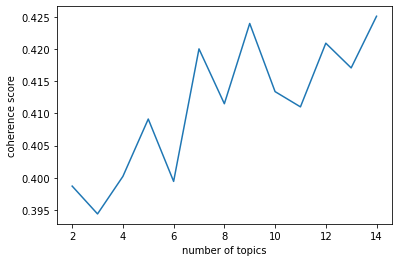

In [73]:
x = range(2,15)
plt.plot(x, coherence_values)
plt.xlabel("number of topics")
plt.ylabel("coherence score")
plt.show()

## 언어 모델 평가 방법

## PPL은 선정된 토픽 개수마다 학습시켜 가장 낮은 값을 보이는 구간을 찾아 최적화된 토픽의 개수 선정 가능

- 의미 : 확률 모델이 겨로가를 얼마나 정확하게 예측하는지 판단. 낮을 수록 정확하게 예측
- 주용도 : 동일 모델 내 파라미터에 따른 성능 평가할 때 주로 사용
- 한계 : ppl이 낮다고 해서 결과가 해석 용이하다는 의미가 아님

In [74]:
import matplotlib.pyplot as plt
perplexity_values = []
for i in range(2,20):
    ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics = i, id2word = dictionary)
    perplexity_values.append(ldamodel.log_perplexity(corpus))
    

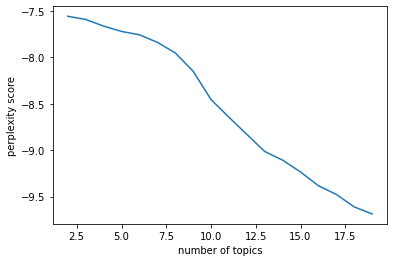

In [76]:
x = range(2,20)
plt.plot(x, perplexity_values)
plt.xlabel("number of topics")
plt.ylabel("perplexity score")
plt.show()

# 하이퍼 파라미터 선정 및 LDA 시각화
- 학습된 코퍼스로 토픽 개수를 선정하고 다양한 파라미터 적용 가능

In [77]:
# 위의 결과들 바탕으로 갯수 수정하기
ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics=9, alpha = 0.1, id2word=dictionary)
ldamodel.print_topics(num_words=20)

[(0,
  '0.019*"사랑" + 0.019*"내가" + 0.016*"우리" + 0.014*"하나" + 0.013*"나의" + 0.012*"시간" + 0.012*"세상" + 0.012*"마음" + 0.010*"모든" + 0.010*"너와" + 0.010*"오늘" + 0.009*"이젠" + 0.009*"지금" + 0.009*"사람" + 0.008*"영원" + 0.008*"그대" + 0.008*"하루" + 0.008*"모두" + 0.007*"행복" + 0.007*"생각"'),
 (1,
  '0.023*"우리" + 0.018*"사랑" + 0.015*"내가" + 0.014*"시간" + 0.012*"너와" + 0.010*"순간" + 0.010*"기억" + 0.010*"소리" + 0.010*"오늘" + 0.009*"나의" + 0.009*"생각" + 0.009*"사람" + 0.009*"지금" + 0.009*"하나" + 0.008*"마음" + 0.008*"하루" + 0.008*"모든" + 0.007*"그대" + 0.007*"바람" + 0.007*"추억"'),
 (2,
  '0.008*"하나" + 0.006*"시간" + 0.005*"내가" + 0.005*"우리" + 0.005*"지금" + 0.005*"나의" + 0.005*"완벽" + 0.004*"마음" + 0.004*"모든" + 0.004*"연결" + 0.004*"모두" + 0.004*"오늘" + 0.004*"무엇" + 0.004*"가슴" + 0.004*"생각" + 0.004*"사랑" + 0.004*"모습" + 0.004*"타임" + 0.004*"이젠" + 0.003*"루가"'),
 (3,
  '0.015*"우리" + 0.015*"오늘" + 0.013*"지금" + 0.012*"내가" + 0.012*"생각" + 0.011*"시간" + 0.011*"마음" + 0.010*"세상" + 0.010*"사랑" + 0.009*"하늘" + 0.009*"나의" + 0.008*"모두" + 0.008*"순간" + 0.008*"하나" + 0.0

## pyLDAvis를 불러온 뒤 학습된 모델 시각화 진행
- 내가 원하는 주제들을 설명할 수 있는 단어들을 끌어내기 위해 파라미터 값을 설정하기도 하므로 해당 단어들의 이해도나 문서에 담긴 도메인 이해도가 중요
- 추가로 해당 토픽에 묶인 단어들이 사용자 사전에 정의되지 않았다면 사용자 사전을 추가하여 단어를 등록하는 과정도 필요

In [78]:
import pyLDAvis
import pyLDAvis.gensim

pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(ldamodel, corpus, dictionary)
vis

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
1      0.088455  0.017468       1        1  25.396869
5      0.079706  0.010831       2        1  25.074460
3      0.063113  0.019282       3        1  15.434247
0      0.050851  0.013405       4        1  12.811032
7     -0.005013 -0.144825       5        1   5.686760
8     -0.014775  0.038015       6        1   5.530427
6     -0.029013  0.016644       7        1   5.302219
2     -0.183163  0.018983       8        1   2.510148
4     -0.050161  0.010196       9        1   2.253838, topic_info=    Term         Freq        Total Category  logprob  loglift
8     우리  2593.000000  2593.000000  Default  30.0000  30.0000
17    나의  1683.000000  1683.000000  Default  29.0000  29.0000
73    하나  1462.000000  1462.000000  Default  28.0000  28.0000
270   세상  1344.000000  1344.000000  Default  27.0000  27.0000
0     내가  2765.000000  2765.000000  Default  26.0000  26.0000
..   ...          ...          ...      ...      ...      ...
23    사람    18.740546  1341.663714   Topic9  -5.3549  -0.4784
144   추억    17.120305   647.354936   Topic9  -5.4453   0.1599
30    오늘    18.060982  1622.056708   Topic9  -5.3919  -0.7052
189   순간    17.398395  1310.766211   Topic9  -5.4292  -0.5295
349   하늘    15.983090   973.964538   Topic9  -5.5141  -0.3173

[709 rows x 6 columns], token_table=      Topic      Freq  Term
term                       
1341      3  0.941440   123
5632      2  0.947295  1234
5912      1  0.977782    1분
5913      1  0.883631    1초
5913      2  0.094003    1초
...     ...       ...   ...
1798      7  0.878316    힘내
2842      1  0.132946    힙합
2842      2  0.132946    힙합
2842      3  0.066473    힙합
2842      7  0.664728    힙합

[1467 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[2, 6, 4, 1, 8, 9, 7, 3, 5])

# 토픽에 할당된 키워드 추출
1. 각 토픽에 할당된 단어와 단어별 토픽 차지 비율 추출
2. 데이터 프레임화
3. 토픽별 추출

In [80]:
kk = ldamodel.show_topic(7,topn=80000)
type(ldamodel.show_topic)
kk2 = pd.DataFrame(kk)
kk2.head(10)

,0,1
0,사랑,0.012754
1,마음,0.012522
2,나의,0.009564
3,지금,0.009138
4,순간,0.007970
5,심장,0.007346
6,내가,0.006643
7,시간,0.006223
8,너와,0.006118
9,그대,0.006083


# 토픽에 할당된 가사 추출
- 각 가사별로 토픽에 할당되는 토픽 번호와 차지하는 비중을 만들기 위한 코드
- 해당 코드를 통해 문서 개별로 가장 크게 할당된 토픽의 번호와 비율 확인 가능
- 여러 토픽에 중첩 할당된 경우 개별 할당된 값도 확인 가능

## 분석 과정에서의 ldea
1. 단어별로 토픽 모델링 결과를 잘 나타냄
2. 문서별로 다시 묶음
3. 각 주제에 해당하는 문서들끼리만 토픽 모델링 결과 내기
4. 하나의 주체에서 또 다르게 얘기하는 주제들을 끄집어 낼 수 있음

In [81]:
def make_topictable_per_lyrics(ldamodel, corpus):
    topic_table = pd.DataFrame()
    
    # 몇 번째 가사인지를 의미하는 가사 번호와 해당 가사의 토픽 비중을 한줄씩 꺼내오기
    for i, topic_list in enumerate(ldamodel[corpus]):
        doc = topic_list[0] if ldamodel.per_word_topics else topic_list
        doc = sorted(doc, key = lambda x : (x[1]), reverse = True)
        # 각 가사들에 대해서 비중이 높은 토픽순으로 토픽 정렬
        
        # 모든 가사에 대해서 각각 아래를 수행
        for j, (topic_num, prop_topic) in enumerate(doc): # 몇 번 토픿인지와 비중을 나눠서 저장한다
            if j == 0: # 정렬을 한 상태이므로 가장 앞에 있는 것이 가장 비중이 높은 토픽
                topic_table = topic_table.append(pd.Series([int(topic_num), round(prop_topic, 4), topic_list]), ignore_index = True)
            else:
                break
        return(topic_table)
    

In [85]:
topictable = make_topictable_per_lyrics(ldamodel, corpus)
topictable = topictable.reset_index()
topictable.columns= ['가사','가장 비중이 높은 토픽','가장 높은 토픽의 비중','각 토픽의 비중']
topictable[:100]

,가사,가장 비중이 높은 토픽,가장 높은 토픽의 비중,각 토픽의 비중
0,0,0.0,0.9424,"[(0, 0.94241726)]"
